In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy
from nltk.stem import WordNetLemmatizer 
import string
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer

In [2]:
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [3]:
os.chdir('C:/Users/talil/Offense_clasification/pickle_files/most updated files')
#C:\Users\talil\Offense_clasification\pickle_files\most updated files

In [4]:
stop_words = set(stopwords.words('english'))

In [5]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\talil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [7]:
ss = SnowballStemmer(language='english')

## Data reception

In [8]:
RM_DATA = pd.read_csv('RoastMe_Data_balanced.csv')

In [9]:
RM_DATA_Filtered = pd.read_csv('RoastMe_new_Data_balanced.csv')

In [10]:
RM_DATA.head()

id  \
0   1   
1   2   
2   3   
3   4   
4   5   

                                                                                               comment  \
0                                            You like NASA because of all the space between your ears.   
1                                                  Imagine being verified and getting that many likes.   
2  actually who the fuck cares? if you just have a hate boner because someone disagrees with your t...   
3                            Holy fuck what did you buy with the tooth fairy money...? A house? A car?   
4                                                                       Compare Canberra to Melbourne.   

   Label  
0      1  
1      0  
2      0  
3      1  
4      0

In [11]:
Kaggle_Dataset = pd.read_csv('Kaggle_Data_balanced.csv')

In [12]:
Founta_Dataset= pd.read_csv('Founta_Data_balanced.csv')

In [13]:
Razavi_Dataset = pd.read_csv('Razavi_Data_balanced.csv')

In [14]:
Waseem_Dataset = pd.read_csv('Waseem_Data_balanced.csv')

In [15]:
Kumar_Dataset = pd.read_csv('Kumar_Data_balanced.csv')

In [16]:
Offensive_Reddit_Dataset = pd.read_csv('Offensive_Reddit_new.csv')

# Analyze datasets

In [17]:
RM_DATA_Filtered_analyze = RM_DATA_Filtered[['comment','Label']]

In [18]:
RM_DATA_analyze = RM_DATA[['comment','Label']]

In [19]:
Kaggle_DATA_analyze = Kaggle_Dataset[['comment','Label']]

In [20]:
Founta_Dataset_analyze = Founta_Dataset[['comment','Label']]

In [21]:
Razavi_Dataset_analyze = Razavi_Dataset[['comment','Label']]

In [22]:
Waseem_Dataset_analyze = Waseem_Dataset[['comment','Label']]

In [23]:
Kumar_Dataset_analyze = Kumar_Dataset[['comment','Label']]

In [24]:
Offensive_Reddit_Dataset_analyze = Offensive_Reddit_Dataset[['comment','Label']]

In [25]:
lemmatizer = WordNetLemmatizer()

In [26]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\talil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
print(lemmatizer.lemmatize('feet'))

foot


In [28]:
 def add_lematize_and_sentiment_to_df(df):   
    lemmatized_comments = []
    for comment in df['comment']:
        word_list = nltk.word_tokenize(comment)
        lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
        lemmatized_comments.append(lemmatized_output)
    df['lemmatized_comment'] = lemmatized_comments
    df['sentiment'] = df['lemmatized_comment'].apply(lambda x: TextBlob(x).sentiment.polarity)
    df = df[['comment','lemmatized_comment','sentiment','Label']]
    return df

In [29]:
RM_DATA_analyze = add_lematize_and_sentiment_to_df(RM_DATA_analyze)

In [30]:
RM_DATA_Filtered_analyze = add_lematize_and_sentiment_to_df(RM_DATA_Filtered_analyze)

In [31]:
Kaggle_DATA_analyze = add_lematize_and_sentiment_to_df(Kaggle_DATA_analyze)

In [32]:
Founta_Dataset_analyze = add_lematize_and_sentiment_to_df(Founta_Dataset_analyze)

In [33]:
Razavi_Dataset_analyze = add_lematize_and_sentiment_to_df(Razavi_Dataset_analyze)

In [34]:
Waseem_Dataset_analyze = add_lematize_and_sentiment_to_df(Waseem_Dataset_analyze)

In [35]:
Kumar_Dataset_analyze = add_lematize_and_sentiment_to_df(Kumar_Dataset_analyze)

In [36]:
Offensive_Reddit_Dataset_analyze = add_lematize_and_sentiment_to_df(Offensive_Reddit_Dataset_analyze)

In [37]:
def get_sentences_lenght_histogram(comments):
    df = pd.DataFrame()
    comment_lengthes = []
    for comment in comments:
        comment_lengthes.append(len(comment.lower().split()))
#     df['comment_length'] = comment_lengthes
#     df.hist(bins=30)
    return comment_lengthes

In [38]:
RM_DATA_analyze['lengthes'] = get_sentences_lenght_histogram(RM_DATA_analyze['comment'])

In [39]:
RM_DATA_Filtered_analyze['lengthes'] = get_sentences_lenght_histogram(RM_DATA_Filtered_analyze['comment'])


In [40]:
Kaggle_DATA_analyze['lengthes'] = get_sentences_lenght_histogram(Kaggle_DATA_analyze['comment'])

In [41]:
Founta_Dataset_analyze['lengthes'] = get_sentences_lenght_histogram(Founta_Dataset_analyze['comment'])

In [42]:
Razavi_Dataset_analyze['lengthes'] = get_sentences_lenght_histogram(Razavi_Dataset_analyze['comment'])

In [43]:
Waseem_Dataset_analyze['lengthes'] = get_sentences_lenght_histogram(Waseem_Dataset_analyze['comment'])

In [44]:
Kumar_Dataset_analyze['lengthes'] = get_sentences_lenght_histogram(Kumar_Dataset_analyze['comment'])

In [45]:
Offensive_Reddit_Dataset_analyze['lengthes'] = get_sentences_lenght_histogram(Offensive_Reddit_Dataset_analyze['comment'])

# Statistics and Plots

In [46]:
 def plot_sentiment_histogram(df):   
    plt.figure(figsize=(50,30))
    plt.margins(0.02)
    plt.xlabel('Sentiment', fontsize=50)
    plt.xticks(fontsize=40)
    plt.ylabel('Frequency', fontsize=50)
    plt.yticks(fontsize=40)
    plt.hist(df['sentiment'], bins=50)
    plt.title('Sentiment Distribution', fontsize=60)
    plt.show()

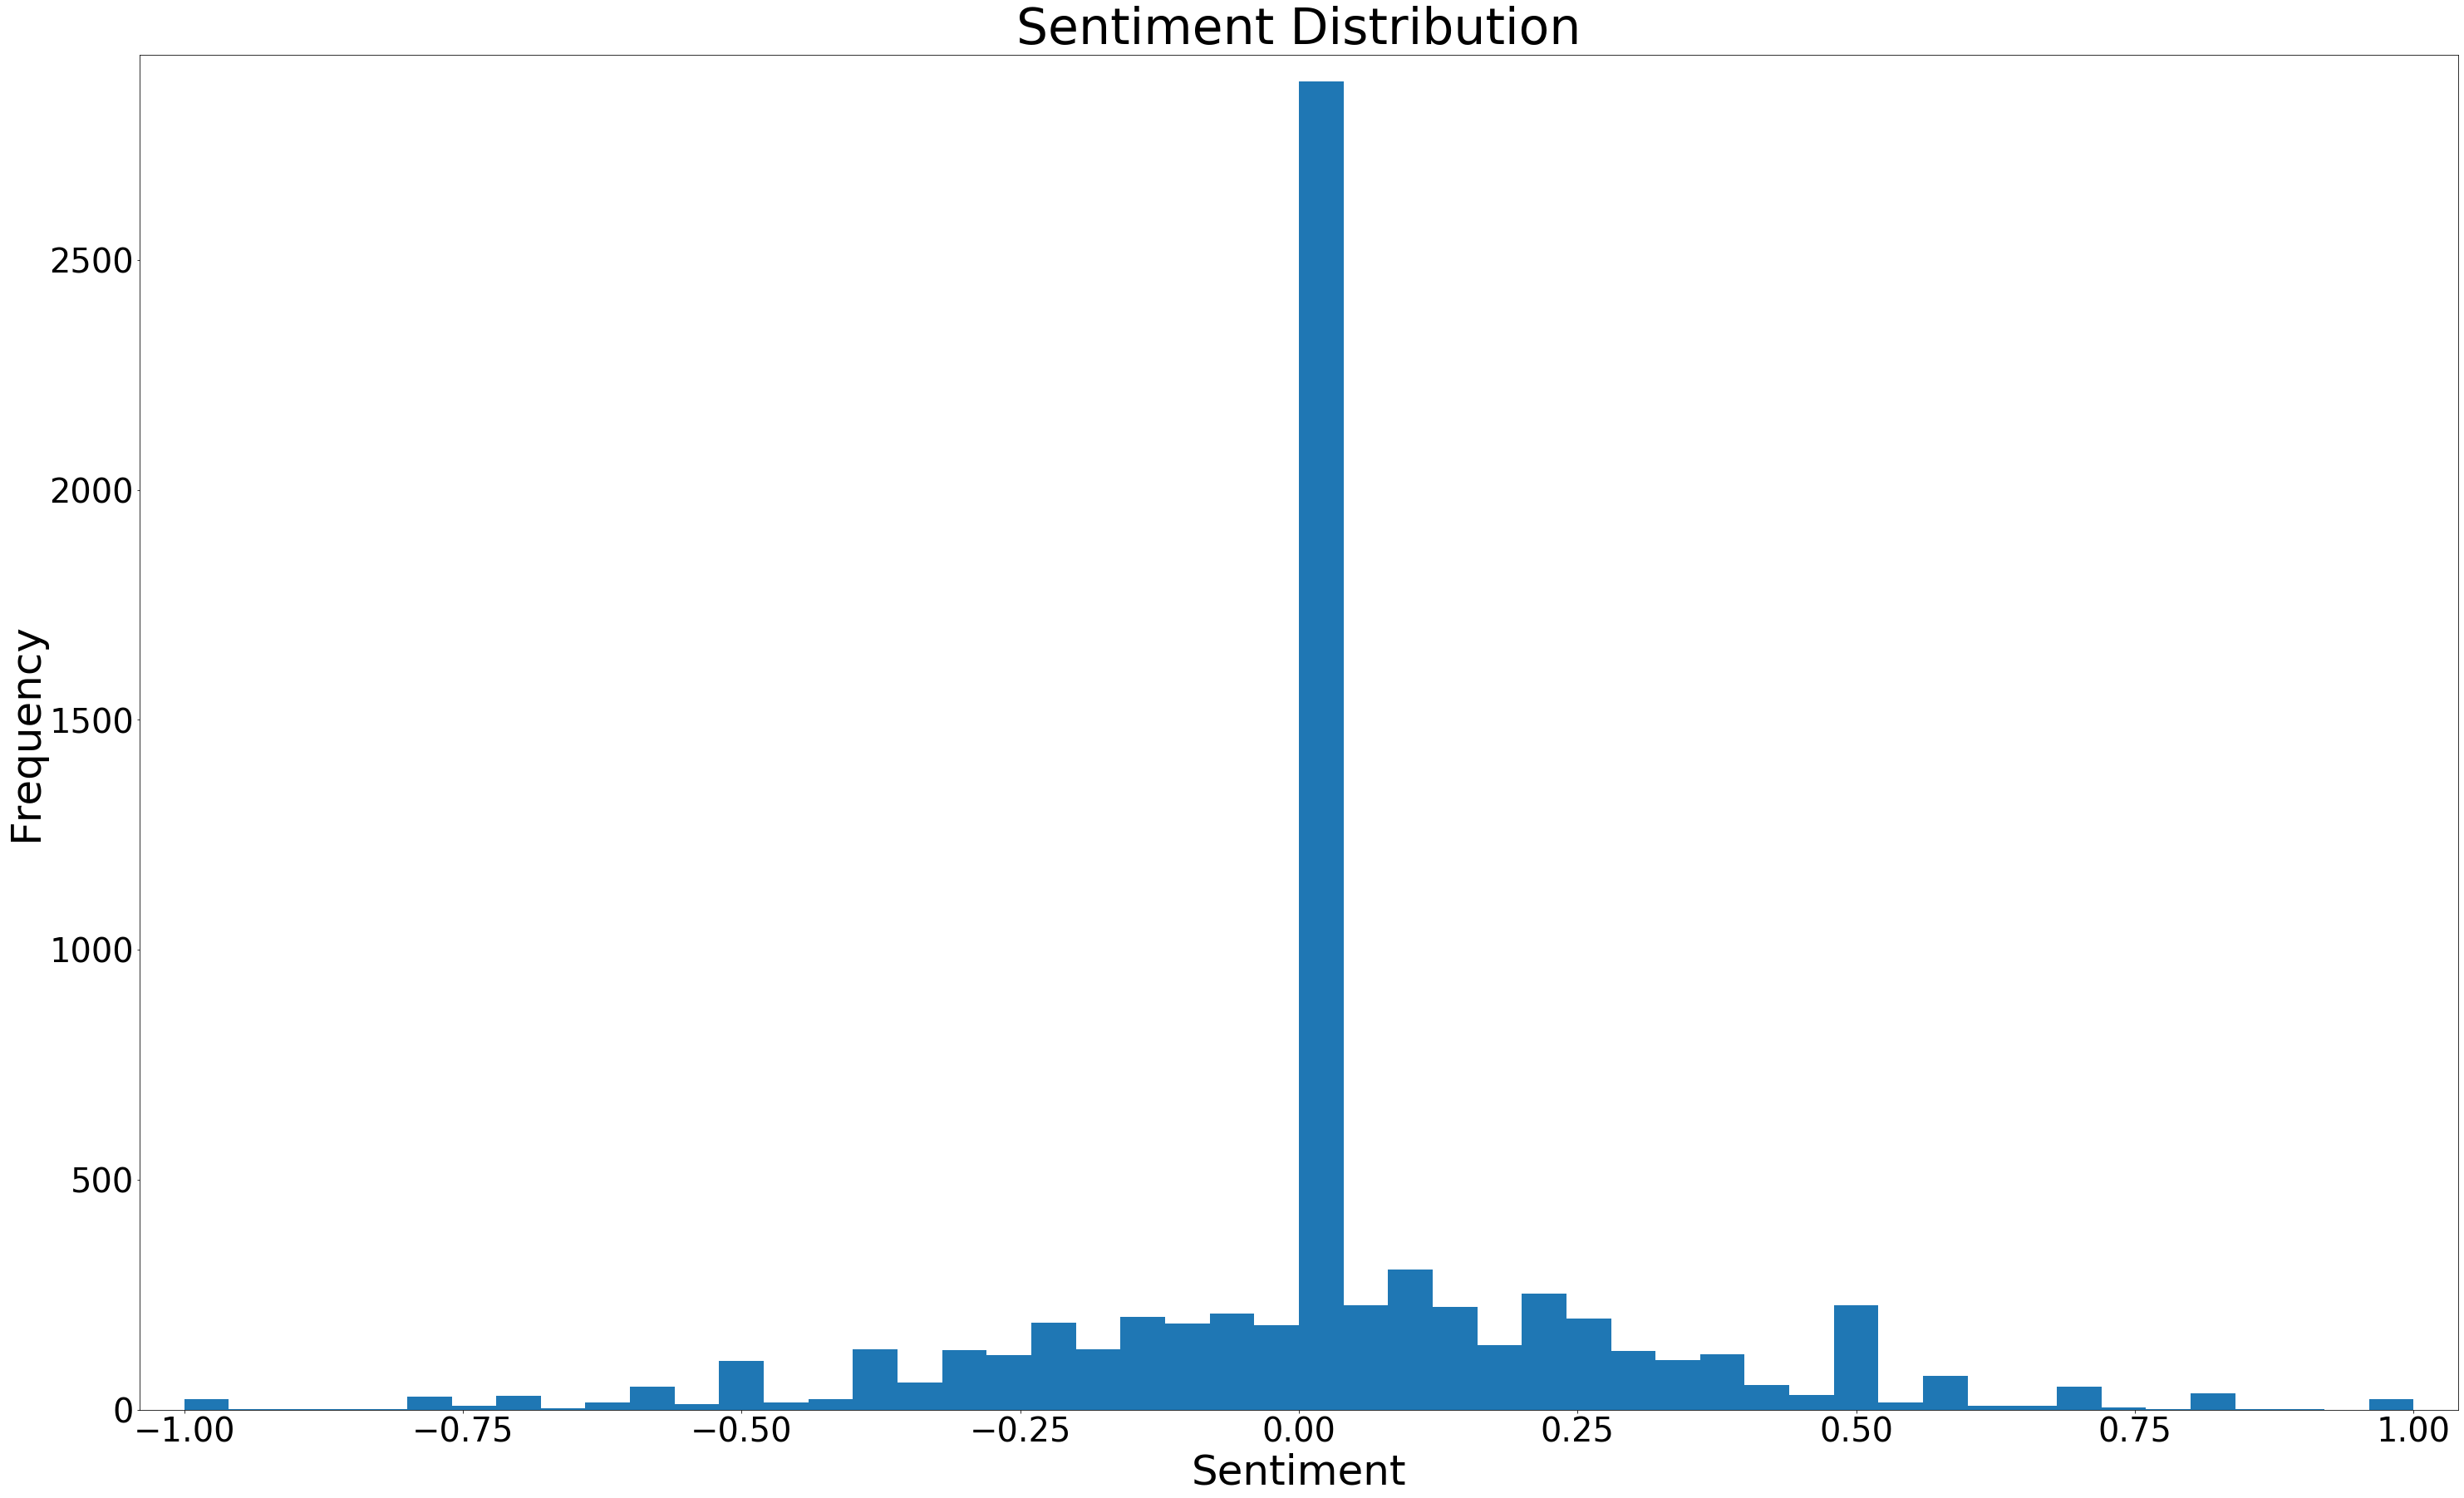

In [47]:
plot_sentiment_histogram(RM_DATA_analyze)

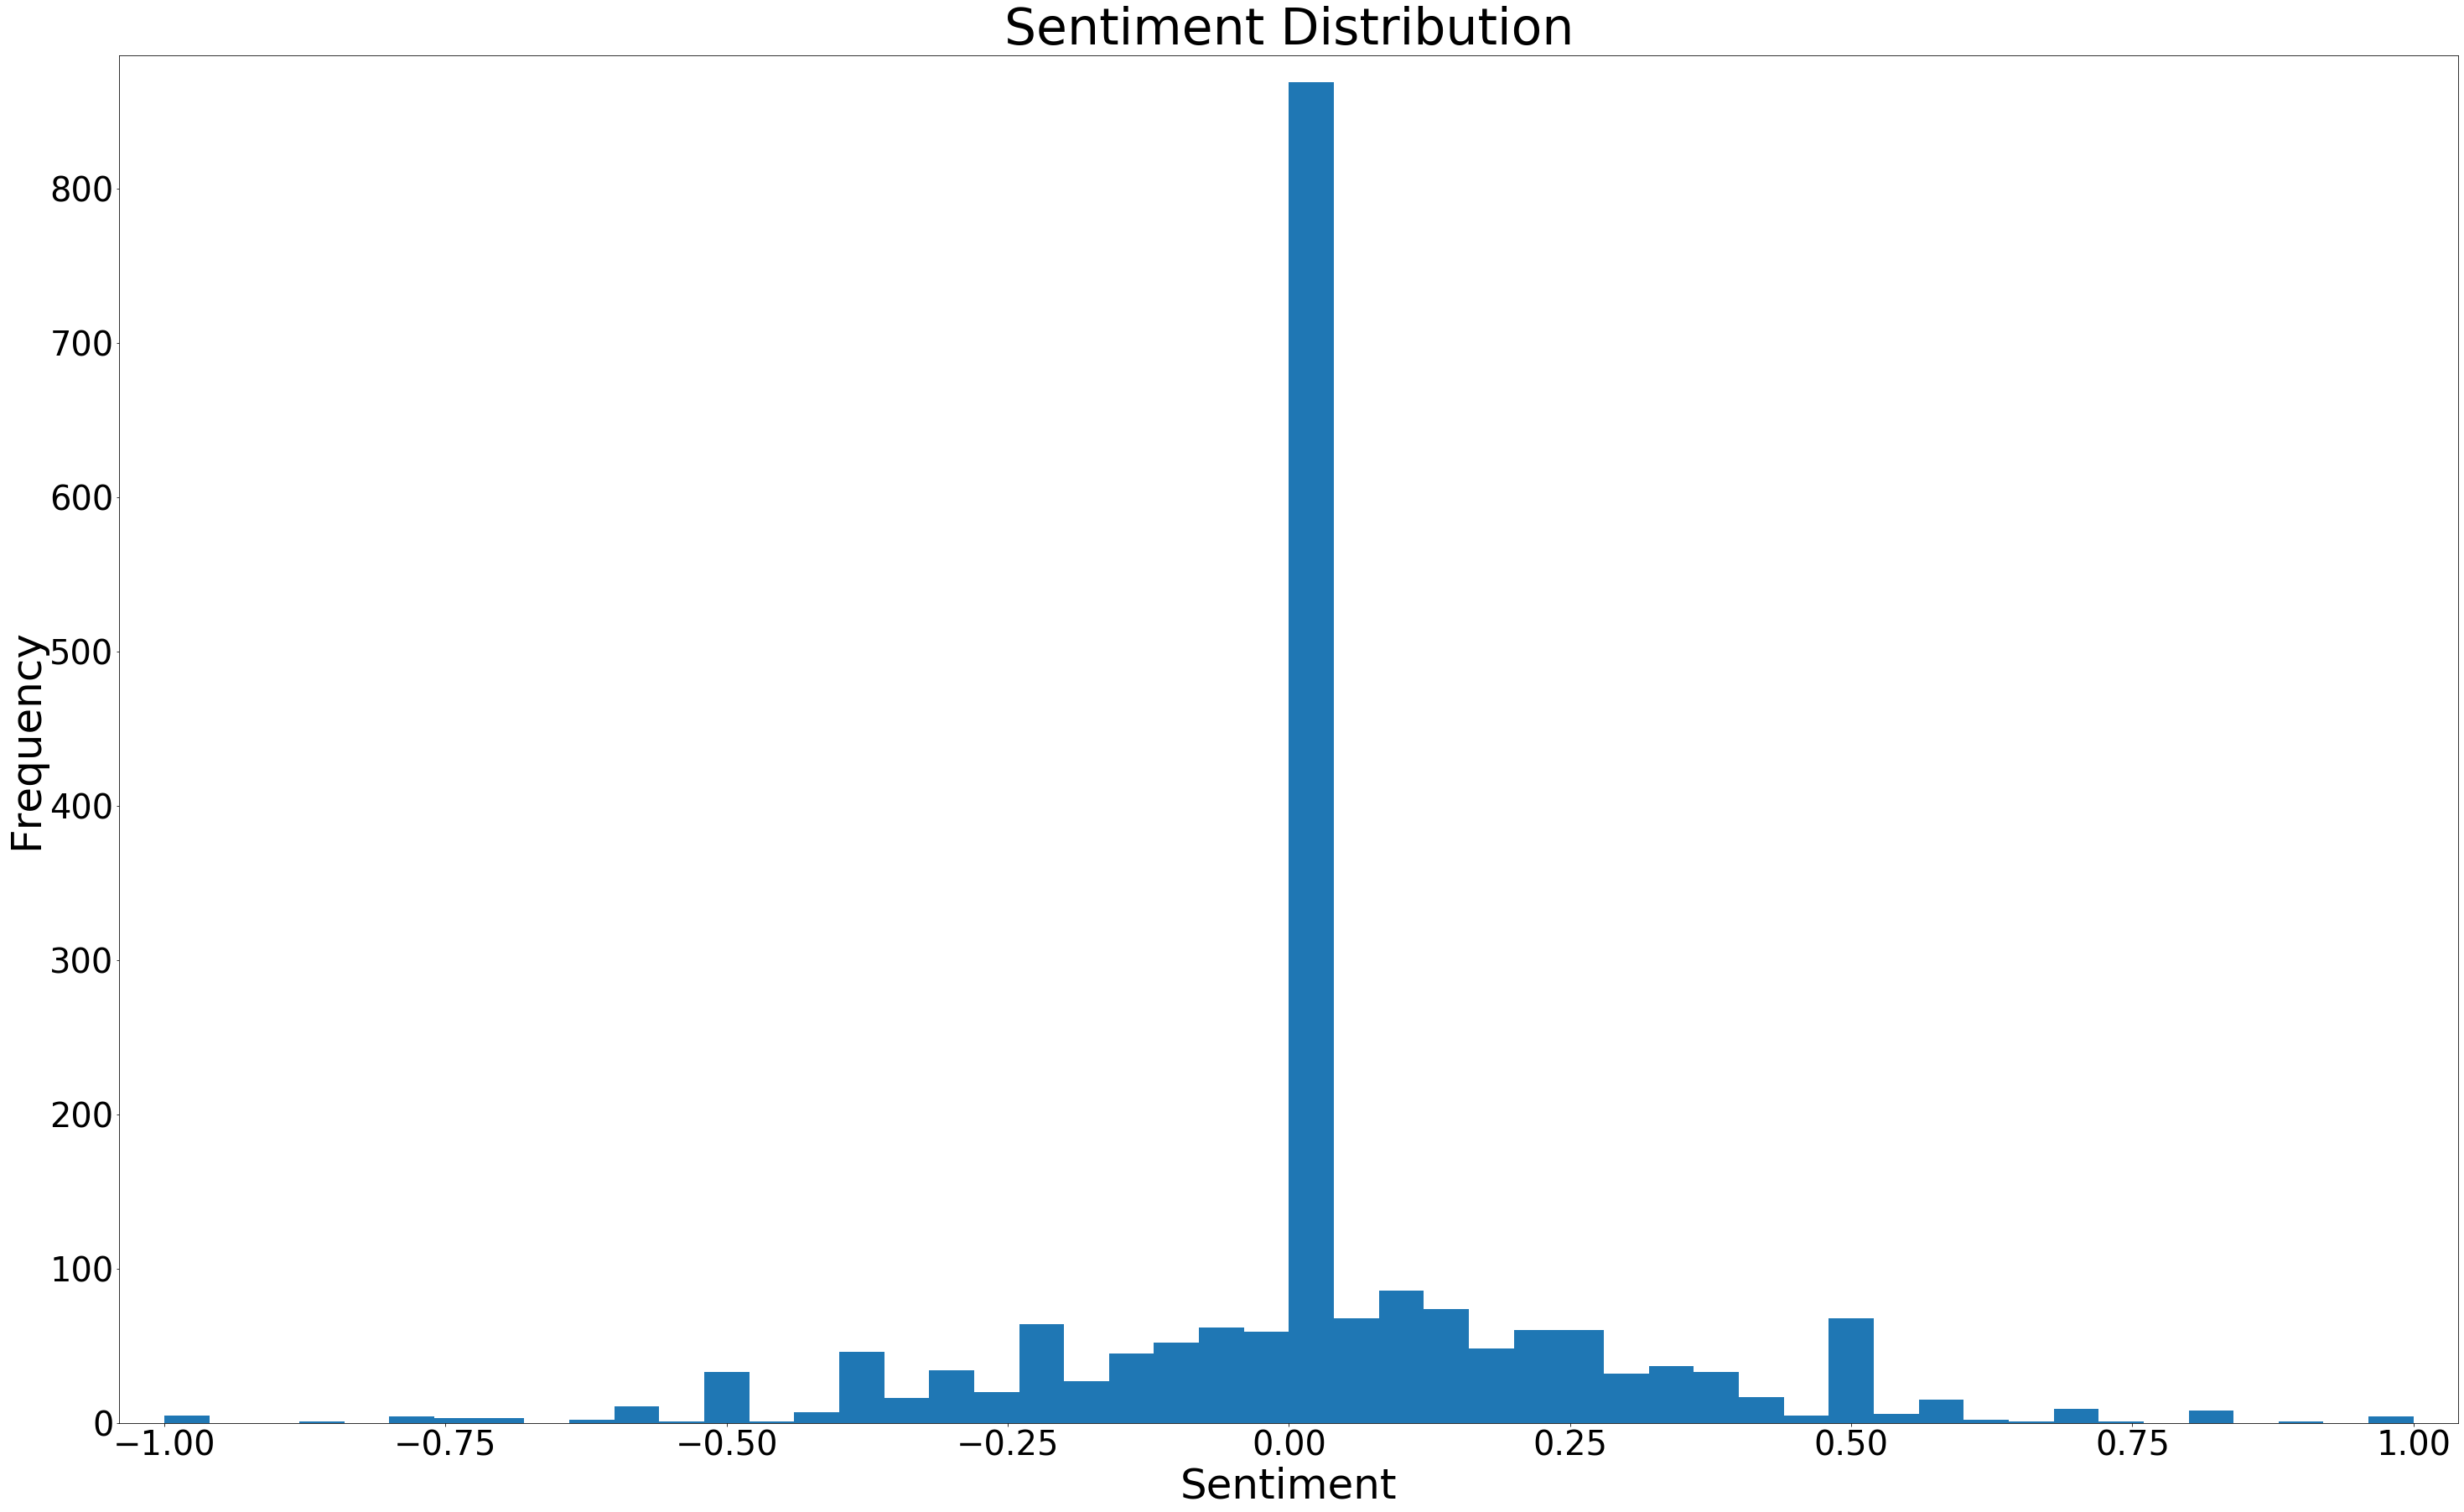

In [48]:
plot_sentiment_histogram(RM_DATA_Filtered_analyze)

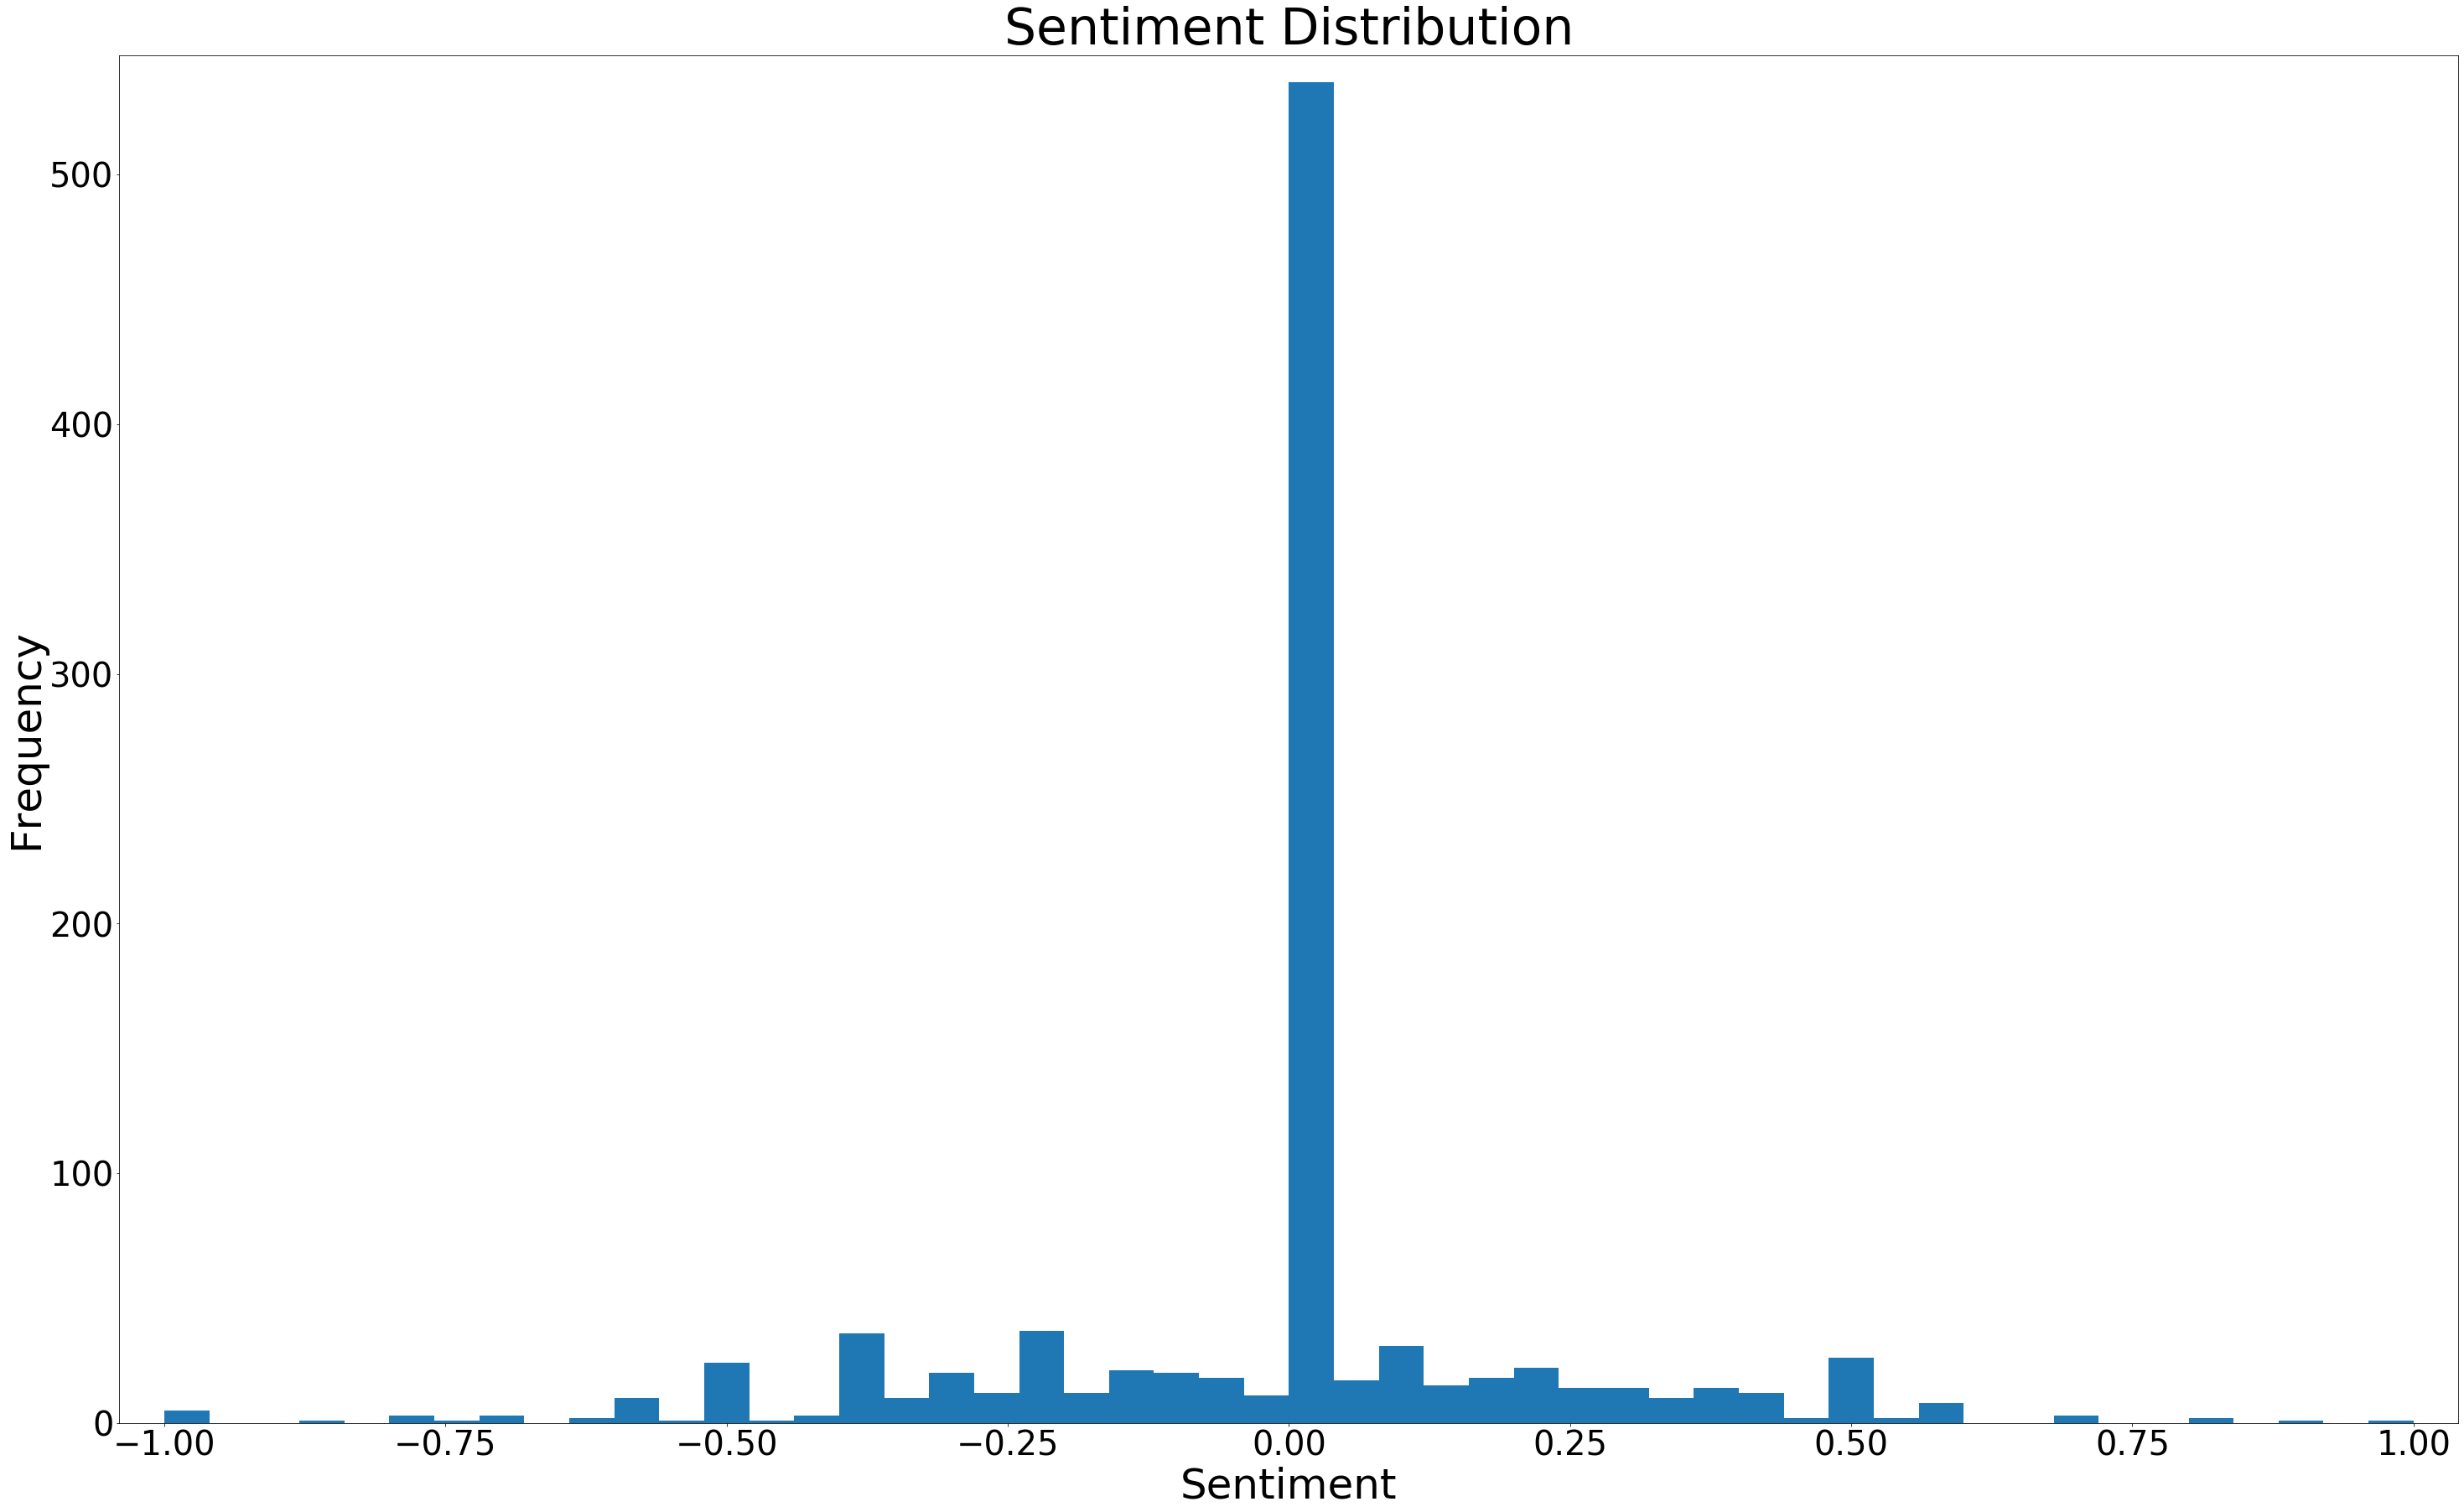

In [49]:
plot_sentiment_histogram(RM_DATA_Filtered_analyze[RM_DATA_Filtered_analyze['Label'] == 1])

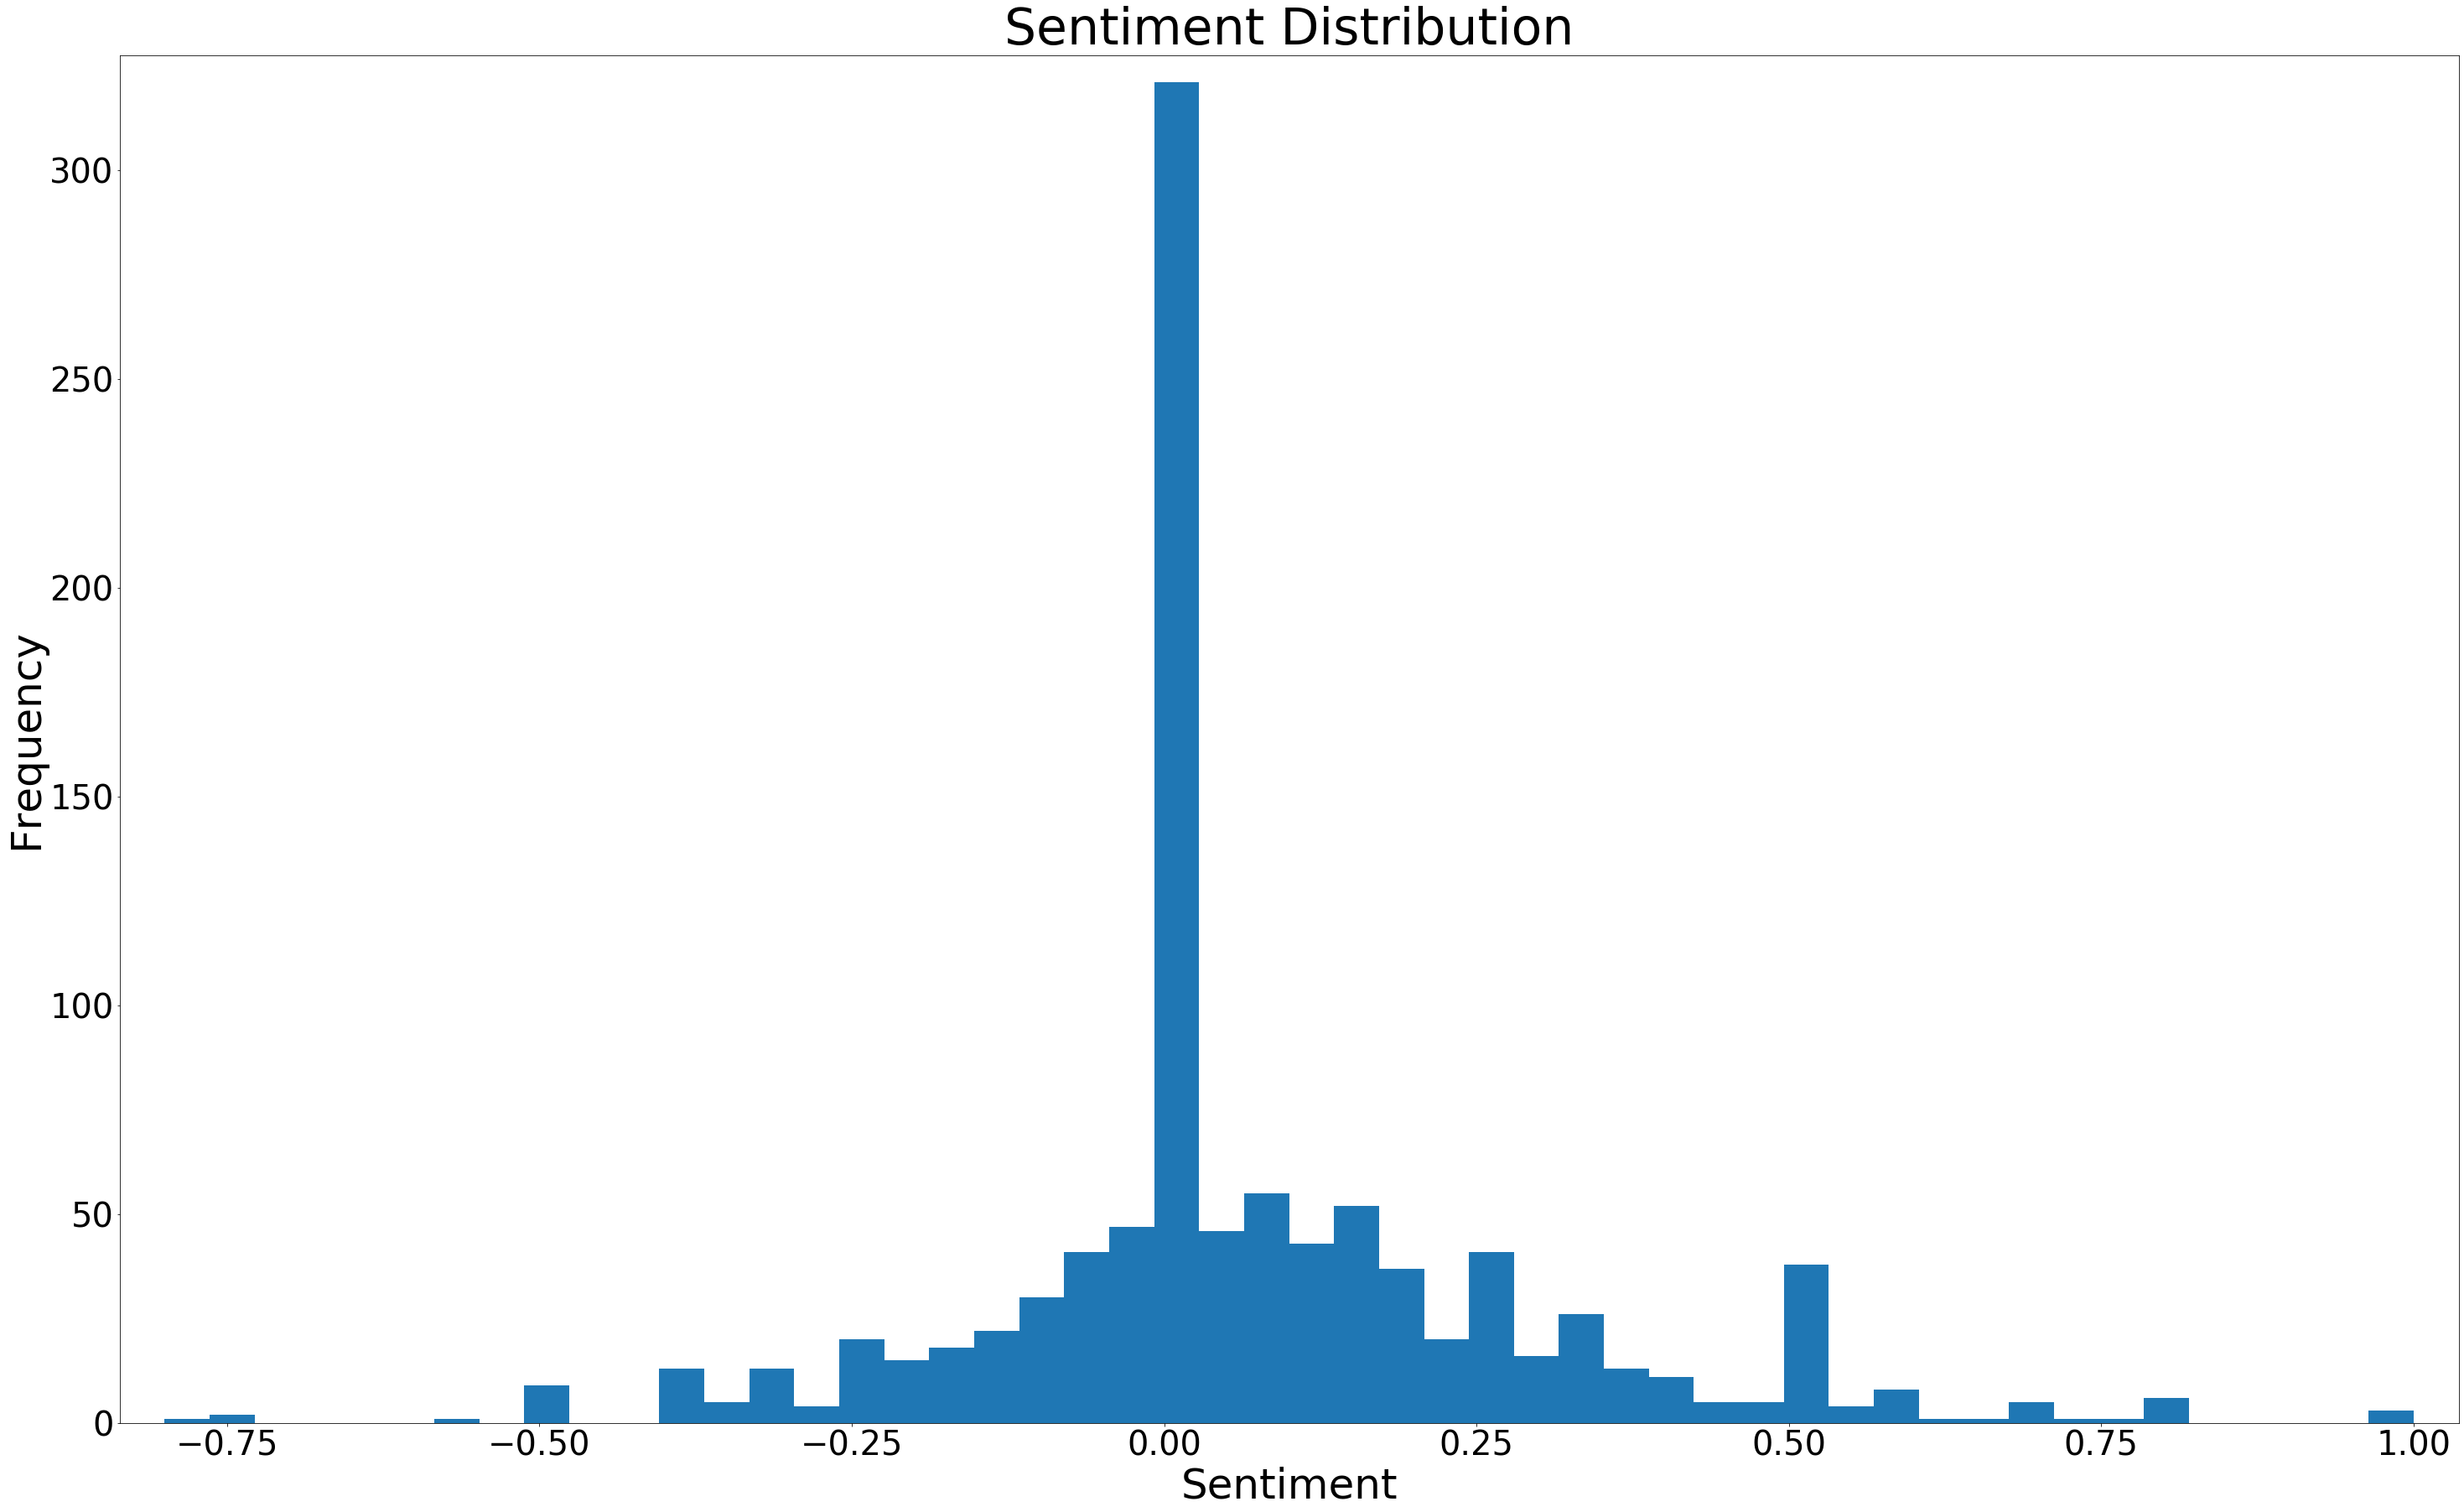

In [50]:
plot_sentiment_histogram(RM_DATA_Filtered_analyze[RM_DATA_Filtered_analyze['Label'] == 0])

In [51]:
RM_DATA_Filtered_analyze['sentiment'].quantile([0.25,0.5,0.75,0.95,1])

0.25    0.000000
0.50    0.000000
0.75    0.103021
0.95    0.500000
1.00    1.000000
Name: sentiment, dtype: float64

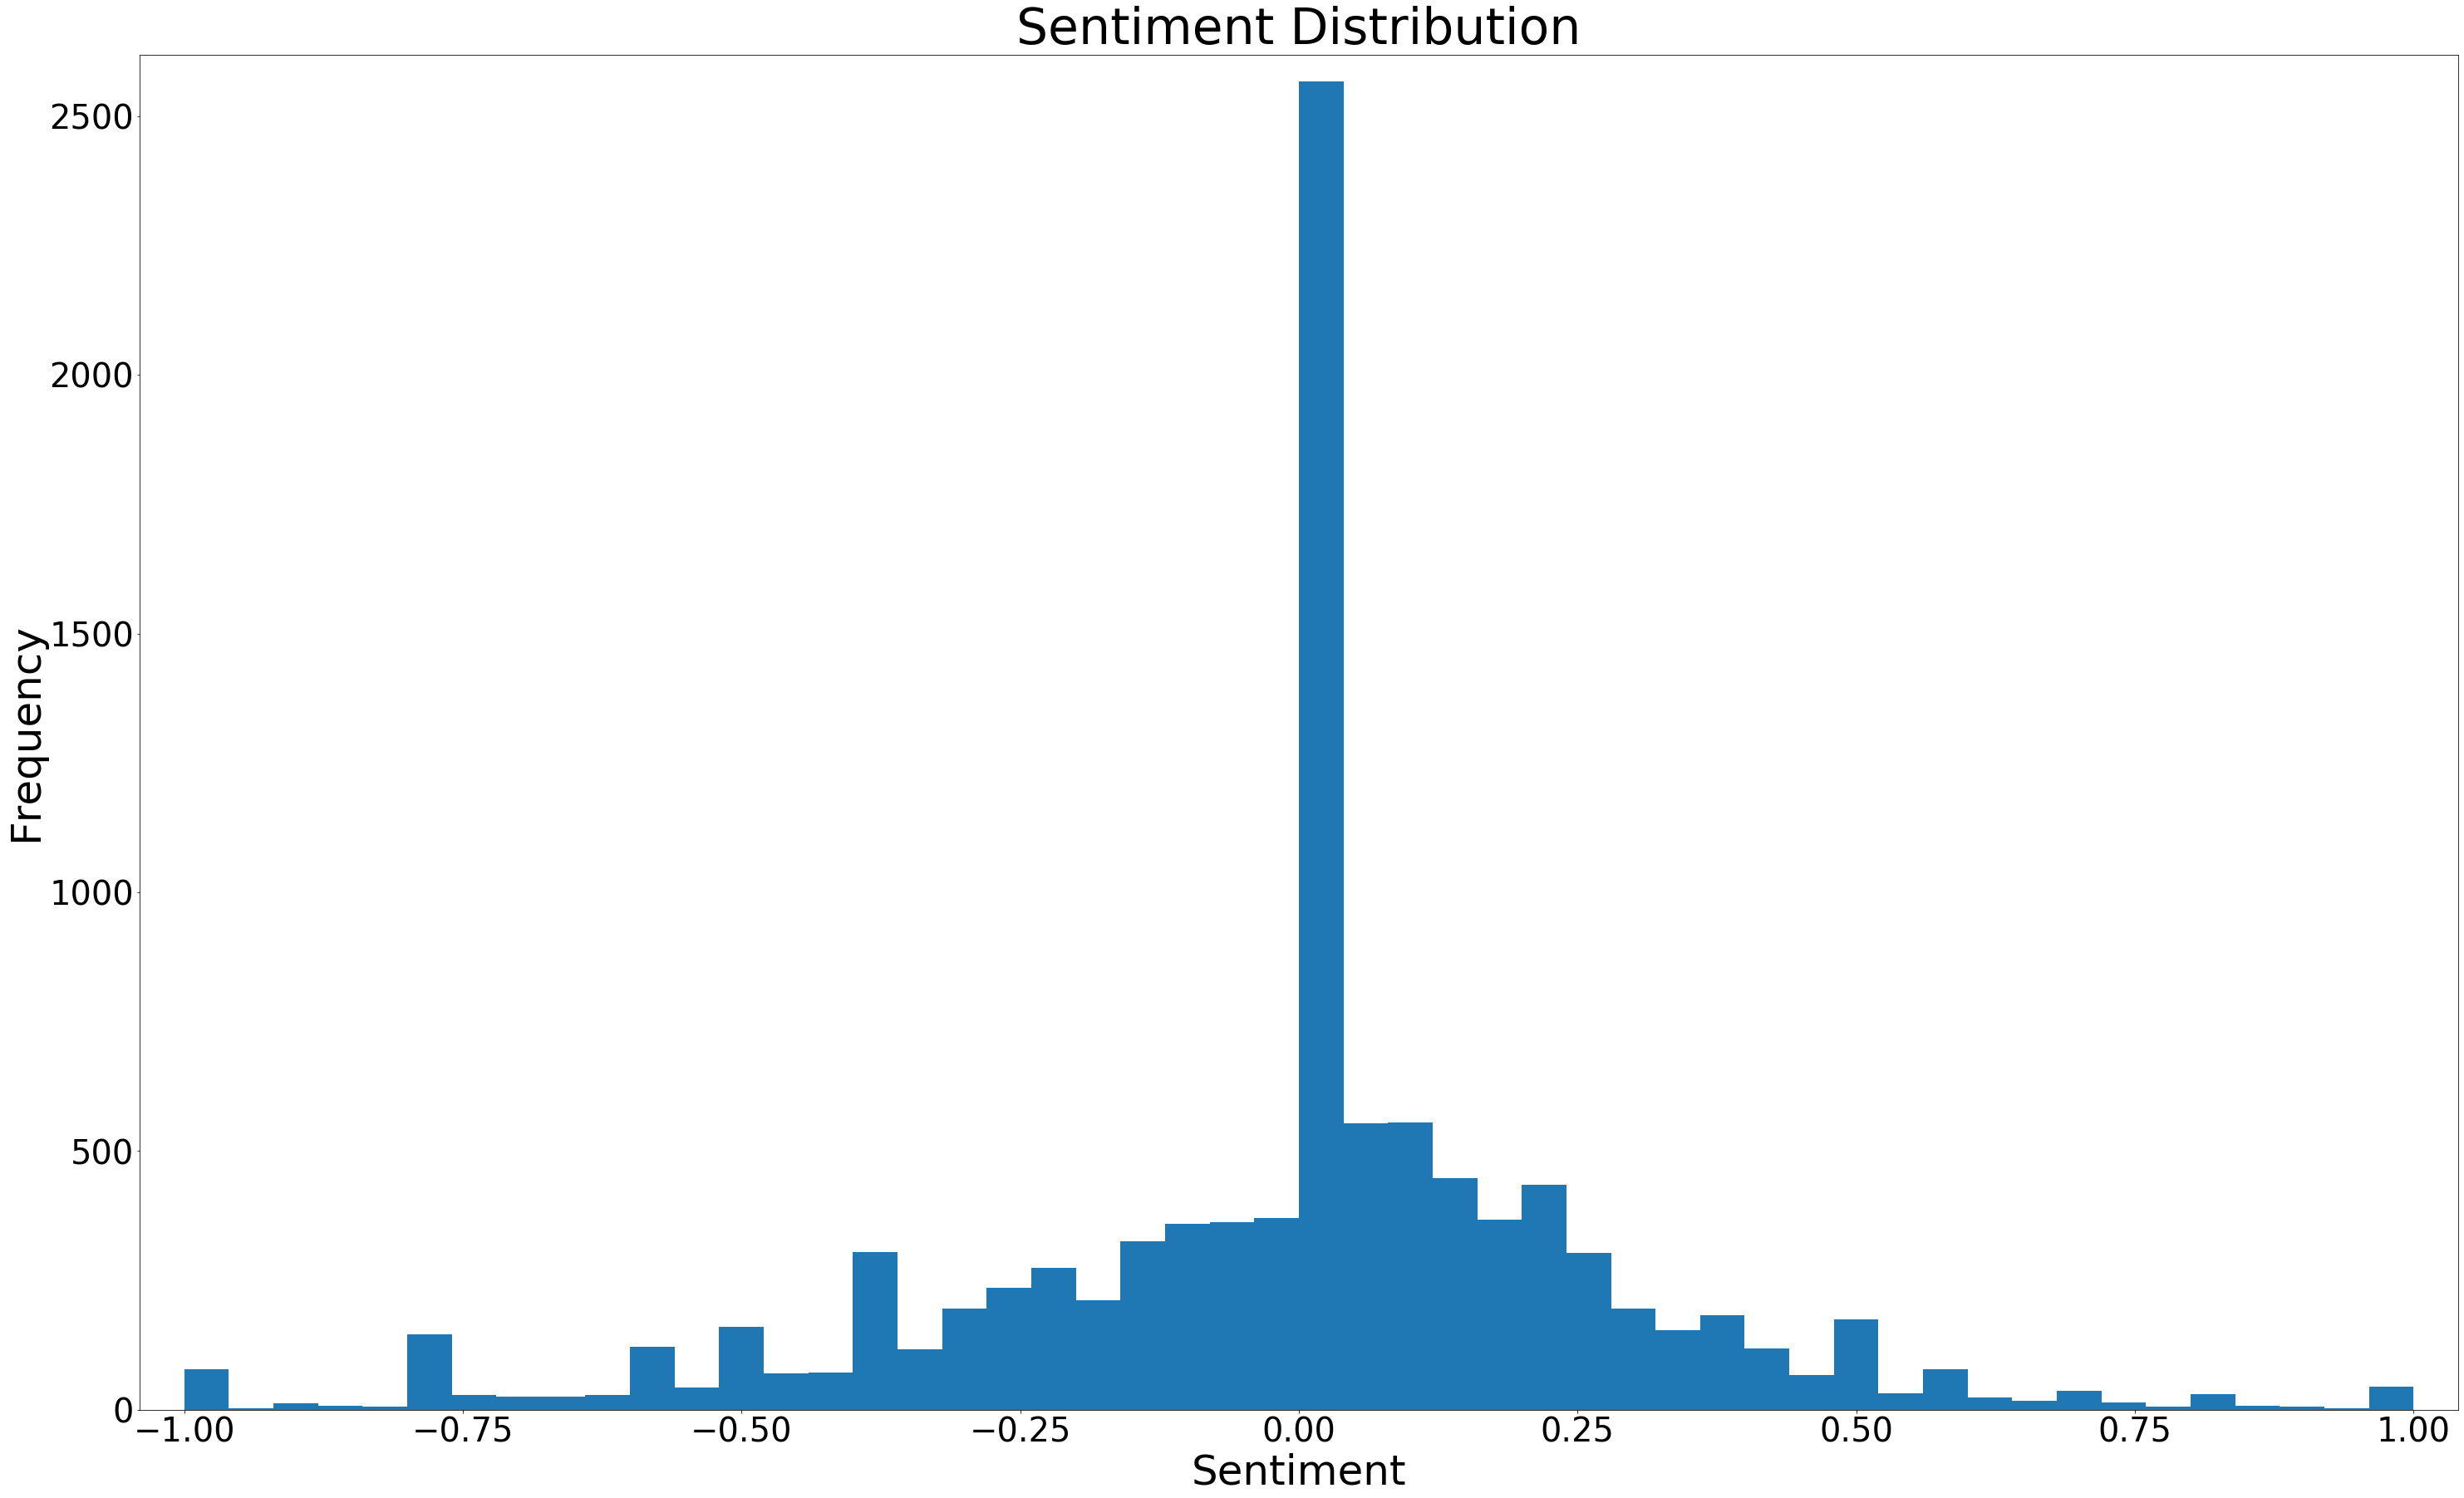

In [52]:
plot_sentiment_histogram(Kaggle_DATA_analyze)

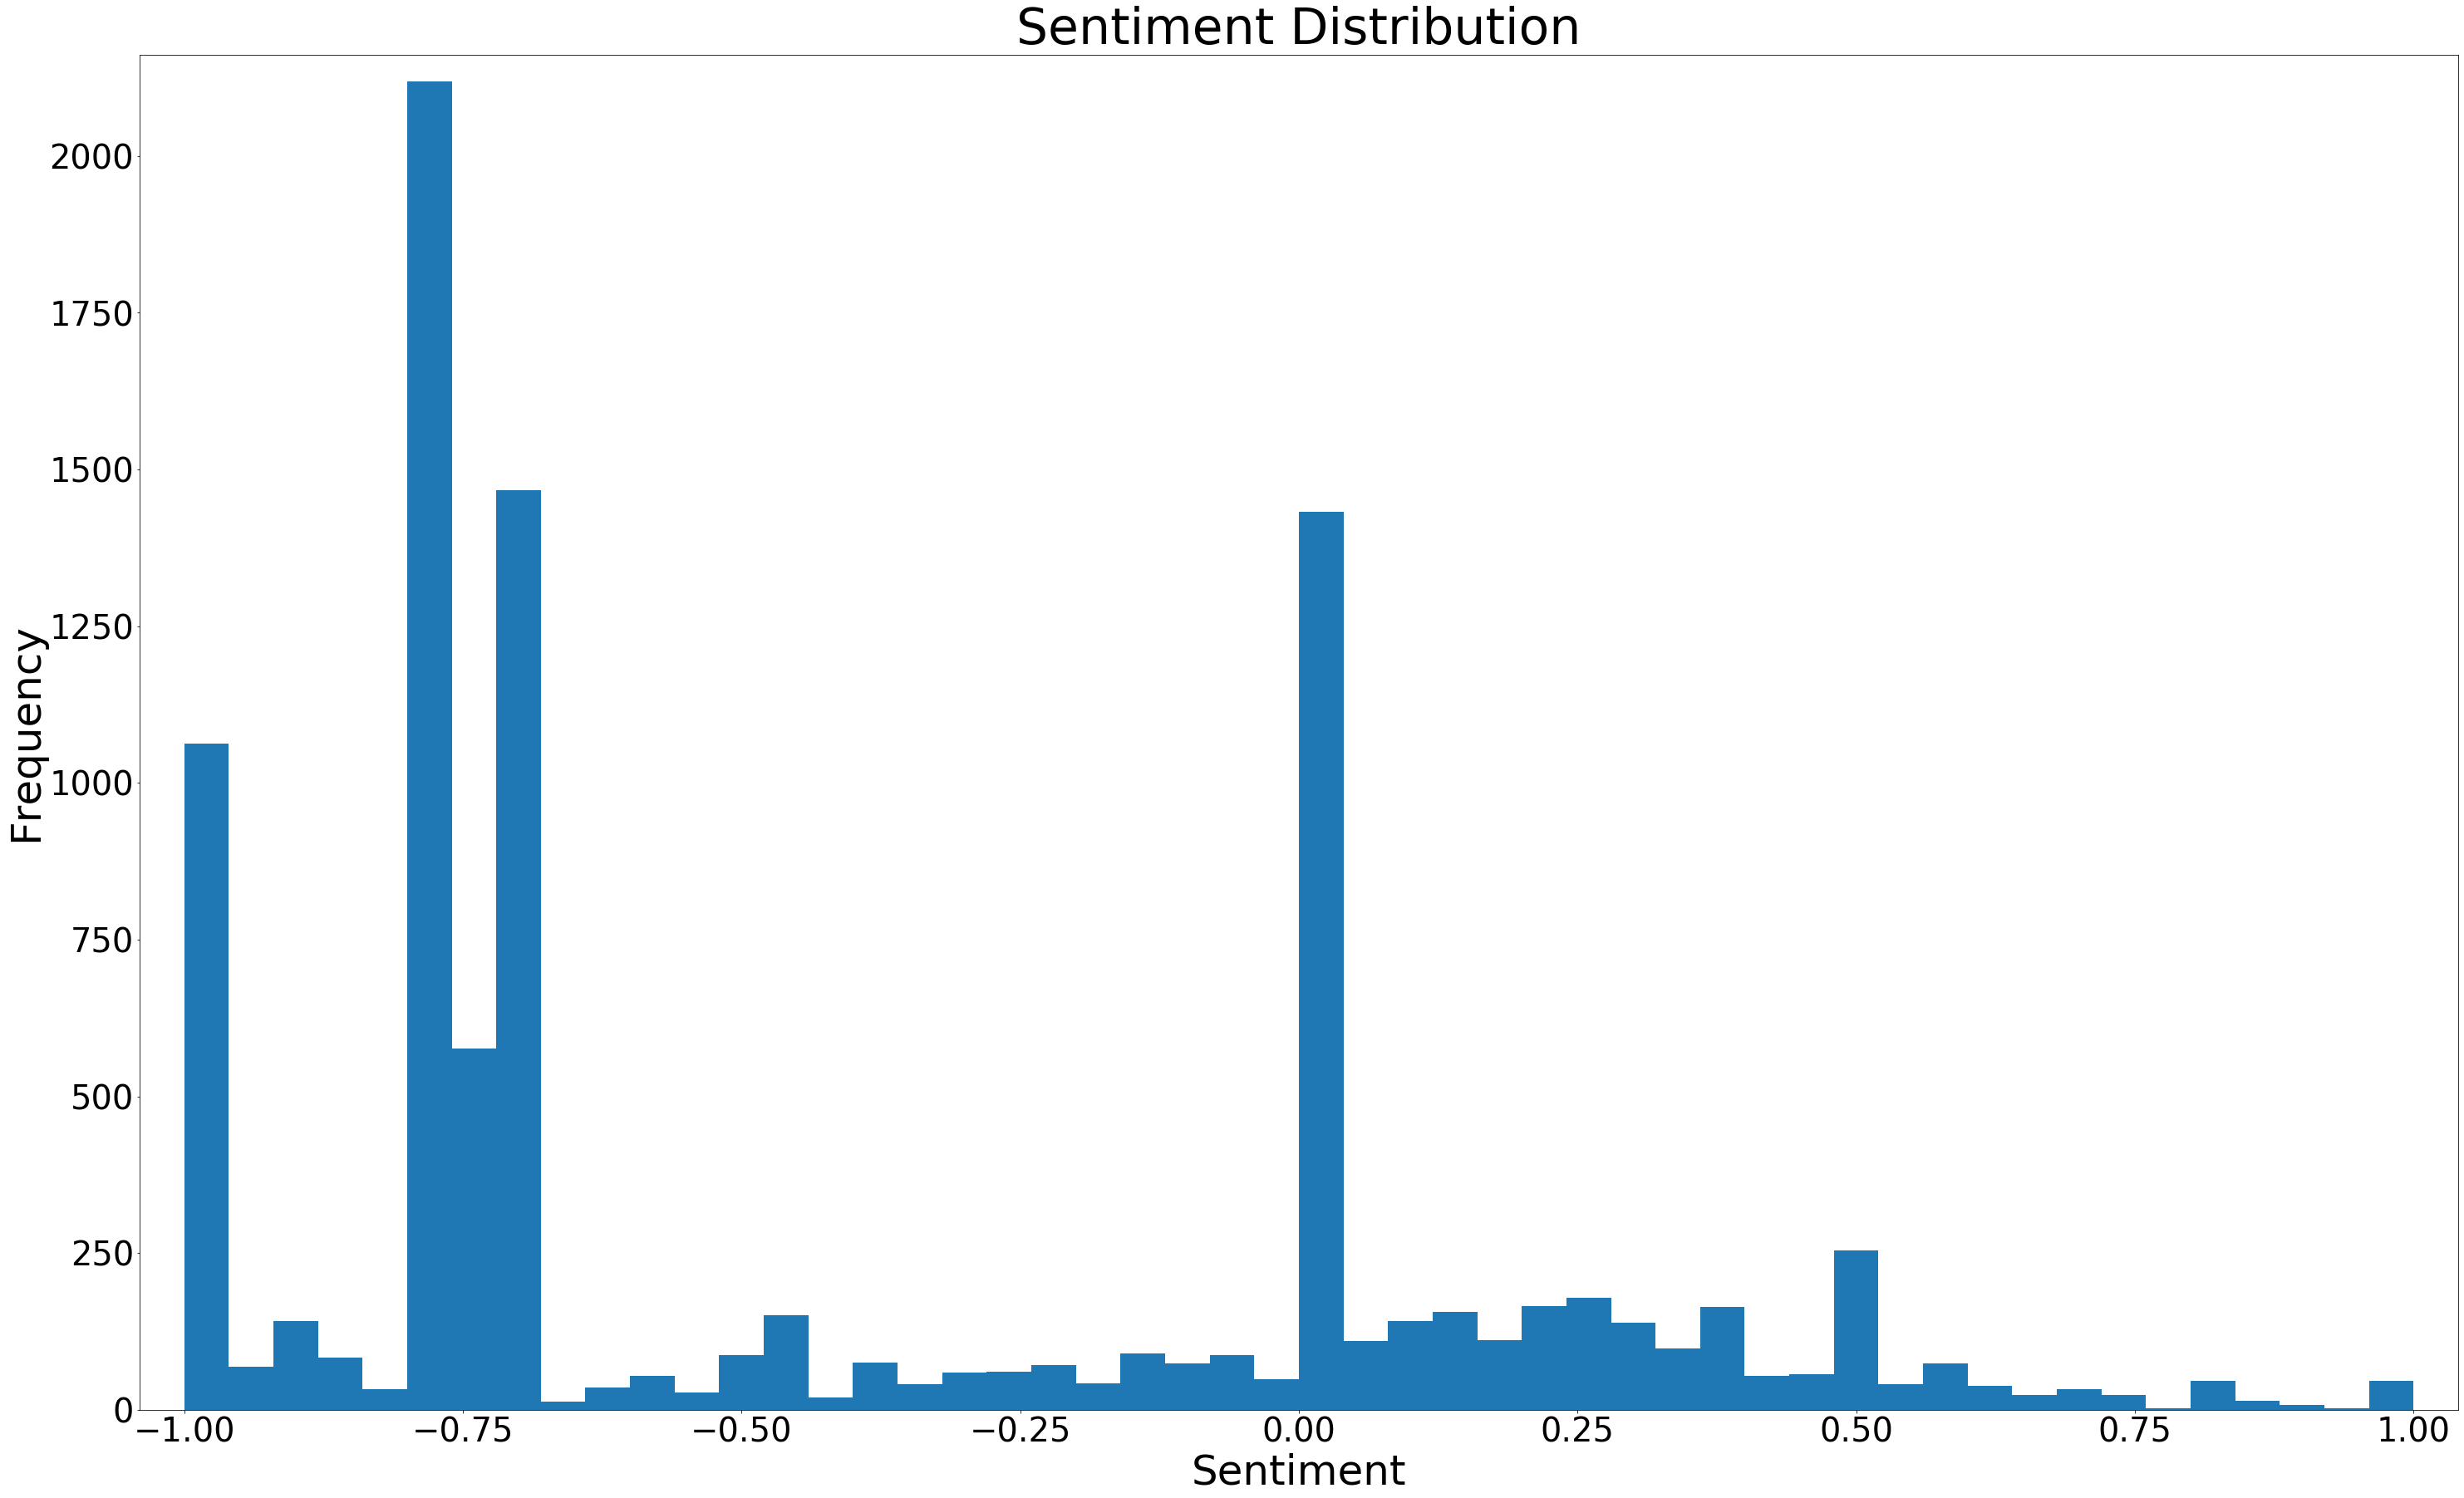

In [53]:
plot_sentiment_histogram(Founta_Dataset_analyze)

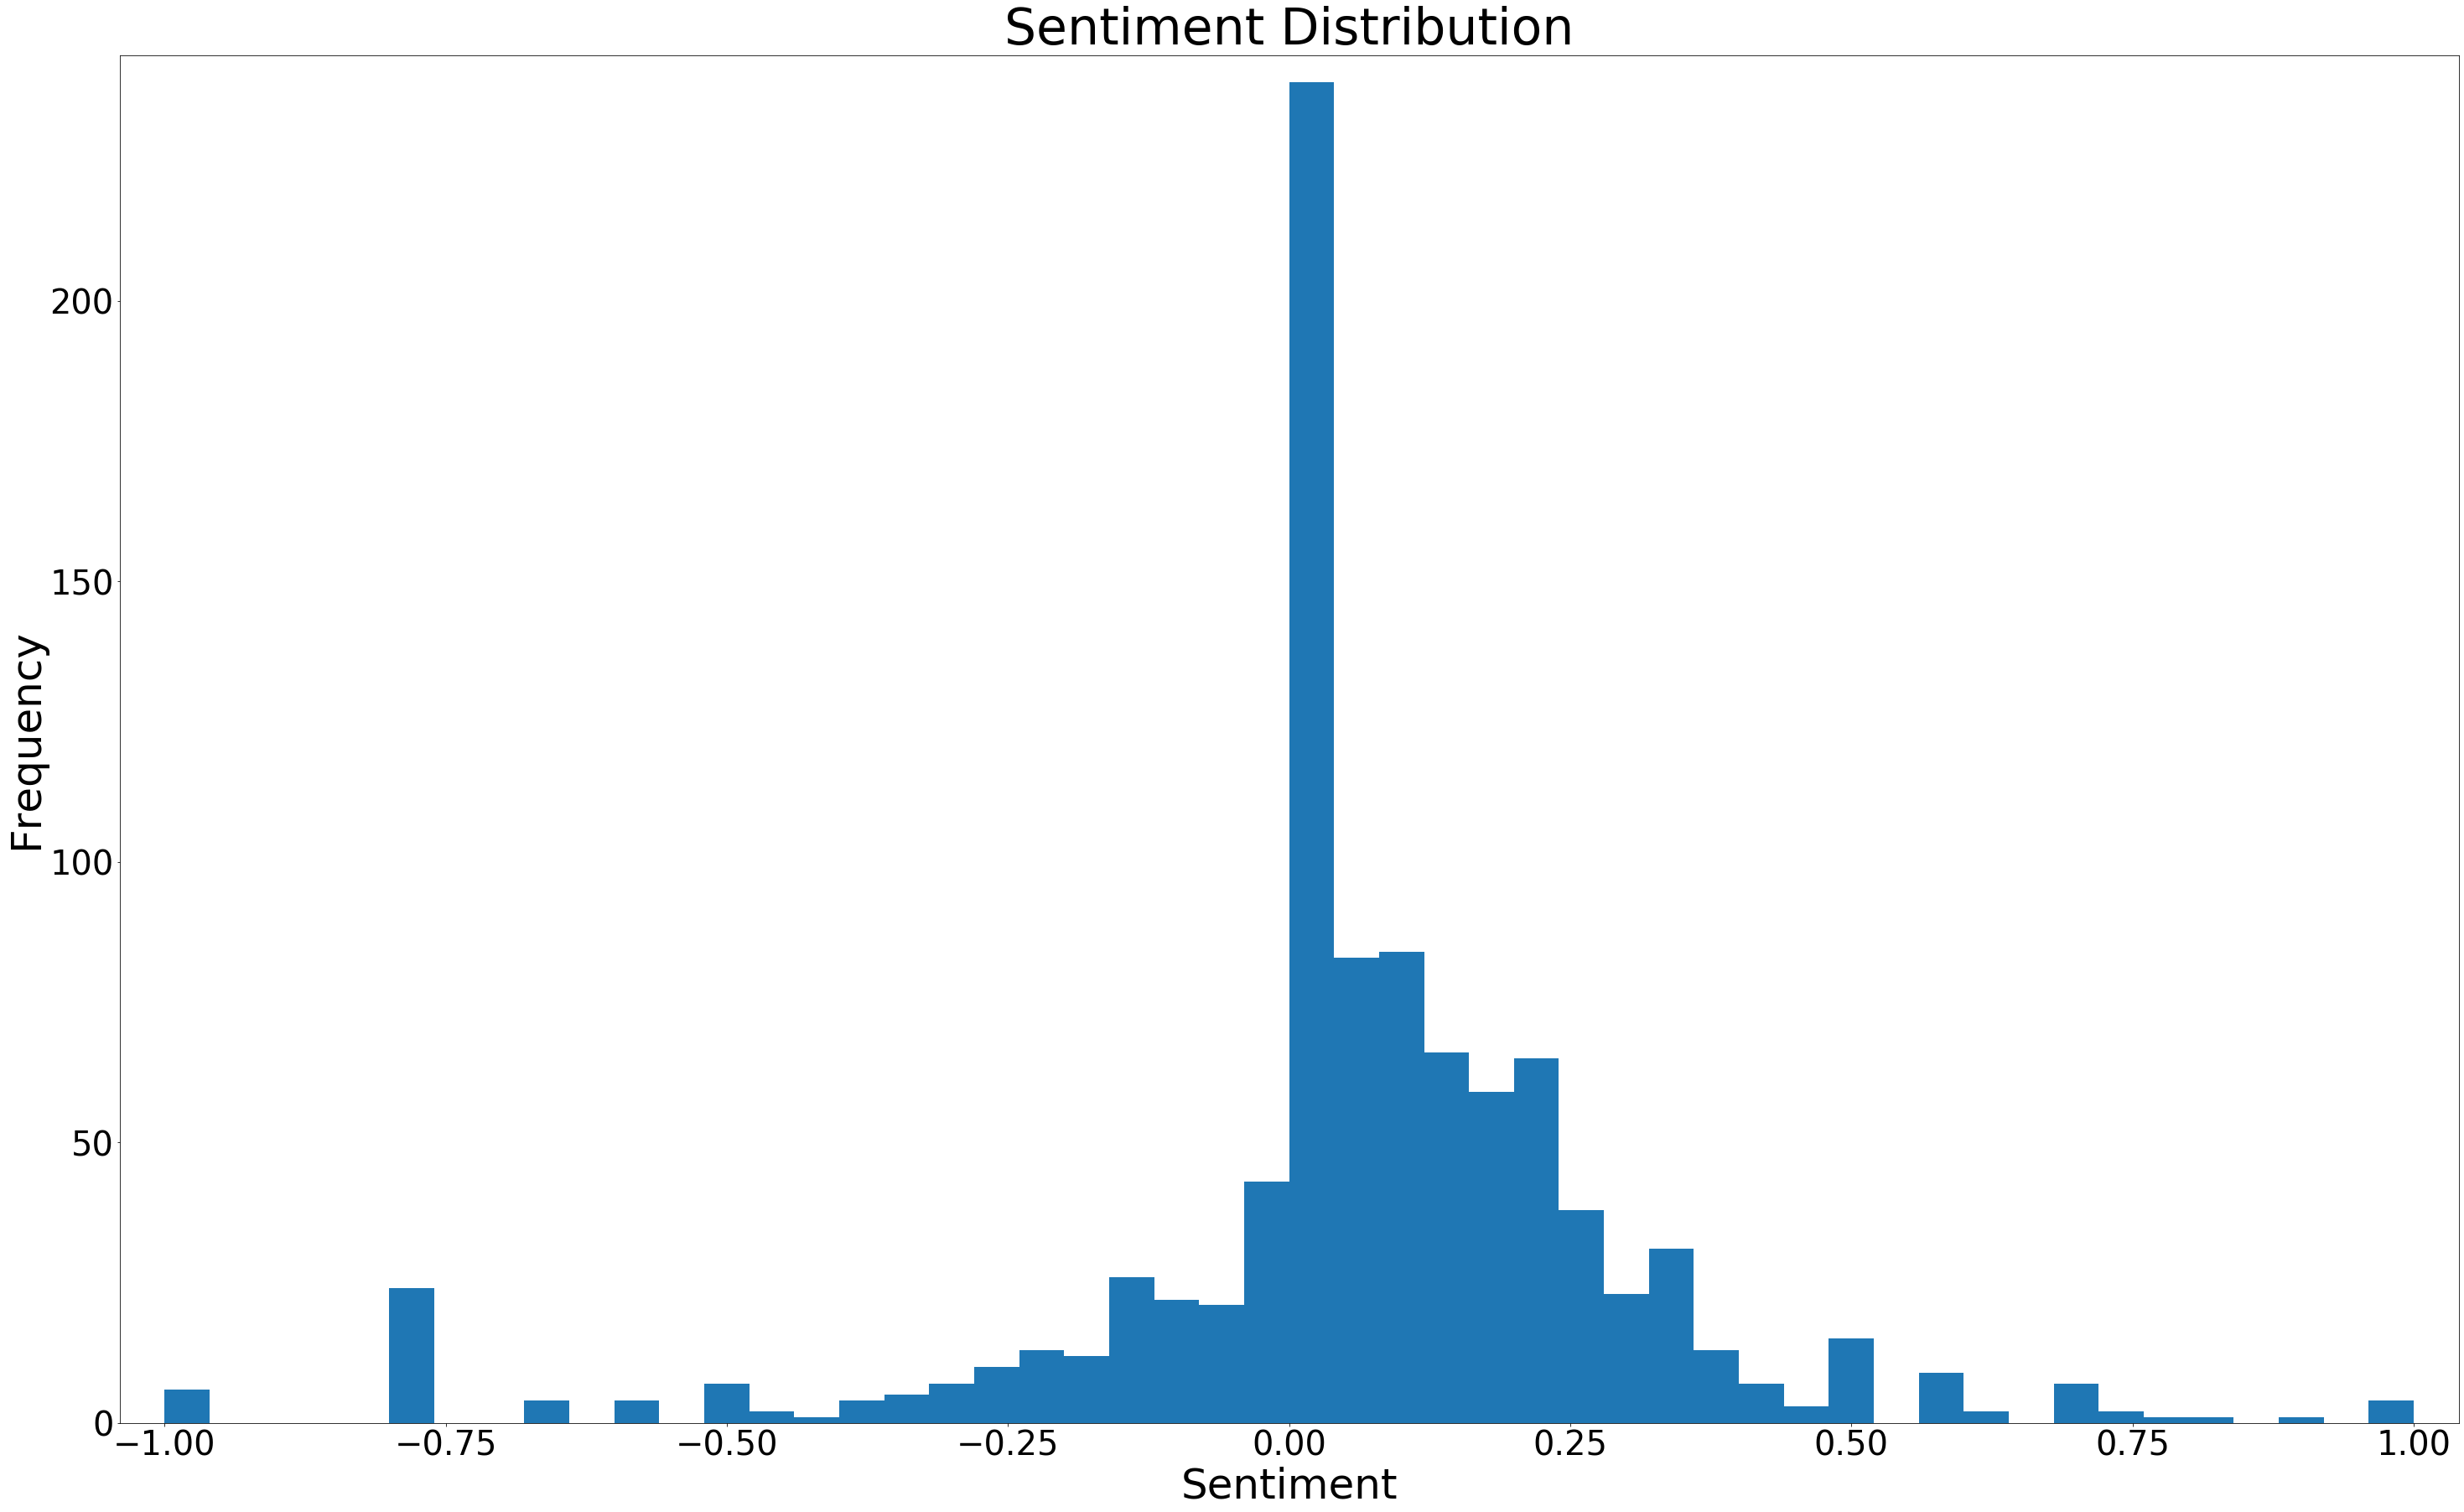

In [54]:
plot_sentiment_histogram(Razavi_Dataset_analyze)

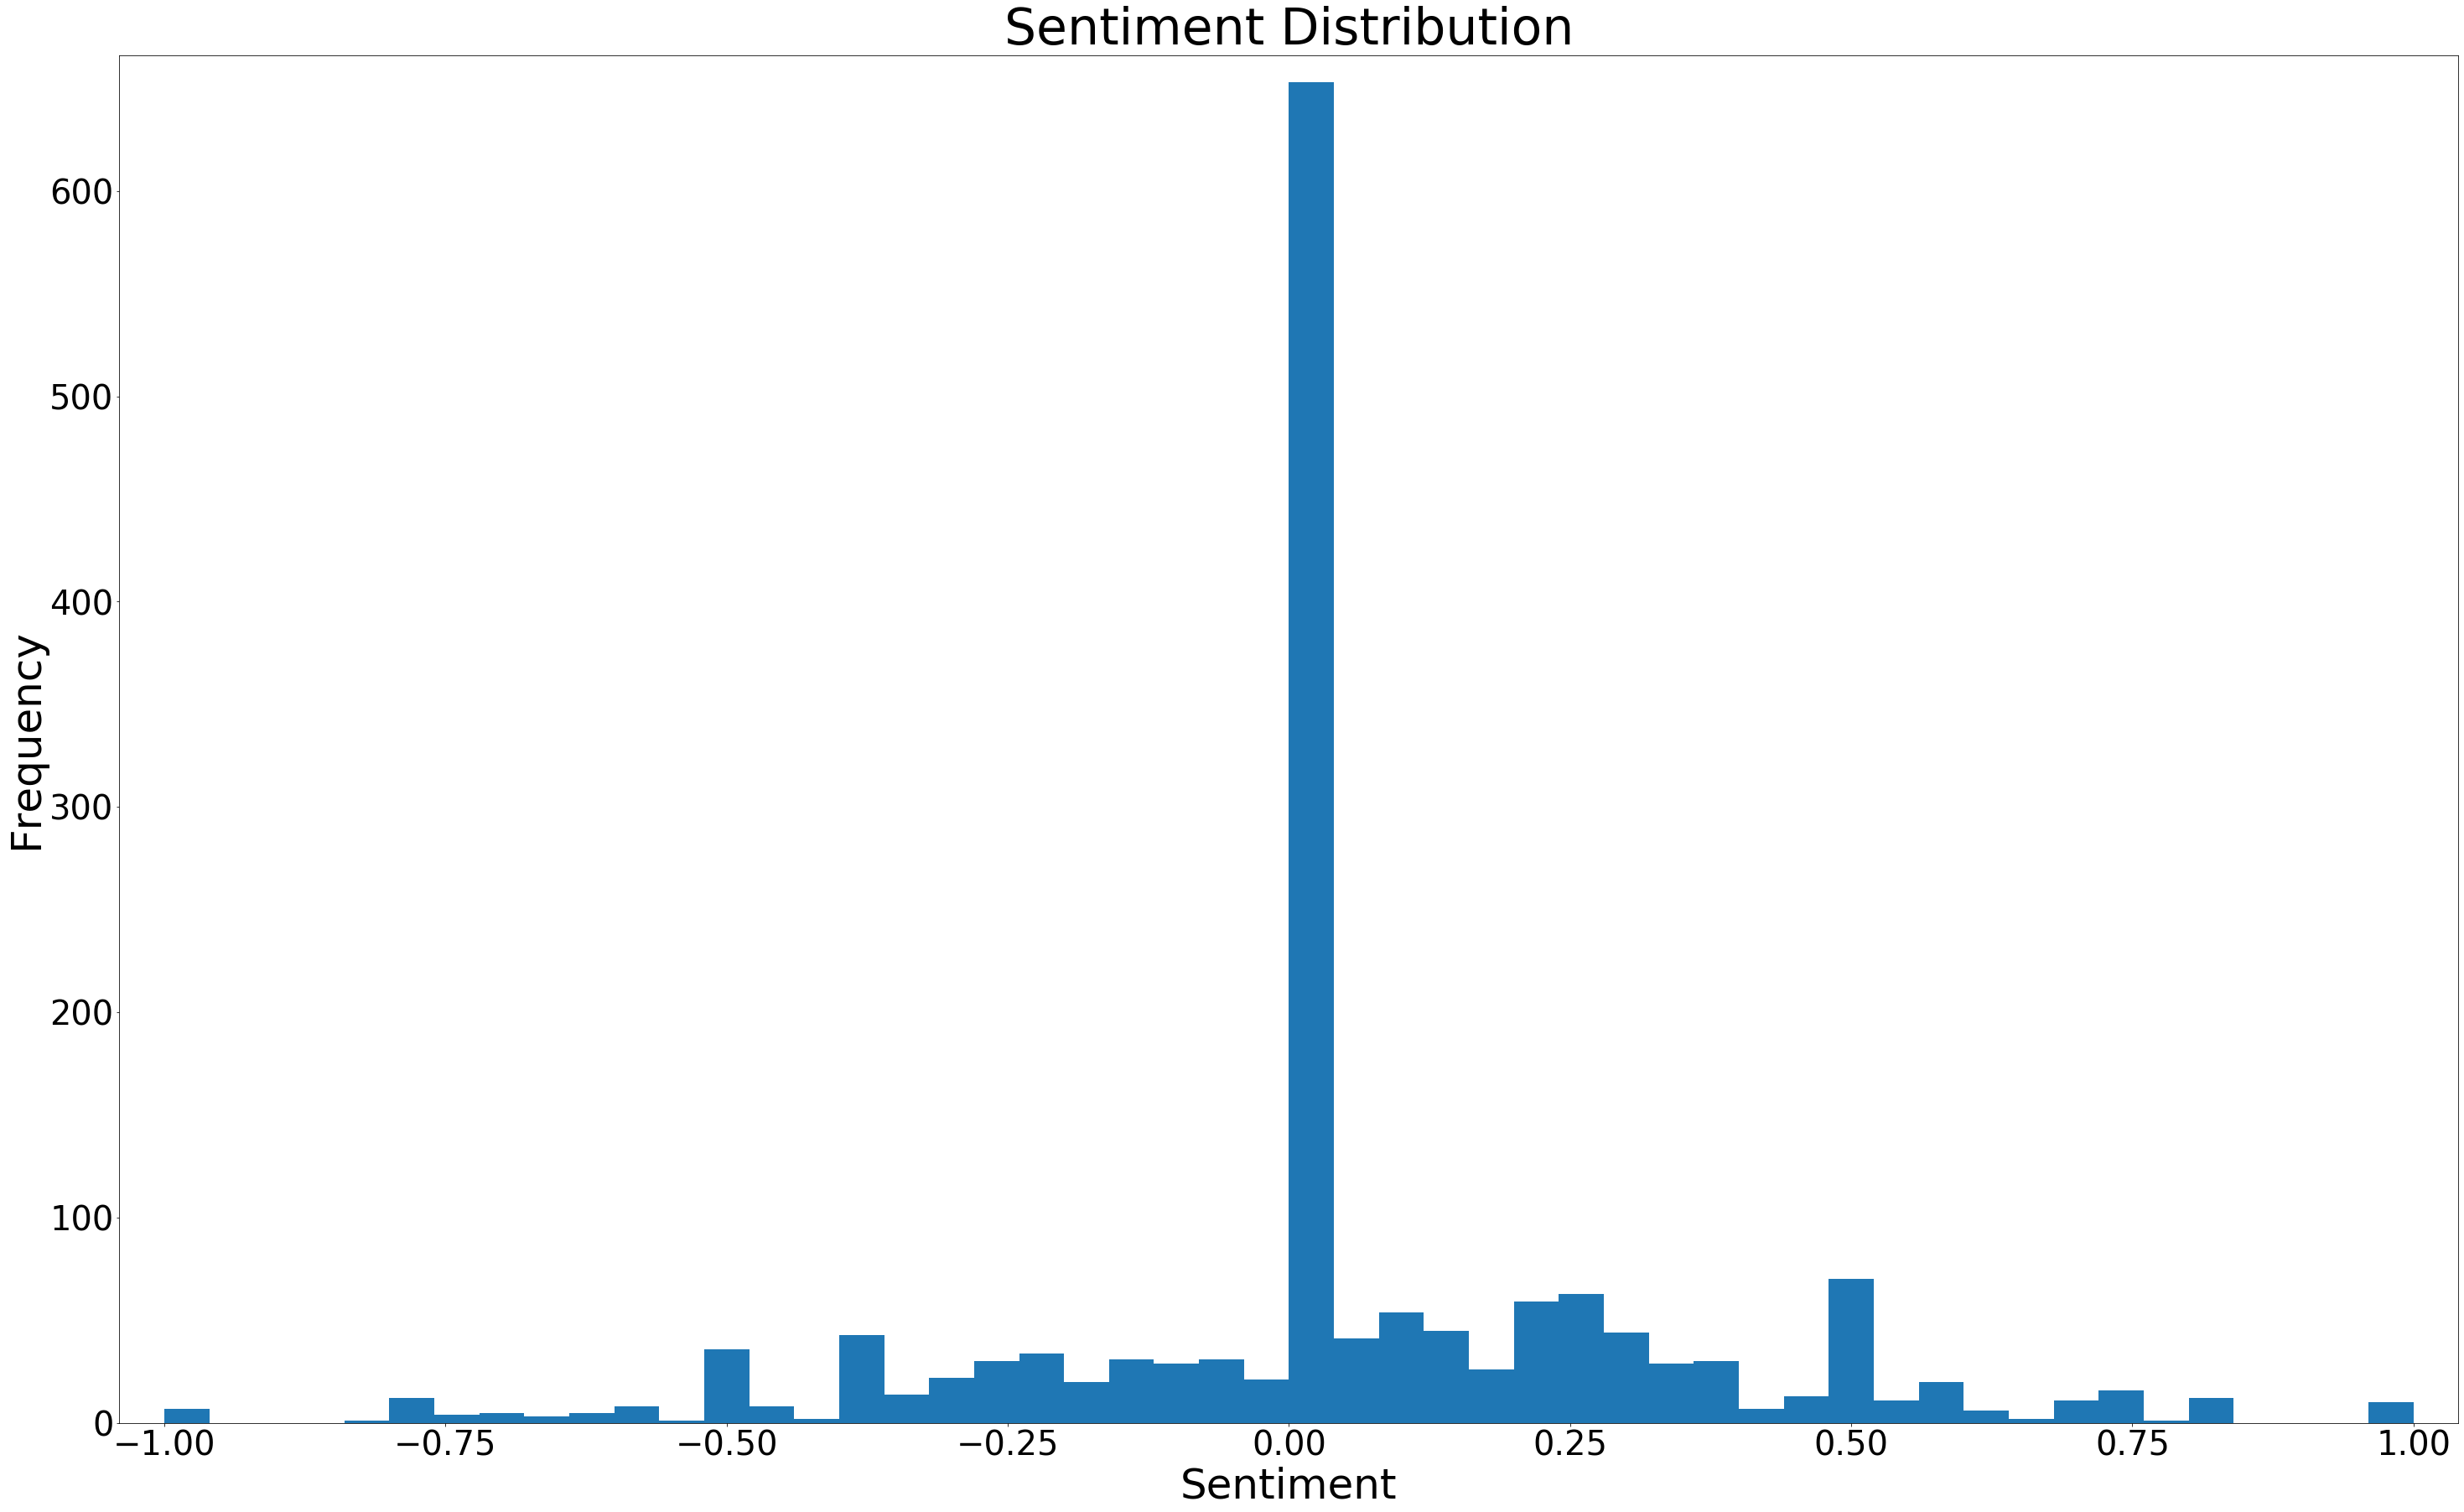

In [55]:
plot_sentiment_histogram(Waseem_Dataset_analyze)

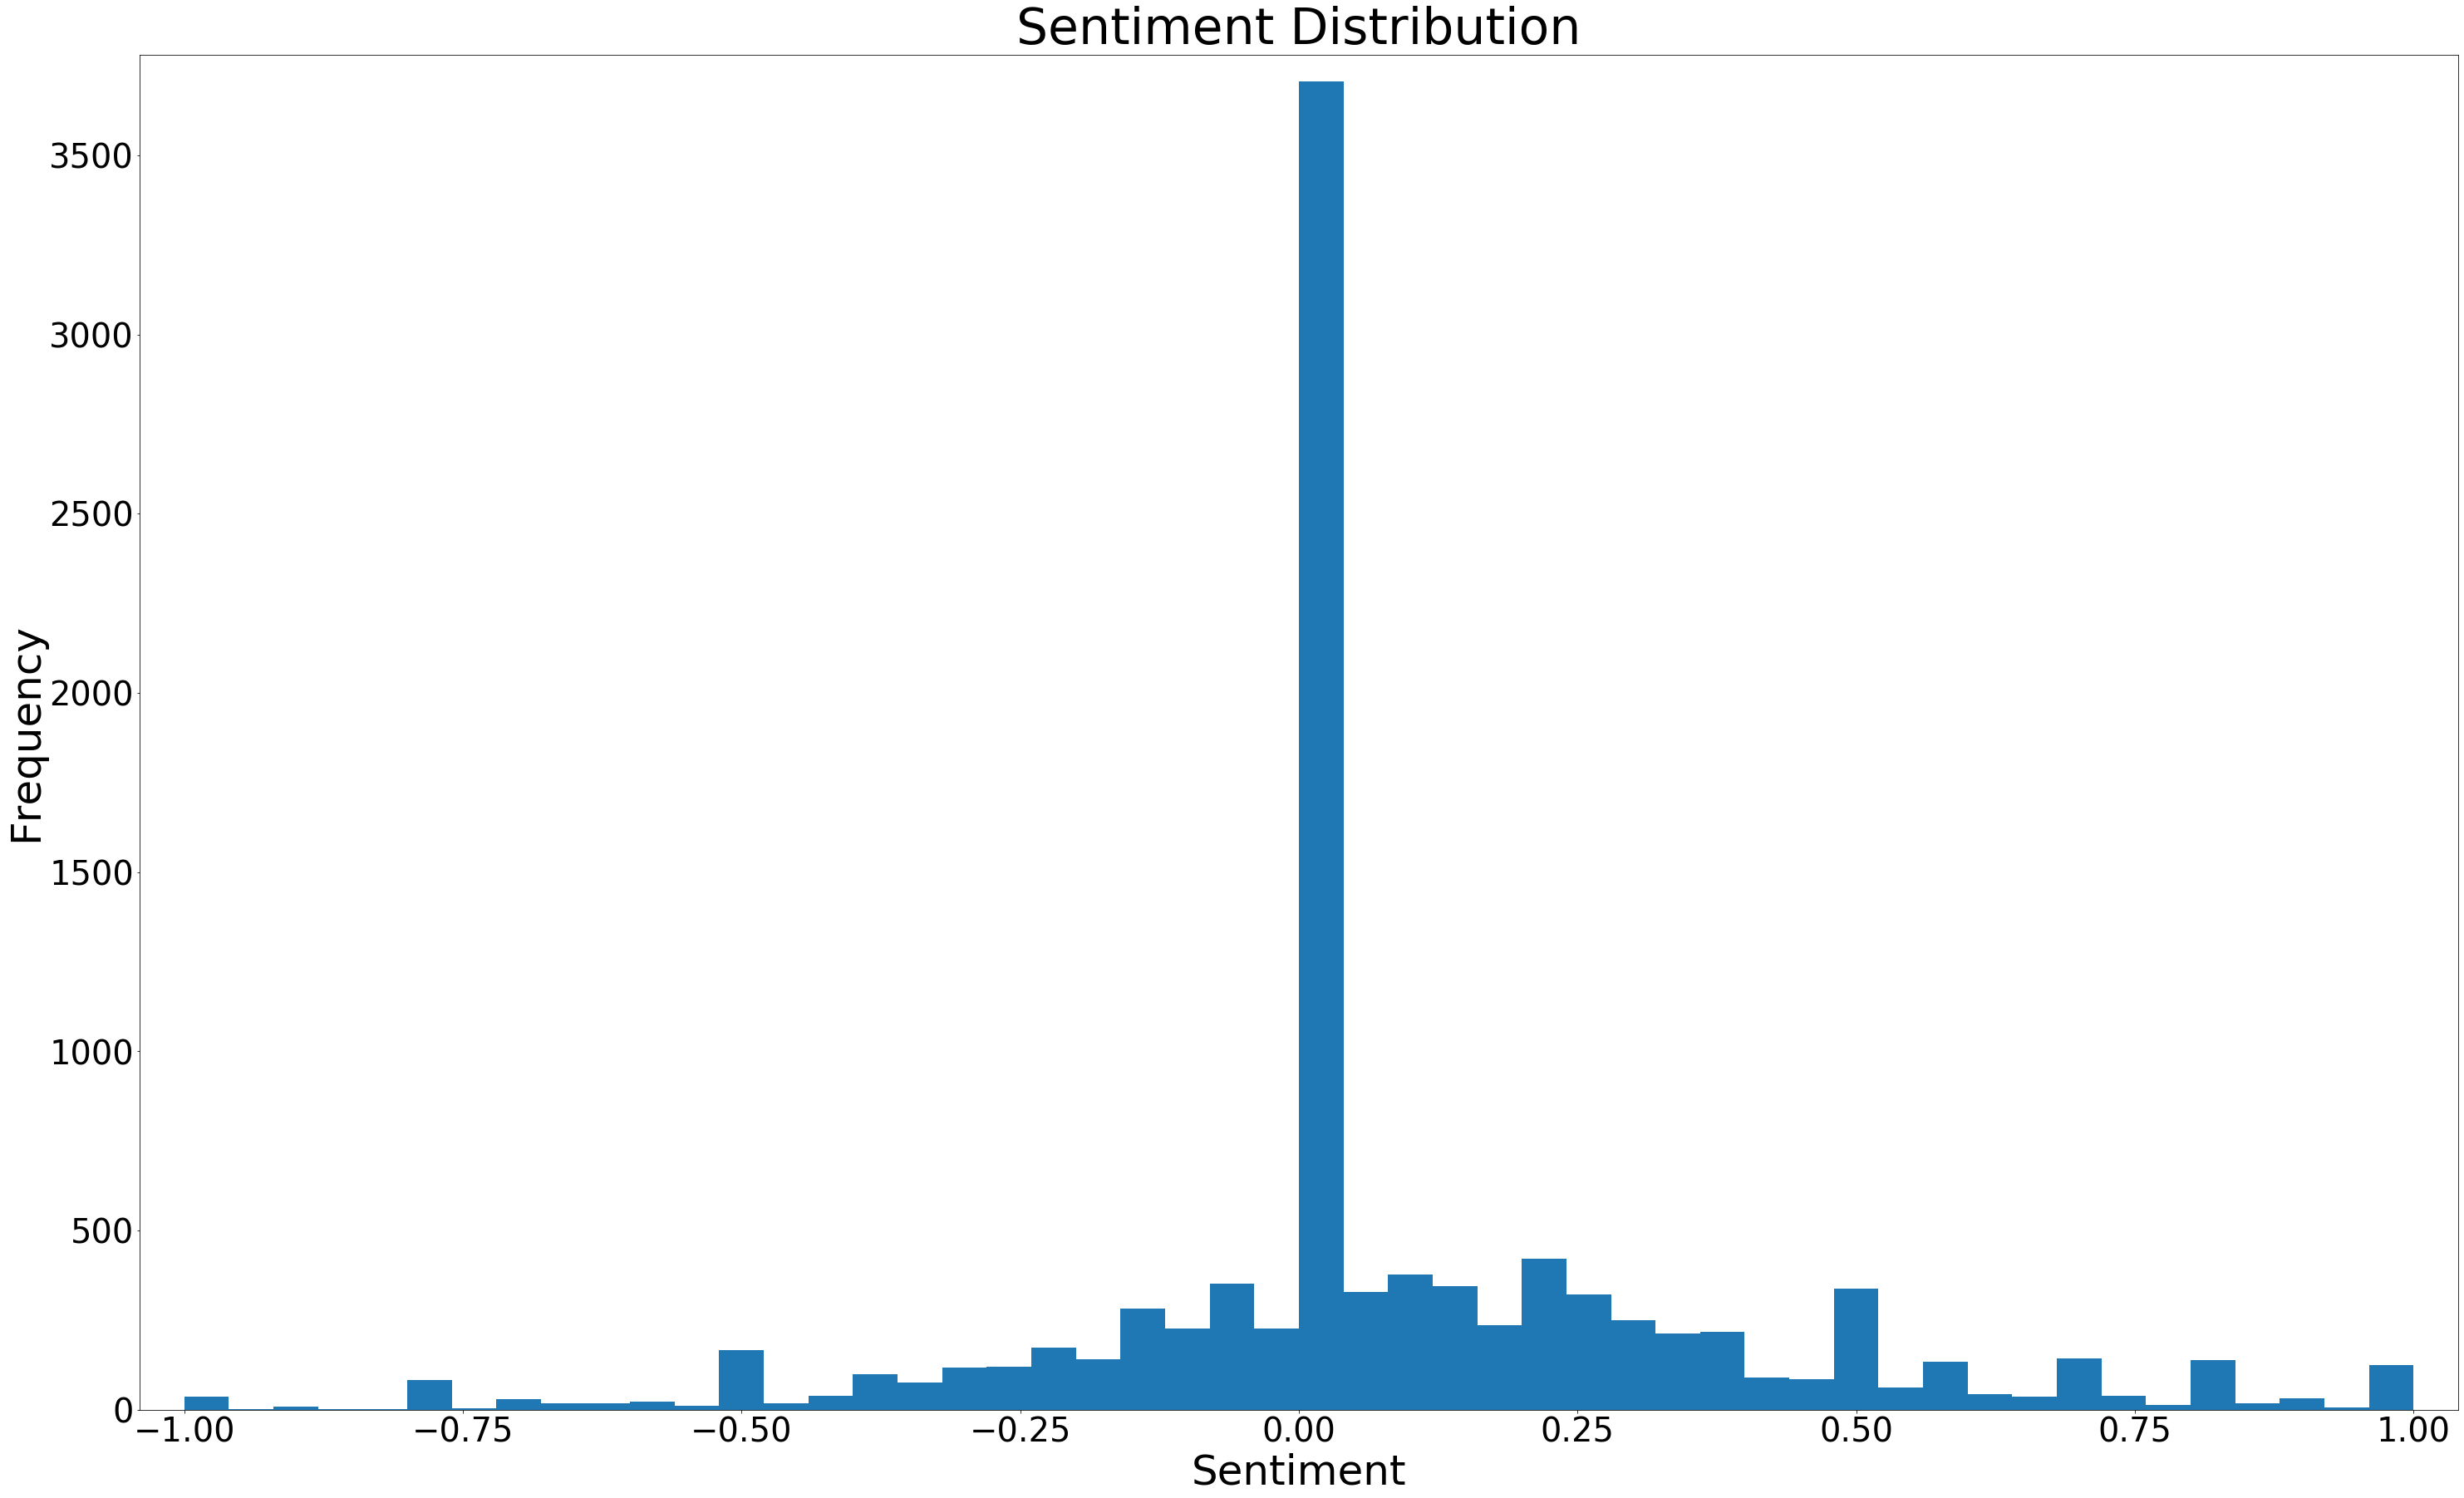

In [56]:
plot_sentiment_histogram(Kumar_Dataset_analyze)

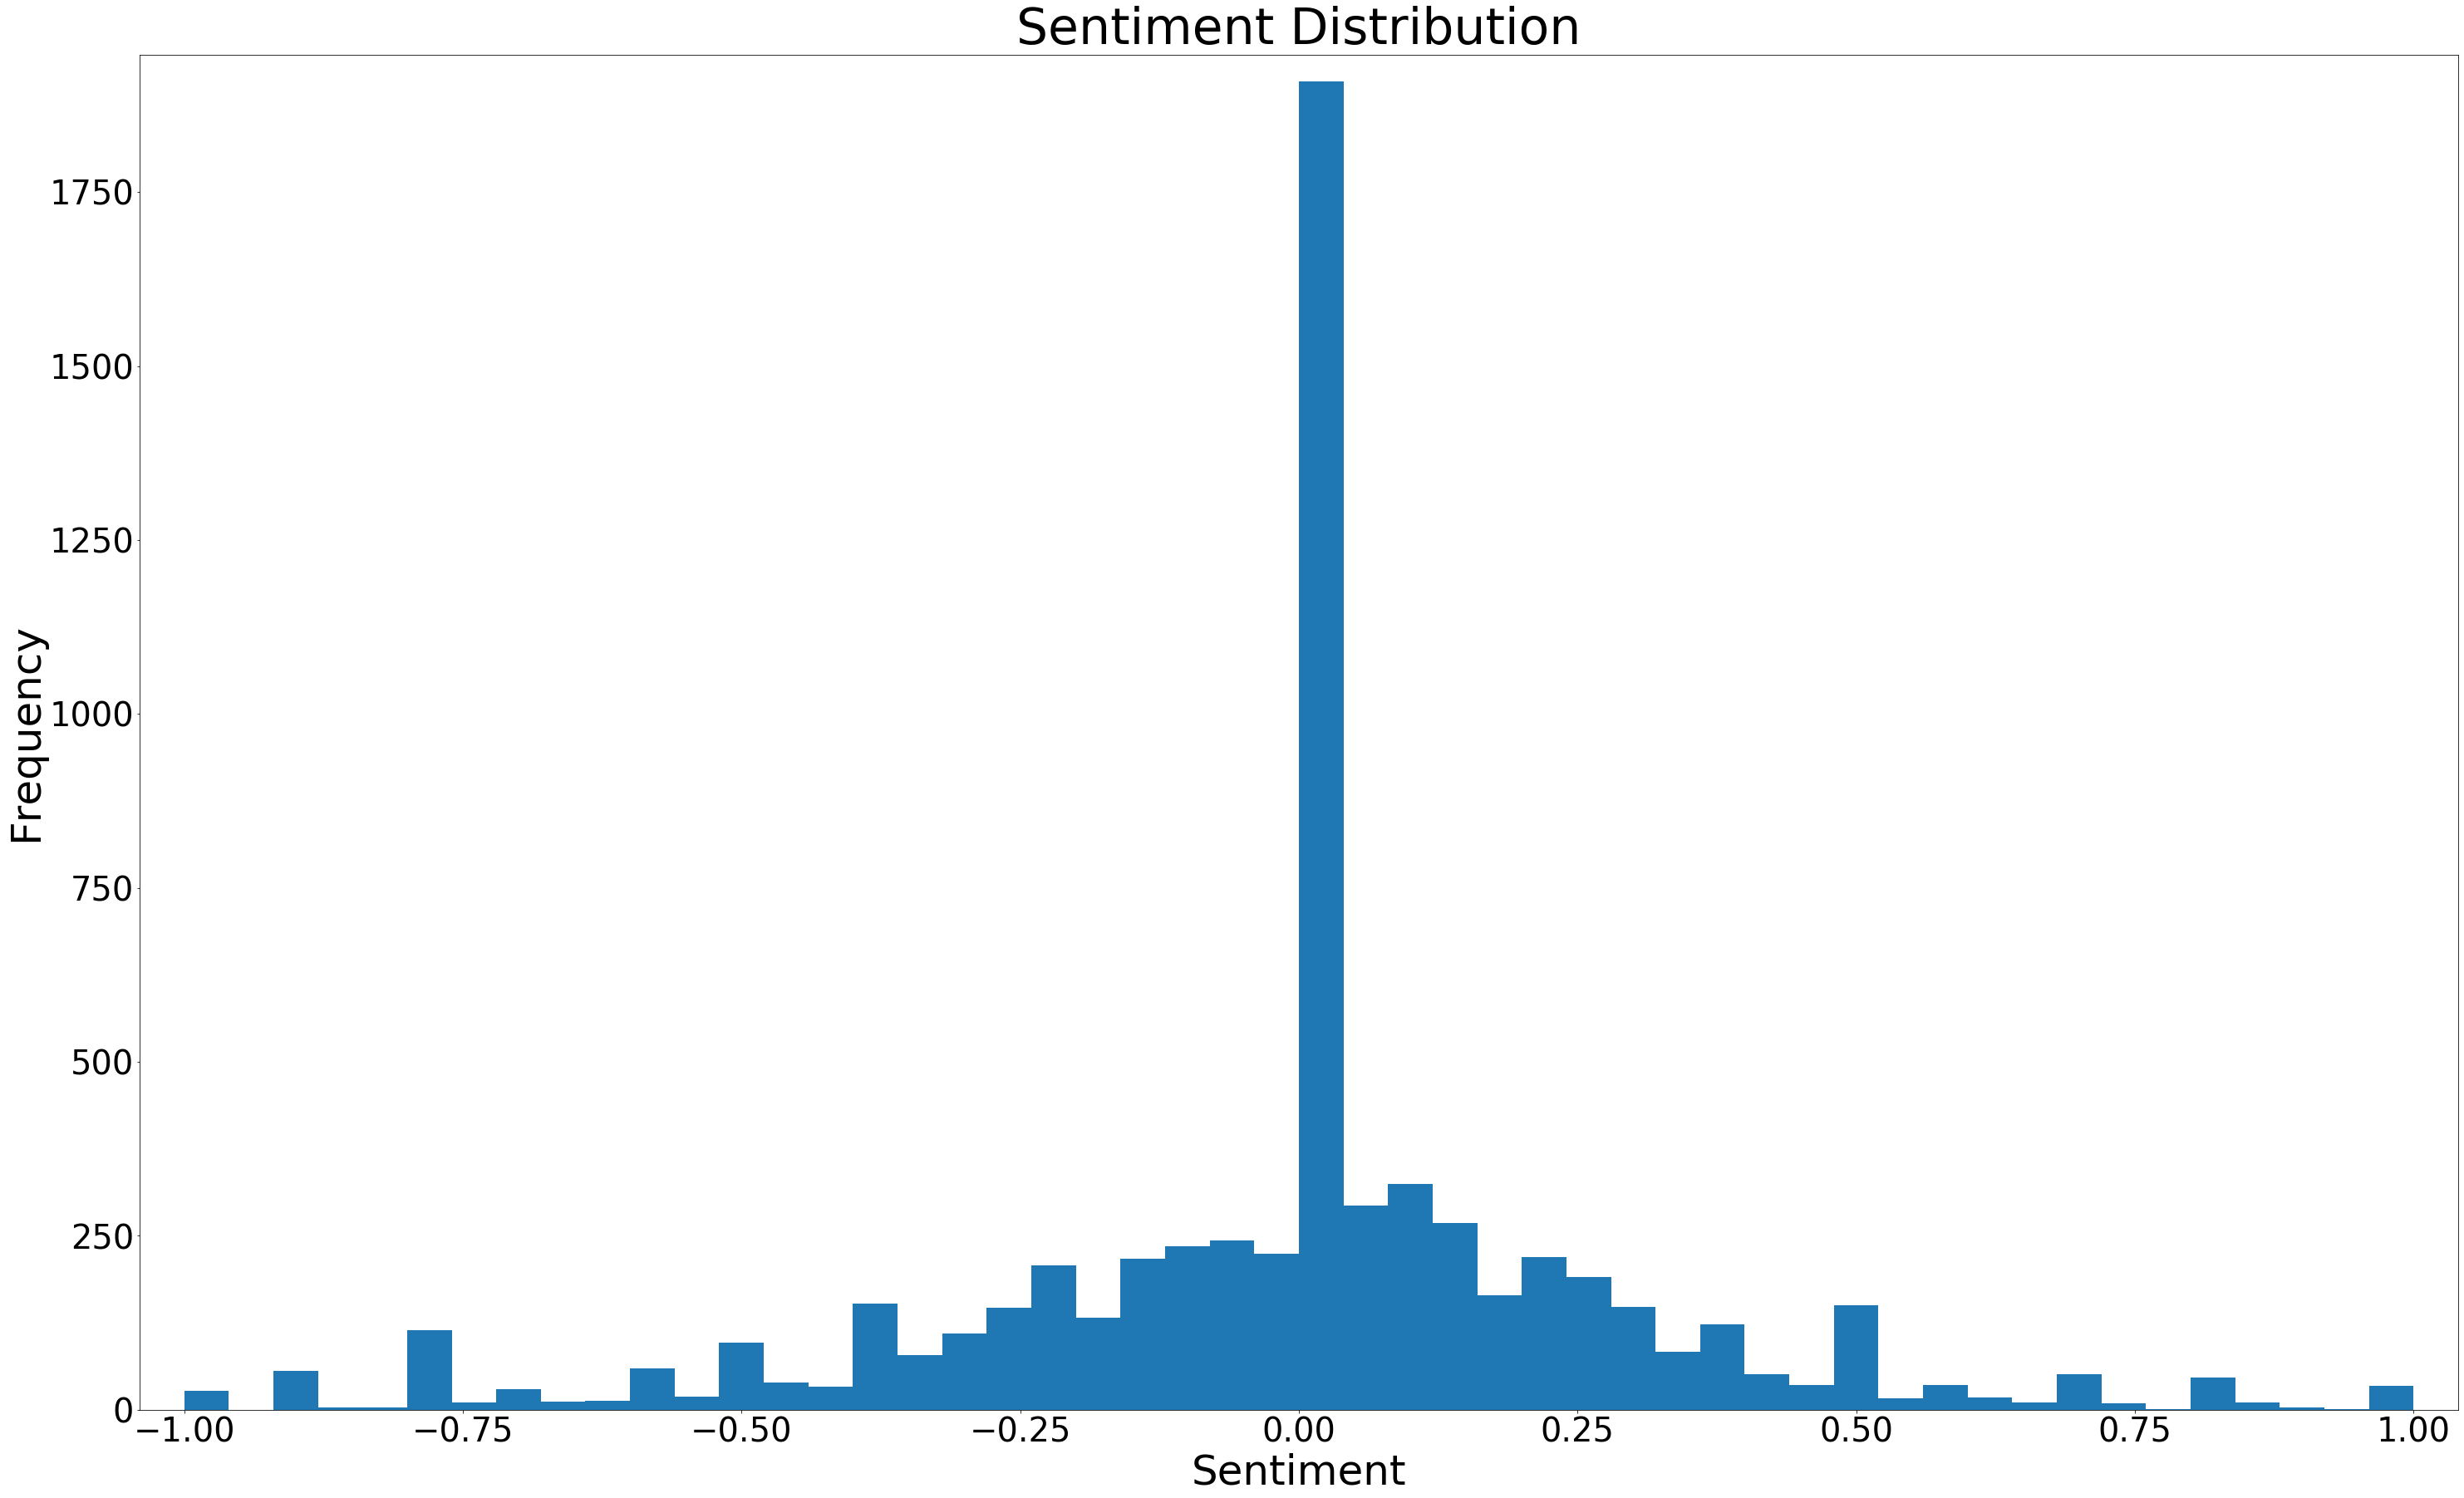

In [57]:
plot_sentiment_histogram(Offensive_Reddit_Dataset_analyze)

In [58]:
len(RM_DATA_analyze[RM_DATA_analyze['Label'] == 1][RM_DATA_analyze['sentiment'] == 0])

C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1806

In [59]:
len(RM_DATA_Filtered_analyze[RM_DATA_Filtered_analyze['Label'] == 0][RM_DATA_Filtered_analyze['sentiment'] > 0])

C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


479

In [60]:
# def find_negative_positive_sentiment_for_dataset(dataset):
#     sentiments_data = pd.DataFrame({'Sentiment':['positive','negative','zero'],
#                    '0':[len(dataset[dataset['Label'] == 0][dataset['sentiment'] > 0]),
#                         len(dataset[dataset['Label'] == 0][dataset['sentiment'] < 0]),
#                         len(dataset[dataset['Label'] == 0][dataset['sentiment'] == 0])],
#                    '1':[len(dataset[dataset['Label'] == 1][dataset['sentiment'] > 0]),
#                         len(dataset[dataset['Label'] == 1][dataset['sentiment'] < 0]),
#                         len(dataset[dataset['Label'] == 1][dataset['sentiment'] == 0])]})
#     return sentiments_data

In [61]:
def find_negative_positive_sentiment_for_dataset(dataset):
    sentiments_data = pd.DataFrame({'Label':['0','1'],
                   'positive':[len(dataset[dataset['Label'] == 0][dataset['sentiment'] > 0]),
                        len(dataset[dataset['Label'] == 1][dataset['sentiment'] > 0])],
                   'negative':[len(dataset[dataset['Label'] == 0][dataset['sentiment'] < 0]),
                        len(dataset[dataset['Label'] == 1][dataset['sentiment'] < 0])],
                   'zero': [len(dataset[dataset['Label'] == 0][dataset['sentiment'] == 0]),
                        len(dataset[dataset['Label'] == 1][dataset['sentiment'] == 0])] })
    return sentiments_data

In [62]:
def find_negative_positive_sentiment_for_dataset_percent(dataset):
    negative_class_len = len(dataset[dataset['Label'] == 0])
    positive_class_len = len(dataset[dataset['Label'] == 1])
    comment_length = len(dataset)
    sentiments_data = pd.DataFrame({'Label':['0','1','Total'],
                   'positive':[len(dataset[dataset['Label'] == 0][dataset['sentiment'] > 0])/negative_class_len,
                        len(dataset[dataset['Label'] == 1][dataset['sentiment'] > 0])/positive_class_len,
                        len(dataset[dataset['sentiment'] > 0])/comment_length],            
                   'negative':[len(dataset[dataset['Label'] == 0][dataset['sentiment'] < 0])/negative_class_len,
                        len(dataset[dataset['Label'] == 1][dataset['sentiment'] < 0])/positive_class_len,
                        len(dataset[dataset['sentiment'] < 0])/comment_length],  
                   'zero': [len(dataset[dataset['Label'] == 0][dataset['sentiment'] == 0])/negative_class_len,
                        len(dataset[dataset['Label'] == 1][dataset['sentiment'] == 0])/positive_class_len, 
                        len(dataset[dataset['sentiment'] == 0])/comment_length] }) 
    return sentiments_data

In [63]:
# def find_negative_positive_sentiment_for_dataset_percent(dataset):
# #     negative_class_len = len(dataset[dataset['Label'] == 0])
# #     positive_class_len = len(dataset[dataset['Label'] == 1])
#     comment_length = len(dataset)
#     sentiments_data = pd.DataFrame({'Label':['0','1'],
#                    'positive':[len(dataset[dataset['Label'] == 0][dataset['sentiment'] > 0])/comment_length,
#                         len(dataset[dataset['Label'] == 1][dataset['sentiment'] > 0])/comment_length],
#                    'negative':[len(dataset[dataset['Label'] == 0][dataset['sentiment'] < 0])/comment_length,
#                         len(dataset[dataset['Label'] == 1][dataset['sentiment'] < 0])/comment_length],
#                    'zero': [len(dataset[dataset['Label'] == 0][dataset['sentiment'] == 0])/comment_length,
#                         len(dataset[dataset['Label'] == 1][dataset['sentiment'] == 0])/comment_length] })
#     return sentiments_data

In [64]:
sentiment_analysis_RoastMe = find_negative_positive_sentiment_for_dataset(RM_DATA_analyze)
sentiment_analysis_RoastMe_percent = find_negative_positive_sentiment_for_dataset_percent(RM_DATA_analyze)
sentiment_analysis_RoastMe

C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame

Label  positive  negative  zero
0     0      1481      1157   862
1     1       982       712  1806

In [65]:
sentiment_analysis_RoastMe_percent

Label  positive  negative      zero
0      0  0.423143  0.330571  0.246286
1      1  0.280571  0.203429  0.516000
2  Total  0.351857  0.267000  0.381143

In [66]:
sentiment_analysis_RoastMe_filtered = find_negative_positive_sentiment_for_dataset(RM_DATA_Filtered_analyze)
sentiment_analysis_RoastMe_filtered_percent = find_negative_positive_sentiment_for_dataset_percent(RM_DATA_Filtered_analyze)
sentiment_analysis_RoastMe_filtered

C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame

Label  positive  negative  zero
0     0       479       245   276
1     1       233       251   516

In [67]:
sentiment_analysis_RoastMe_filtered_percent

Label  positive  negative   zero
0      0     0.479     0.245  0.276
1      1     0.233     0.251  0.516
2  Total     0.356     0.248  0.396

In [68]:
RM_DATA_Filtered_analyze[RM_DATA_Filtered_analyze['Label'] == 1][RM_DATA_Filtered_analyze['sentiment'] == 0]

C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


comment  \
1                                                   You look like the reason there are restraining orders   
3                                                                   You look like the type to smoke at 12   
5                                                 Your face is so oily that the US is trying to invade it   
17    I'm a bi guy. On behalf of the LGBT community, and gay/bi men everywhere, we request you go back...   
26                                                        The blunts you smoke are thicker than your legs   
...                                                                                                   ...   
1972                                             You look like a default create a wwe wrestler charachter   
1976                                                You look like youre on the frontlines invading Poland   
1980                                                                          You look like a sweaty dog.   
1992                                You look like you have to suck dick because of a nutrient deficiency.   
1995  you seem like a guy where mummy and daddy have paid for everything youve ever had. including all...   

                                                                                       lemmatized_comment  \
1                                                    You look like the reason there are restraining order   
3                                                                   You look like the type to smoke at 12   
5                                                 Your face is so oily that the US is trying to invade it   
17    I 'm a bi guy . On behalf of the LGBT community , and gay/bi men everywhere , we request you go ...   
26                                                         The blunts you smoke are thicker than your leg   
...                                                                                                   ...   
1972                                             You look like a default create a wwe wrestler charachter   
1976                                                You look like youre on the frontlines invading Poland   
1980                                                                         You look like a sweaty dog .   
1992                               You look like you have to suck dick because of a nutrient deficiency .   
1995  you seem like a guy where mummy and daddy have paid for everything youve ever had . including al...   

      sentiment  Label  lengthes  
1           0.0      1         9  
3           0.0      1         9  
5           0.0      1        13  
17          0.0      1        22  
26          0.0      1         9  
...         ...    ...       ...  
1972        0.0      1        10  
1976        0.0      1         9  
1980        0.0      1         6  
1992        0.0      1        13  
1995        0.0      1        20  

[516 rows x 5 columns]

In [69]:
sentiment_analysis_Kaggle = find_negative_positive_sentiment_for_dataset(Kaggle_DATA_analyze)
sentiment_analysis_Kaggle_percent = find_negative_positive_sentiment_for_dataset_percent(Kaggle_DATA_analyze)
sentiment_analysis_Kaggle

C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame

Label  positive  negative  zero
0     0      2894       921  1185
1     1      1379      2664   957

In [70]:
sentiment_analysis_Kaggle_percent

Label  positive  negative    zero
0      0    0.5788    0.1842  0.2370
1      1    0.2758    0.5328  0.1914
2  Total    0.4273    0.3585  0.2142

In [71]:
sentiment_analysis_Founta = find_negative_positive_sentiment_for_dataset(Founta_Dataset_analyze)
sentiment_analysis_Founta_percent = find_negative_positive_sentiment_for_dataset_percent(Founta_Dataset_analyze)
sentiment_analysis_Founta

C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame

Label  positive  negative  zero
0     0      2041      1598  1361
1     1         6      4990     4

In [72]:
sentiment_analysis_Founta_percent

Label  positive  negative    zero
0      0    0.4082    0.3196  0.2722
1      1    0.0012    0.9980  0.0008
2  Total    0.2047    0.6588  0.1365

In [73]:
Founta_Dataset_analyze[Founta_Dataset_analyze['Label'] == 0]

comment  \
0     Grading - Thursday evening, April 13th, Leederville Dojo. It would be great if everyone could co...   
1             OLD LARGE HISTORIC AUSTRALIAN WOOL &amp; SHEARING PHOTO, TUMBY BAY SHEARERS c1890 @url @url   
2                           RT @user: HIS MODELLING LIGHTS UR ASS ON FIRE RT IF U CRIED BLOODY TEARS @url   
3            "Can't sit here, seats taken!" So much fun seeing our bae kegx doing her thang @userג€¦ @url   
8     @user that was the most patronising thing I've ever heard about young people and propaganda. Wha...   
...                                                                                                   ...   
9992  Have you praised God today? Just call these names,don't Stop 1. Wonderful 2. Counsellor 3. Princ...   
9993  Every day, make an effort to talk to at least three members of the opposite sex. You'll be shock...   
9996        Found a Transponder Snail! Get an inside look at the flashiest crew around! @url hashtag @url   
9997                                       NYC's Finest Public Restrooms Are Getting Even Finer @url @url   
9998         NASA astronauts dropped an important part during spacewalk, and now itג€™s gone forever @url   

                                                                                       lemmatized_comment  \
0     Grading - Thursday evening , April 13th , Leederville Dojo . It would be great if everyone could...   
1        OLD LARGE HISTORIC AUSTRALIAN WOOL & amp ; SHEARING PHOTO , TUMBY BAY SHEARERS c1890 @ url @ url   
2                        RT @ user : HIS MODELLING LIGHTS UR ASS ON FIRE RT IF U CRIED BLOODY TEARS @ url   
3     `` Ca n't sit here , seat taken ! '' So much fun seeing our bae kegx doing her thang @ userג€¦ @...   
8     @ user that wa the most patronising thing I 've ever heard about young people and propaganda . W...   
...                                                                                                   ...   
9992  Have you praised God today ? Just call these name , do n't Stop 1 . Wonderful 2 . Counsellor 3 ....   
9993  Every day , make an effort to talk to at least three member of the opposite sex . You 'll be sho...   
9996    Found a Transponder Snail ! Get an inside look at the flashiest crew around ! @ url hashtag @ url   
9997                                    NYC 's Finest Public Restrooms Are Getting Even Finer @ url @ url   
9998        NASA astronaut dropped an important part during spacewalk , and now itג€™s gone forever @ url   

      sentiment  Label  lengthes  
0      0.400000      0        19  
1      0.078571      0        14  
2     -0.800000      0        16  
3      0.300000      0        17  
8      0.156250      0        22  
...         ...    ...       ...  
9992   1.000000      0        20  
9993  -0.125000      0        26  
9996   0.000000      0        16  
9997   0.000000      0        10  
9998   0.400000      0        14  

[5000 rows x 5 columns]

In [74]:
sentiment_analysis_Razavi = find_negative_positive_sentiment_for_dataset(Razavi_Dataset_analyze)
sentiment_analysis_Razavi_percent = find_negative_positive_sentiment_for_dataset_percent(Razavi_Dataset_analyze)
sentiment_analysis_Razavi

C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame

Label  positive  negative  zero
0     0       341        63    78
1     1       242       148    92

In [75]:
pos_sent_off_Razavi = Razavi_Dataset_analyze[Razavi_Dataset_analyze['Label'] == 1][Razavi_Dataset_analyze['sentiment'] > 0]['comment']

C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [76]:
# pos_sent_off_Razavi.to_csv('positive sentiment offensive Razavi.csv', index=False)

In [77]:
sentiment_analysis_Razavi_percent

Label  positive  negative      zero
0      0  0.707469  0.130705  0.161826
1      1  0.502075  0.307054  0.190871
2  Total  0.604772  0.218880  0.176349

In [78]:
sentiment_analysis_Waseem = find_negative_positive_sentiment_for_dataset(Waseem_Dataset_analyze)
sentiment_analysis_Waseem_percent = find_negative_positive_sentiment_for_dataset_percent(Waseem_Dataset_analyze)
sentiment_analysis_Waseem 

C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame

Label  positive  negative  zero
0     0       332       181   282
1     1       262       186   347

In [79]:
sentiment_analysis_Waseem_percent

Label  positive  negative      zero
0      0  0.417610  0.227673  0.354717
1      1  0.329560  0.233962  0.436478
2  Total  0.373585  0.230818  0.395597

In [80]:
sentiment_analysis_Kumar = find_negative_positive_sentiment_for_dataset(Kumar_Dataset_analyze)
sentiment_analysis_Kumar_percent = find_negative_positive_sentiment_for_dataset_percent(Kumar_Dataset_analyze)
sentiment_analysis_Kumar 

C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame

Label  positive  negative  zero
0     0      2319       870  1811
1     1      1933      1406  1661

In [81]:
sentiment_analysis_Kumar_percent

Label  positive  negative    zero
0      0    0.4638    0.1740  0.3622
1      1    0.3866    0.2812  0.3322
2  Total    0.4252    0.2276  0.3472

In [82]:
sentiment_analysis_Offensive_Reddit = find_negative_positive_sentiment_for_dataset(Offensive_Reddit_Dataset_analyze)
sentiment_analysis_Offensive_Reddit_percent = find_negative_positive_sentiment_for_dataset_percent(Offensive_Reddit_Dataset_analyze)
sentiment_analysis_Offensive_Reddit 

C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\talil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame

Label  positive  negative  zero
0     0      1536       687  1007
1     1       995      1576   659

In [83]:
sentiment_analysis_Offensive_Reddit_percent

Label  positive  negative      zero
0      0  0.475542  0.212693  0.311765
1      1  0.308050  0.487926  0.204025
2  Total  0.391796  0.350310  0.257895

In [84]:
def get_words_frequencies(comments):
    words = []
    for comment in comments:
        for word in comment.lower().split():            
            words.append(ss.stem(word))
        words = [word for word in words if word not in stop_words and word.isalnum()]
    word_freq = FreqDist(words)
    return word_freq

In [85]:
word_freq_RoastMe = get_words_frequencies(RM_DATA_analyze['comment'])

In [86]:
word_freq_RoastMe

FreqDist({'like': 1573, 'look': 1019, 'get': 649, 'peopl': 598, 'becaus': 513, 'would': 424, 'fuck': 415, 'one': 410, 'think': 404, 'go': 386, ...})

In [87]:
word_freq_RoastMe = get_words_frequencies(RM_DATA_analyze['lemmatized_comment'])

In [88]:
word_freq_RoastMe

FreqDist({'like': 1622, 'look': 1050, 'wa': 968, 'peopl': 693, 'get': 659, 'becaus': 520, 'woman': 512, 'would': 478, 'one': 467, 'fuck': 462, ...})

In [89]:
word_freq_RoastMe_filtered = get_words_frequencies(RM_DATA_Filtered_analyze['lemmatized_comment'])

In [90]:
word_freq_RoastMe_filtered

FreqDist({'like': 729, 'look': 553, 'wa': 356, 'user': 194, 'get': 194, 'one': 181, 'peopl': 167, 'would': 160, 'ha': 157, 'becaus': 147, ...})

In [91]:
word_freq_Kaggle = get_words_frequencies(Kaggle_DATA_analyze['lemmatized_comment'])
word_freq_Kaggle

FreqDist({'fuck': 3842, 'articl': 3064, 'wa': 2795, 'page': 2765, 'like': 2412, 'wikipedia': 2383, 'edit': 2036, 'go': 1963, 'u': 1962, 'talk': 1704, ...})

In [92]:
word_freq_Founta = get_words_frequencies(Founta_Dataset_analyze['lemmatized_comment'])
word_freq_Founta

FreqDist({'user': 7794, 'url': 5677, 'rt': 3282, 'hashtag': 2307, 'fuck': 1867, 'idiot': 893, 'like': 824, 'hate': 801, 'bitch': 782, 'bad': 747, ...})

In [93]:
word_freq_Razavi = get_words_frequencies(Razavi_Dataset_analyze['lemmatized_comment'])
word_freq_Razavi


FreqDist({'wa': 460, 'one': 376, 'would': 342, 'know': 295, 'get': 290, 'like': 275, 'use': 273, 'dont': 261, 'ha': 242, 'ani': 229, ...})

In [94]:
word_freq_Waseem = get_words_frequencies(Waseem_Dataset_analyze['lemmatized_comment'])
word_freq_Waseem

FreqDist({'user': 1446, 'feminazi': 438, 'url': 277, 'rt': 194, 'mkr': 141, 'woman': 125, 'like': 116, 'get': 98, 'go': 90, 'wa': 80, ...})

In [95]:
word_freq_Kumar = get_words_frequencies(Kumar_Dataset_analyze['lemmatized_comment'])
word_freq_Kumar

FreqDist({'india': 1233, 'u': 1167, 'peopl': 1043, 'ha': 943, 'indian': 902, 'like': 789, 'wa': 720, 'onli': 684, 'one': 650, 'whi': 613, ...})

In [96]:
word_freq_Offensive_Reddit = get_words_frequencies(Offensive_Reddit_Dataset_analyze['lemmatized_comment'])
word_freq_Offensive_Reddit

FreqDist({'like': 1342, 'peopl': 970, 'fuck': 848, 'trump': 846, 'wa': 719, 'time': 690, 'retard': 682, 'get': 653, 'woman': 636, 'go': 634, ...})

In [97]:
Razavi_Dataset_analyze

comment  \
0    '1999 is certainly going to be know as one or the other. There was another quake, in Mexico, a b...   
1    'I see Pocono has put up some info on the new TeleVue 31.5 mm ep. Hefty price tag though. I thin...   
2                                                      'i want you tell me some nice short student joke'   
3    'Dont you get it boy? Isnt the sig file below enough to burst your bubble? You want to discuss y...   
4                                                                  'tell me your name you mental retard'   
..                                                                                                   ...   
959                          'would it be possible for you to tell me the name of this thing over there'   
960  'One of the true great industralists of the 20th century (who else is left?). RIP. I agree with ...   
961  'TTT Forma Bar 42cm $15.000 TTT Forma SL Bar 42cm $20.00 TTT Prima 220 42cm $50.00 Specialized T...   
962  'i have a practical question, how does one take Viagra in a relationship where spontaneous sex i...   
963                                                       'tell me what is our decision to this problem'   

                                                                                      lemmatized_comment  \
0    '1999 is certainly going to be know a one or the other . There wa another quake , in Mexico , a ...   
1    ' I see Pocono ha put up some info on the new TeleVue 31.5 mm ep . Hefty price tag though . I th...   
2                                                    ' i want you tell me some nice short student joke '   
3    'Dont you get it boy ? Isnt the sig file below enough to burst your bubble ? You want to discus ...   
4                                                                 'tell me your name you mental retard '   
..                                                                                                   ...   
959                         'would it be possible for you to tell me the name of this thing over there '   
960  'One of the true great industralists of the 20th century ( who else is left ? ) . RIP . I agree ...   
961  'TTT Forma Bar 42cm $ 15.000 TTT Forma SL Bar 42cm $ 20.00 TTT Prima 220 42cm $ 50.00 Specialize...   
962  ' i have a practical question , how doe one take Viagra in a relationship where spontaneous sex ...   
963                                                      'tell me what is our decision to this problem '   

     sentiment  Label  lengthes  
0     0.041327      1        60  
1     0.568182      0        35  
2     0.300000      0        10  
3    -0.019537      1       378  
4    -0.500000      1         7  
..         ...    ...       ...  
959   0.000000      0        16  
960   0.370000      0       102  
961   0.208670      0        63  
962   0.167708      1       128  
963   0.000000      0         9  

[964 rows x 5 columns]

In [98]:
def frequency_plot(tuples_list, x_lable,n):
    common_subjects = []*n
    #common_words = num_of_sents_freq
    freq = []*n
    for i in np.arange(len(tuples_list)):
        common_subjects.append(tuples_list[i][0])
        freq.append(tuples_list[i][1])

    width = 0.5
    plt. xlabel(x_lable, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xticks(fontsize=9, rotation="vertical")
    plt.bar(common_subjects, freq, width)
    #plt.xticks(indexes + width * 0.5, labels)
    plt.show()

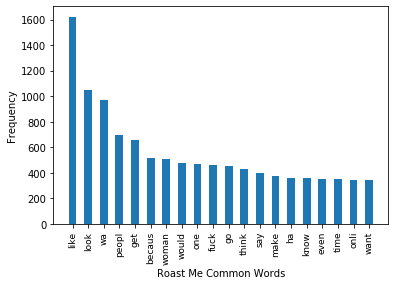

In [99]:
frequency_plot(word_freq_RoastMe.most_common(20),"Roast Me Common Words",20)

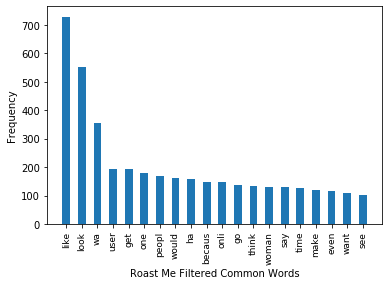

In [100]:
frequency_plot(word_freq_RoastMe_filtered.most_common(20),"Roast Me Filtered Common Words",20)

In [101]:
word_freq_Kaggle = get_words_frequencies(Kaggle_DATA_analyze['lemmatized_comment'])

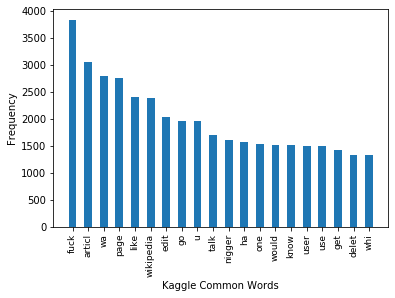

In [102]:
frequency_plot(word_freq_Kaggle.most_common(20),"Kaggle Common Words",20)

In [103]:
sentence = "Tal Is, Gay..."

In [104]:
len(sentence.lower().split())

3

In [105]:
max(RM_DATA_analyze['lengthes'])
#min(RM_DATA_analyze['lengthes'])

909

In [106]:
max(RM_DATA_Filtered_analyze['lengthes'])
#min(RM_DATA_Filtered_analyze['lengthes'])

688

In [107]:
RM_DATA_analyze.lengthes.quantile([0.25,0.5,0.75,0.95,1])

0.25      8.0
0.50     13.0
0.75     24.0
0.95     78.0
1.00    909.0
Name: lengthes, dtype: float64

In [108]:
RM_DATA_analyze[RM_DATA_analyze['Label'] == 0]['lengthes'].quantile([0.25,0.5,0.75,0.95,1])

0.25     10.00
0.50     20.00
0.75     42.00
0.95    114.05
1.00    909.00
Name: lengthes, dtype: float64

In [109]:
RM_DATA_analyze[RM_DATA_analyze['Label'] == 1]['lengthes'].quantile([0.25,0.5,0.75,0.95,1])

0.25      7.0
0.50     10.0
0.75     15.0
0.95     25.0
1.00    137.0
Name: lengthes, dtype: float64

In [110]:
RM_DATA_Filtered_analyze[RM_DATA_Filtered_analyze['Label'] == 0]['lengthes'].quantile([0.25,0.5,0.75,0.95,1])

0.25     10.00
0.50     23.00
0.75     48.00
0.95    141.05
1.00    688.00
Name: lengthes, dtype: float64

In [111]:
RM_DATA_Filtered_analyze[RM_DATA_Filtered_analyze['Label'] == 1]['lengthes'].quantile([0.25,0.5,0.75,0.95,1])

0.25      8.75
0.50     12.00
0.75     16.00
0.95     29.00
1.00    132.00
Name: lengthes, dtype: float64

In [112]:
RM_DATA_Filtered_analyze['lengthes'].quantile([0.25,0.5,0.75,0.95,1])

0.25      9.0
0.50     14.0
0.75     27.0
0.95     96.0
1.00    688.0
Name: lengthes, dtype: float64

In [113]:
Kaggle_DATA_analyze.lengthes.quantile([0.25,0.5,0.75,0.95,1])

0.25      14.0
0.50      30.0
0.75      64.0
0.95     207.0
1.00    1403.0
Name: lengthes, dtype: float64

In [114]:
Founta_Dataset_analyze.lengthes.quantile([0.25,0.5,0.75,0.95,1])

0.25    12.0
0.50    16.0
0.75    21.0
0.95    25.0
1.00    46.0
Name: lengthes, dtype: float64

In [115]:
Razavi_Dataset_analyze.lengthes.quantile([0.25,0.5,0.75,0.95,1])

0.25     14.0
0.50     64.0
0.75    142.0
0.95    327.7
1.00    448.0
Name: lengthes, dtype: float64

In [116]:
Waseem_Dataset_analyze.lengthes.quantile([0.25,0.5,0.75,0.95,1])

0.25    10.0
0.50    16.0
0.75    21.0
0.95    25.0
1.00    32.0
Name: lengthes, dtype: float64

In [117]:
Kumar_Dataset_analyze.lengthes.quantile([0.25,0.5,0.75,0.95,1])

0.25      11.00
0.50      15.00
0.75      26.00
0.95      66.05
1.00    1125.00
Name: lengthes, dtype: float64

In [118]:
Offensive_Reddit_Dataset_analyze.lengthes.quantile([0.25,0.5,0.75,0.95,1])

0.25       7.00
0.50      14.00
0.75      32.00
0.95     102.05
1.00    1143.00
Name: lengthes, dtype: float64

In [119]:
Razavi_Dataset_analyze

comment  \
0    '1999 is certainly going to be know as one or the other. There was another quake, in Mexico, a b...   
1    'I see Pocono has put up some info on the new TeleVue 31.5 mm ep. Hefty price tag though. I thin...   
2                                                      'i want you tell me some nice short student joke'   
3    'Dont you get it boy? Isnt the sig file below enough to burst your bubble? You want to discuss y...   
4                                                                  'tell me your name you mental retard'   
..                                                                                                   ...   
959                          'would it be possible for you to tell me the name of this thing over there'   
960  'One of the true great industralists of the 20th century (who else is left?). RIP. I agree with ...   
961  'TTT Forma Bar 42cm $15.000 TTT Forma SL Bar 42cm $20.00 TTT Prima 220 42cm $50.00 Specialized T...   
962  'i have a practical question, how does one take Viagra in a relationship where spontaneous sex i...   
963                                                       'tell me what is our decision to this problem'   

                                                                                      lemmatized_comment  \
0    '1999 is certainly going to be know a one or the other . There wa another quake , in Mexico , a ...   
1    ' I see Pocono ha put up some info on the new TeleVue 31.5 mm ep . Hefty price tag though . I th...   
2                                                    ' i want you tell me some nice short student joke '   
3    'Dont you get it boy ? Isnt the sig file below enough to burst your bubble ? You want to discus ...   
4                                                                 'tell me your name you mental retard '   
..                                                                                                   ...   
959                         'would it be possible for you to tell me the name of this thing over there '   
960  'One of the true great industralists of the 20th century ( who else is left ? ) . RIP . I agree ...   
961  'TTT Forma Bar 42cm $ 15.000 TTT Forma SL Bar 42cm $ 20.00 TTT Prima 220 42cm $ 50.00 Specialize...   
962  ' i have a practical question , how doe one take Viagra in a relationship where spontaneous sex ...   
963                                                      'tell me what is our decision to this problem '   

     sentiment  Label  lengthes  
0     0.041327      1        60  
1     0.568182      0        35  
2     0.300000      0        10  
3    -0.019537      1       378  
4    -0.500000      1         7  
..         ...    ...       ...  
959   0.000000      0        16  
960   0.370000      0       102  
961   0.208670      0        63  
962   0.167708      1       128  
963   0.000000      0         9  

[964 rows x 5 columns]

In [120]:
def plot_histogram(dataset,column, xlabel, ylabel, bins, range):
    dataset[column].hist(bins = bins, range = range)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    

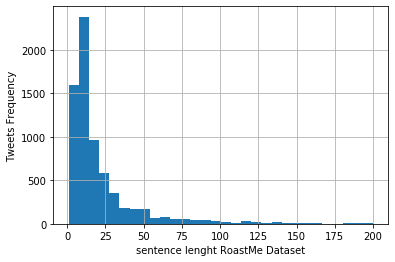

In [121]:
plot_histogram(RM_DATA_analyze,'lengthes','sentence lenght RoastMe Dataset','Tweets Frequency',30,[1,200])

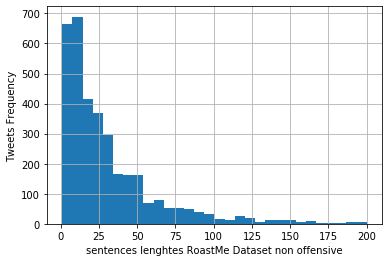

In [122]:
plot_histogram(RM_DATA_analyze[RM_DATA_analyze['Label'] == 0],'lengthes','sentences lenghtes RoastMe Dataset non offensive','Tweets Frequency',30,[1,200])

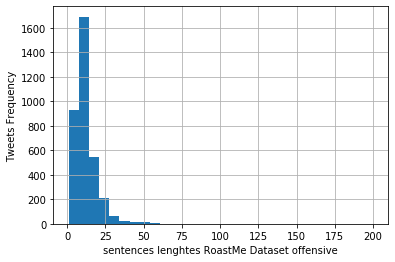

In [123]:
plot_histogram(RM_DATA_analyze[RM_DATA_analyze['Label'] == 1],'lengthes','sentences lenghtes RoastMe Dataset offensive','Tweets Frequency',30,[1,200])

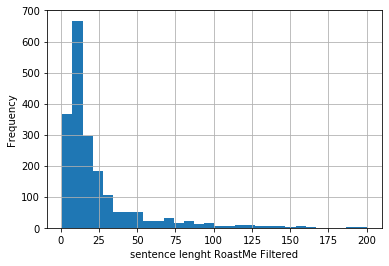

In [175]:
plot_histogram(RM_DATA_Filtered_analyze,'lengthes','sentence lenght RoastMe Filtered','Frequency',30,[1,200])

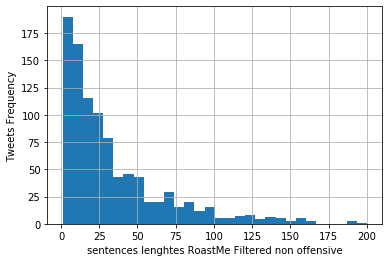

In [125]:
plot_histogram(RM_DATA_Filtered_analyze[RM_DATA_Filtered_analyze['Label'] == 0],'lengthes','sentences lenghtes RoastMe Filtered non offensive','Tweets Frequency',30,[1,200])

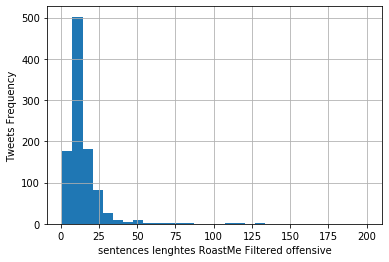

In [126]:
plot_histogram(RM_DATA_Filtered_analyze[RM_DATA_Filtered_analyze['Label'] == 1],'lengthes','sentences lenghtes RoastMe Filtered offensive','Tweets Frequency',30,[1,200])

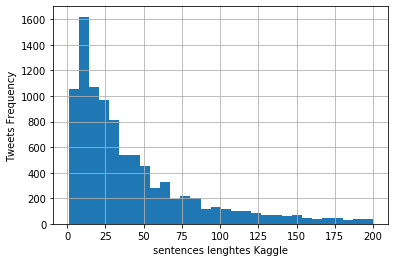

In [127]:
plot_histogram(Kaggle_DATA_analyze,'lengthes','sentences lenghtes Kaggle','Tweets Frequency',30,[1,200])

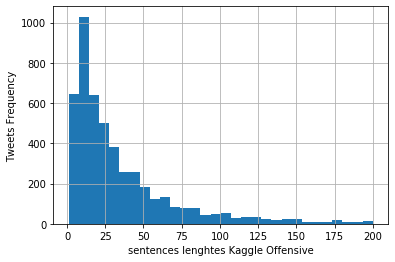

In [128]:
plot_histogram(Kaggle_DATA_analyze[Kaggle_DATA_analyze['Label'] == 1],'lengthes','sentences lenghtes Kaggle Offensive','Tweets Frequency',30,[1,200])

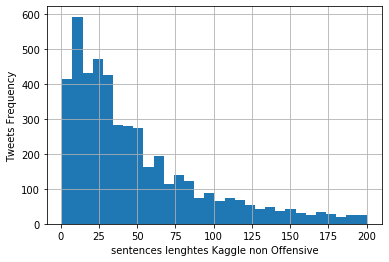

In [129]:
plot_histogram(Kaggle_DATA_analyze[Kaggle_DATA_analyze['Label'] == 0],'lengthes','sentences lenghtes Kaggle non Offensive','Tweets Frequency',30,[1,200])

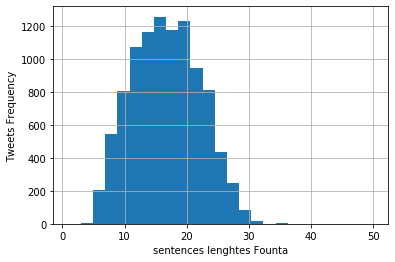

In [130]:
plot_histogram(Founta_Dataset_analyze,'lengthes','sentences lenghtes Founta','Tweets Frequency',25,[1,50])

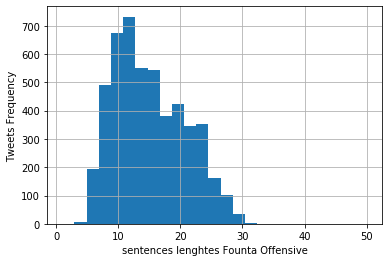

In [131]:
plot_histogram(Founta_Dataset_analyze[Founta_Dataset_analyze['Label'] == 1],'lengthes','sentences lenghtes Founta Offensive','Tweets Frequency',25,[1,50])

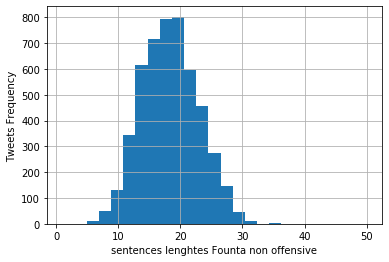

In [132]:
plot_histogram(Founta_Dataset_analyze[Founta_Dataset_analyze['Label'] == 0],'lengthes','sentences lenghtes Founta non offensive','Tweets Frequency',25,[1,50])

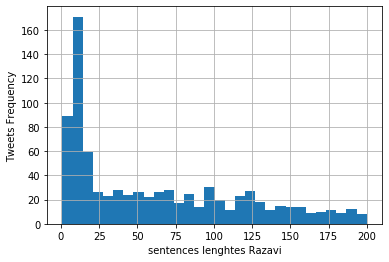

In [133]:
plot_histogram(Razavi_Dataset_analyze,'lengthes','sentences lenghtes Razavi','Tweets Frequency',30,[1,200])

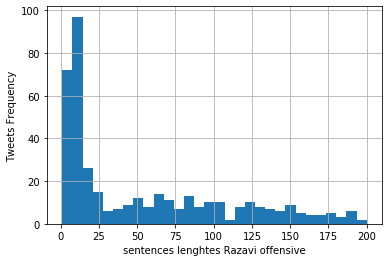

In [134]:
plot_histogram(Razavi_Dataset_analyze[Razavi_Dataset_analyze['Label'] == 1],'lengthes','sentences lenghtes Razavi offensive','Tweets Frequency',30,[1,200])

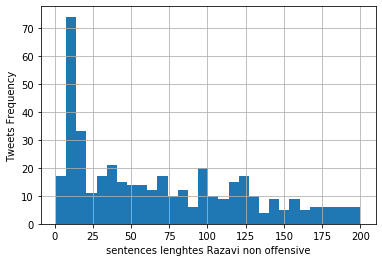

In [135]:
plot_histogram(Razavi_Dataset_analyze[Razavi_Dataset_analyze['Label'] == 0],'lengthes','sentences lenghtes Razavi non offensive','Tweets Frequency',30,[1,200])

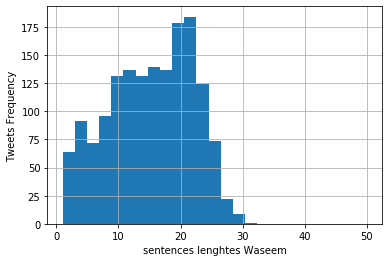

In [136]:
plot_histogram(Waseem_Dataset_analyze,'lengthes','sentences lenghtes Waseem','Tweets Frequency',25,[1,50])

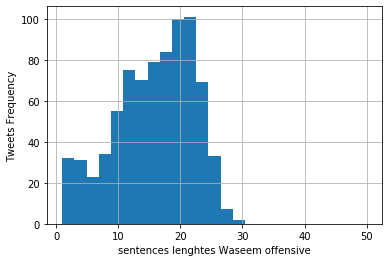

In [137]:
plot_histogram(Waseem_Dataset_analyze[Waseem_Dataset_analyze['Label'] == 1],'lengthes','sentences lenghtes Waseem offensive','Tweets Frequency',25,[1,50])

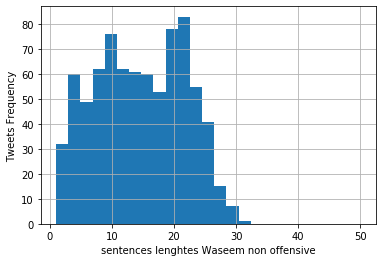

In [138]:
plot_histogram(Waseem_Dataset_analyze[Waseem_Dataset_analyze['Label'] == 0],'lengthes','sentences lenghtes Waseem non offensive','Tweets Frequency',25,[1,50])

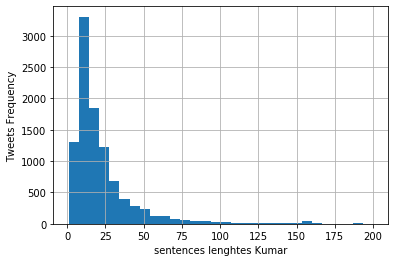

In [139]:
plot_histogram(Kumar_Dataset_analyze,'lengthes','sentences lenghtes Kumar','Tweets Frequency',30,[1,200])

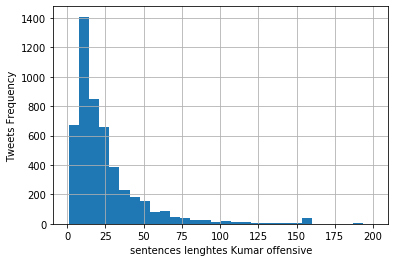

In [140]:
plot_histogram(Kumar_Dataset_analyze[Kumar_Dataset_analyze['Label'] == 1],'lengthes','sentences lenghtes Kumar offensive','Tweets Frequency',30,[1,200])

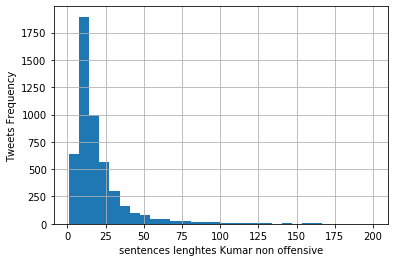

In [141]:
plot_histogram(Kumar_Dataset_analyze[Kumar_Dataset_analyze['Label'] == 0],'lengthes','sentences lenghtes Kumar non offensive','Tweets Frequency',30,[1,200])

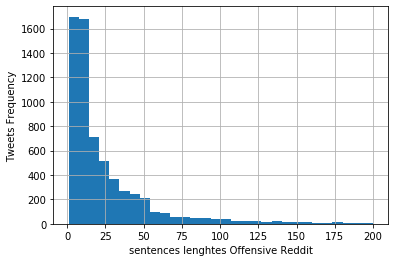

In [142]:
plot_histogram(Offensive_Reddit_Dataset_analyze,'lengthes','sentences lenghtes Offensive Reddit','Tweets Frequency',30,[1,200])

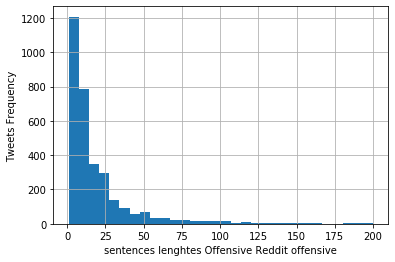

In [143]:
plot_histogram(Offensive_Reddit_Dataset_analyze[Offensive_Reddit_Dataset_analyze['Label'] == 1],'lengthes','sentences lenghtes Offensive Reddit offensive','Tweets Frequency',30,[1,200])

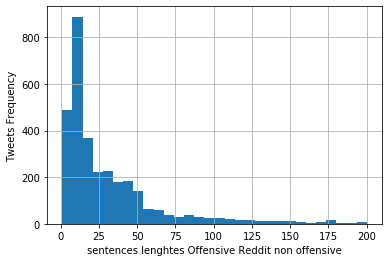

In [144]:
plot_histogram(Offensive_Reddit_Dataset_analyze[Offensive_Reddit_Dataset_analyze['Label'] == 0],'lengthes','sentences lenghtes Offensive Reddit non offensive','Tweets Frequency',30,[1,200])

In [145]:
np.std(RM_DATA_Filtered_analyze['lengthes'])

49.560277279289565

In [146]:
np.std(Kaggle_DATA_analyze['lengthes'])

108.22956350110626

In [147]:
np.std(Founta_Dataset_analyze['lengthes'])

5.519010381399992

In [148]:
np.std(Razavi_Dataset_analyze['lengthes'])

102.30079507401665

In [149]:
np.std(Waseem_Dataset_analyze['lengthes'])

6.908338971406592

In [150]:
np.std(Kumar_Dataset_analyze['lengthes'])

37.85448860769333

In [151]:
np.std(Offensive_Reddit_Dataset_analyze['lengthes'])

45.740988655793934

In [152]:
def word_cloud(dataset):
    allwords = []
    tokenizer = RegexpTokenizer(r'\w+')
    for comment in dataset['comment']:
        word_list = tokenizer.tokenize(comment)
        word_list = [lemmatizer.lemmatize(w) for w in word_list if w not in stop_words]
        allwords += word_list
    mostcommon = FreqDist(allwords).most_common(100)
    wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
    fig = plt.figure(figsize=(30,10), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    #plt.title('Top 100 Most Common Words', fontsize=100)
    plt.tight_layout(pad=0)
    plt.show()
    return mostcommon
    

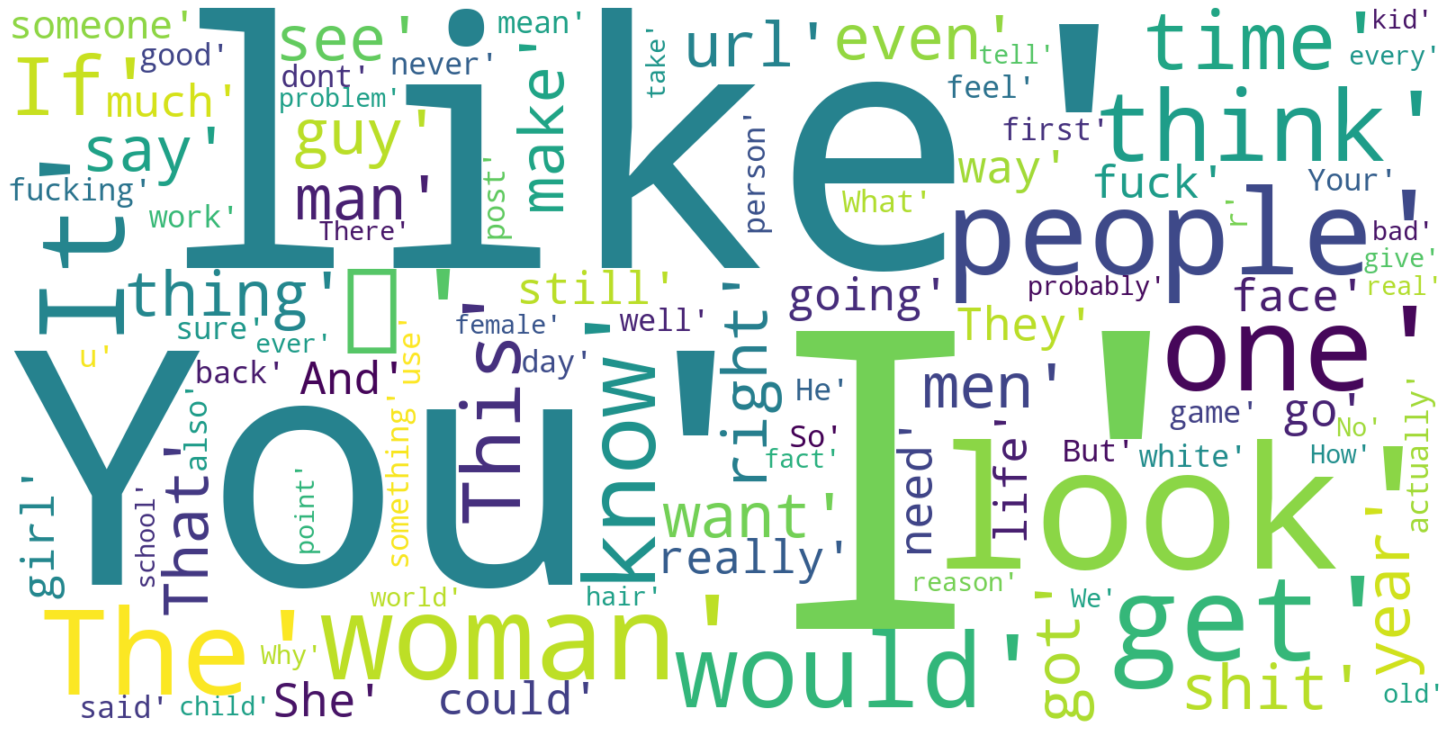

In [153]:
mostcommon_RM = word_cloud(RM_DATA_analyze)

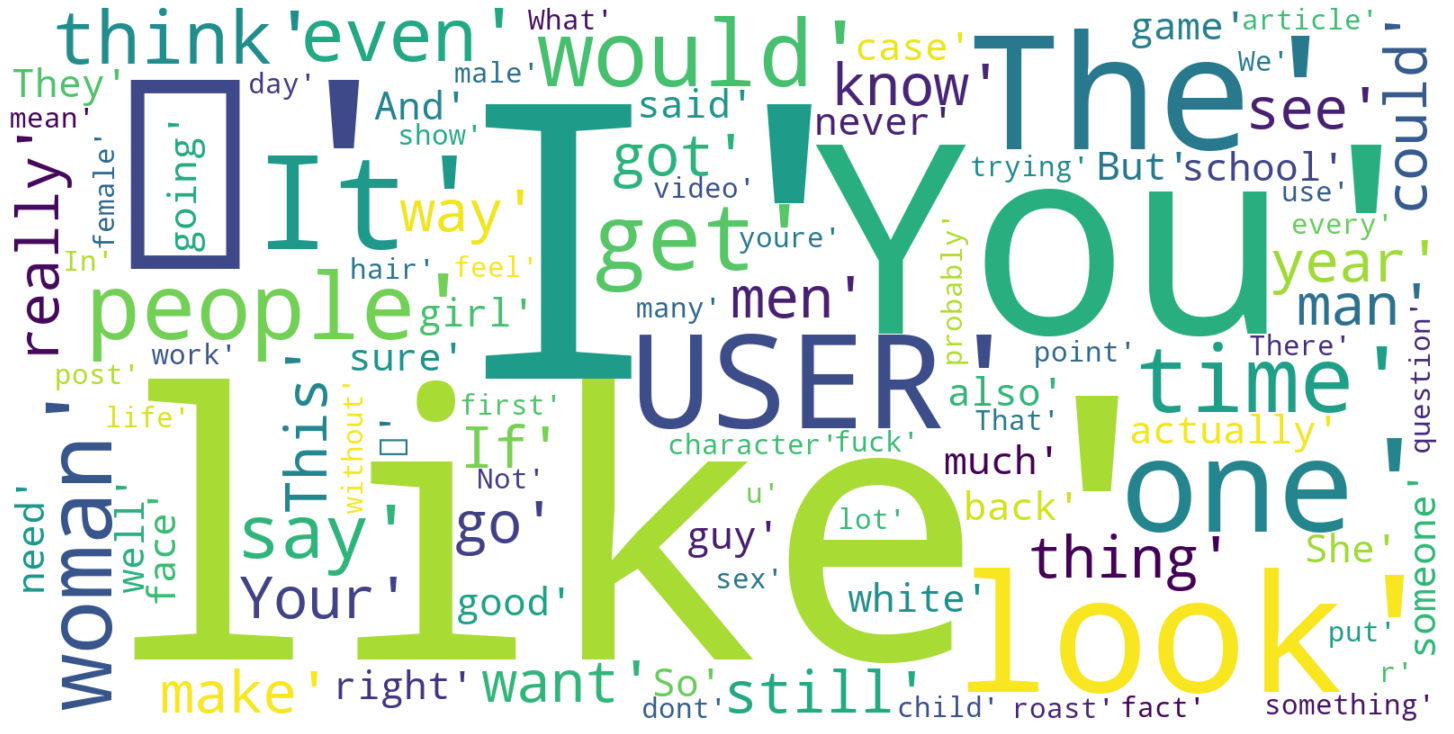

In [154]:
mostcommon_RM_Filtered = word_cloud(RM_DATA_Filtered_analyze)

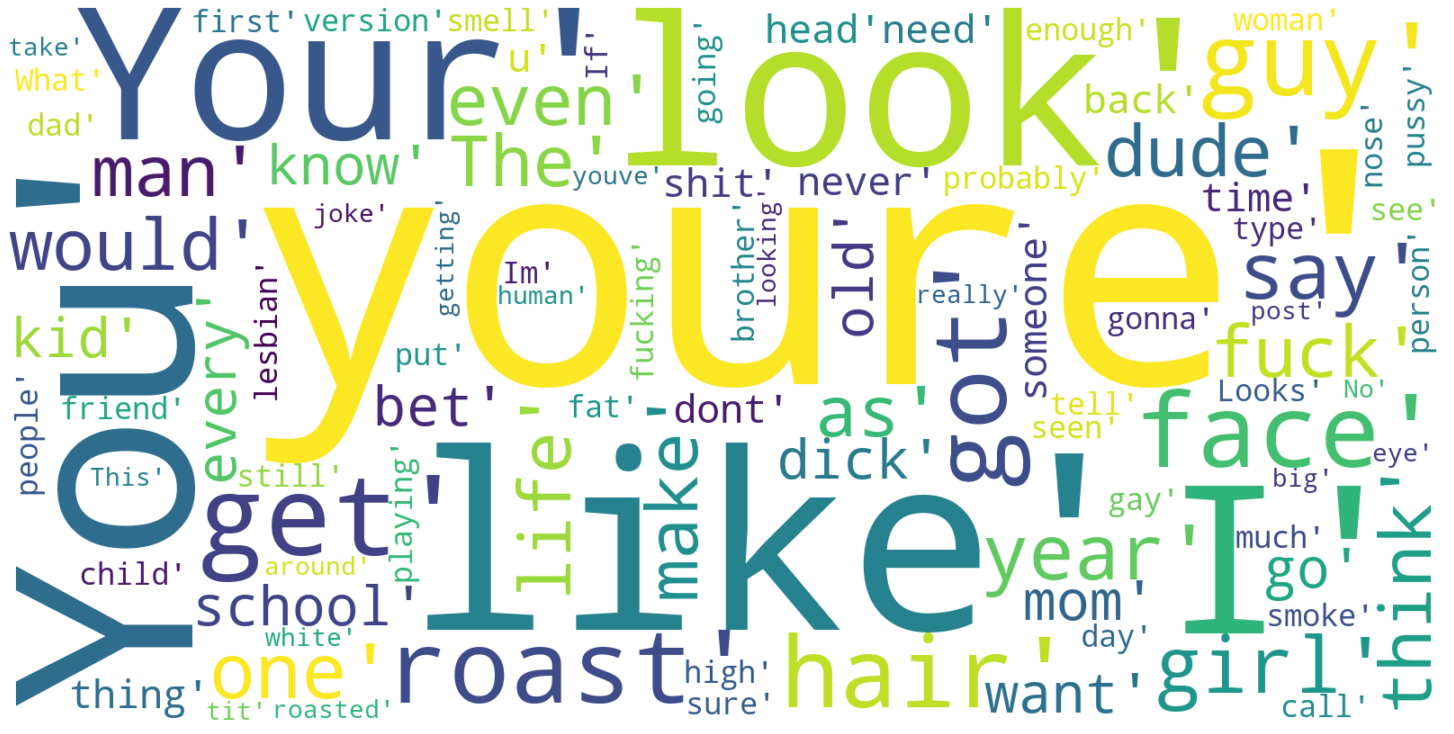

In [155]:
mostcommon_RM_Filtered_OFF = word_cloud(RM_DATA_Filtered_analyze[RM_DATA_Filtered_analyze['Label'] == 1])

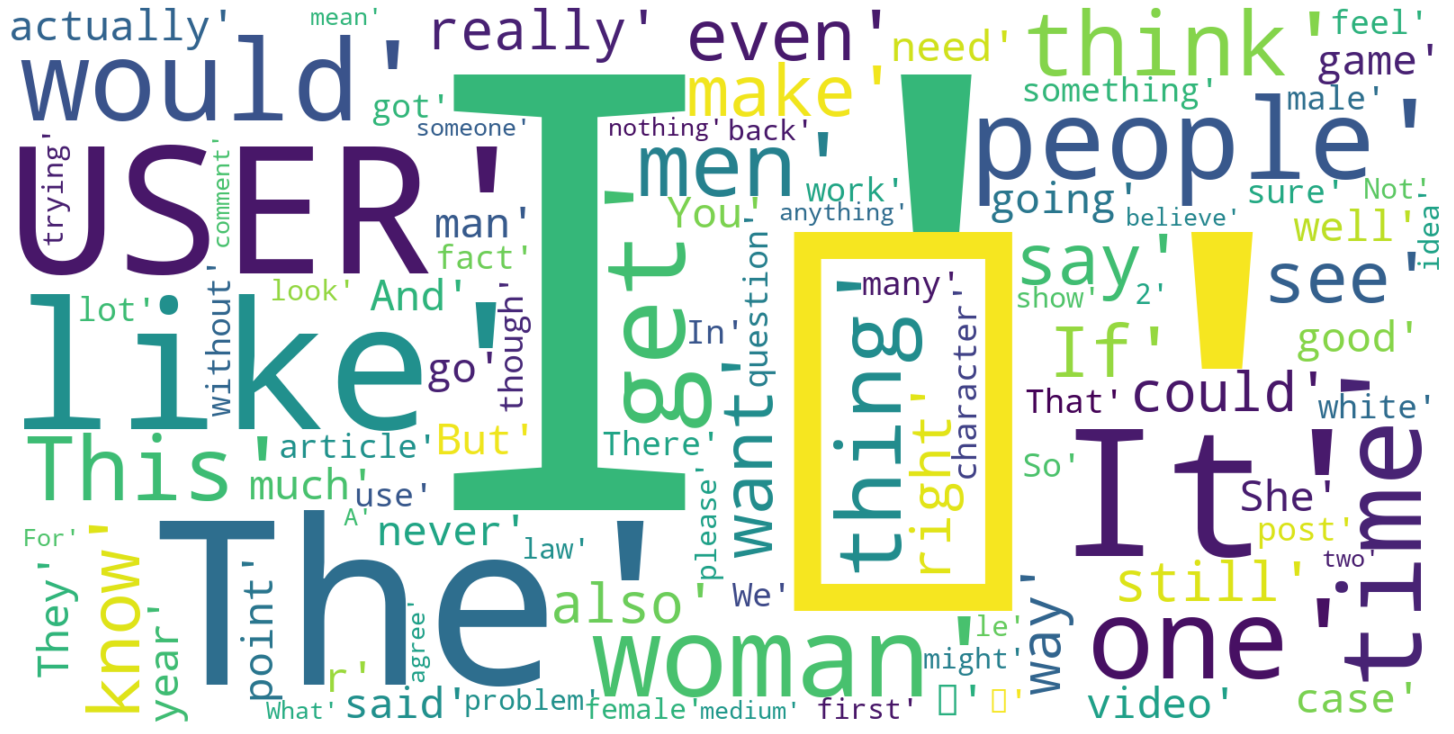

In [156]:
mostcommon_RM_Filtered_NON_OFF = word_cloud(RM_DATA_Filtered_analyze[RM_DATA_Filtered_analyze['Label'] == 0])

In [157]:
mostcommon_RM_Filtered_OFF

[('like', 518),
 ('You', 487),
 ('look', 462),
 ('I', 121),
 ('Your', 71),
 ('get', 44),
 ('youre', 40),
 ('roast', 40),
 ('face', 38),
 ('guy', 38),
 ('got', 38),
 ('hair', 37),
 ('girl', 36),
 ('say', 36),
 ('year', 34),
 ('one', 32),
 ('Youre', 31),
 ('would', 30),
 ('even', 30),
 ('think', 29),
 ('dude', 28),
 ('as', 28),
 ('fuck', 28),
 ('life', 28),
 ('The', 27),
 ('man', 27),
 ('make', 27),
 ('school', 25),
 ('know', 24),
 ('want', 23),
 ('dick', 23),
 ('every', 23),
 ('go', 22),
 ('mom', 22),
 ('bet', 22),
 ('kid', 22),
 ('old', 21),
 ('thing', 21),
 ('shit', 21),
 ('head', 20),
 ('need', 20),
 ('time', 20),
 ('dont', 20),
 ('someone', 19),
 ('u', 19),
 ('back', 18),
 ('never', 18),
 ('probably', 18),
 ('gay', 17),
 ('child', 17),
 ('tell', 17),
 ('fat', 16),
 ('seen', 16),
 ('dad', 16),
 ('high', 16),
 ('enough', 15),
 ('fucking', 15),
 ('version', 15),
 ('people', 15),
 ('call', 15),
 ('day', 14),
 ('friend', 14),
 ('woman', 14),
 ('see', 14),
 ('Looks', 14),
 ('gonna', 14),


In [158]:
mostcommon_RM_Filtered_NON_OFF

[('I', 755),
 ('ד', 513),
 ('The', 189),
 ('USER', 184),
 ('like', 169),
 ('It', 157),
 ('people', 147),
 ('one', 143),
 ('woman', 113),
 ('would', 112),
 ('get', 109),
 ('time', 105),
 ('think', 93),
 ('men', 78),
 ('thing', 75),
 ('This', 73),
 ('even', 70),
 ('see', 69),
 ('make', 68),
 ('want', 66),
 ('If', 66),
 ('know', 66),
 ('say', 65),
 ('really', 64),
 ('way', 64),
 ('still', 61),
 ('right', 61),
 ('could', 61),
 ('also', 60),
 ('actually', 60),
 ('game', 58),
 ('well', 57),
 ('They', 57),
 ('ו', 57),
 ('good', 56),
 ('You', 53),
 ('But', 52),
 ('much', 51),
 ('go', 50),
 ('She', 49),
 ('And', 49),
 ('case', 49),
 ('going', 47),
 ('r', 46),
 ('point', 46),
 ('never', 45),
 ('need', 45),
 ('year', 45),
 ('video', 45),
 ('man', 44),
 ('said', 43),
 ('something', 42),
 ('work', 42),
 ('That', 42),
 ('There', 41),
 ('So', 41),
 ('many', 41),
 ('fact', 40),
 ('question', 40),
 ('sure', 40),
 ('got', 40),
 ('white', 39),
 ('article', 39),
 ('In', 39),
 ('lot', 38),
 ('post', 38),
 

In [159]:
mostcommon_RM_Filtered

[('I', 876),
 ('like', 687),
 ('You', 540),
 ('ד', 513),
 ('look', 496),
 ('The', 216),
 ('USER', 184),
 ('one', 175),
 ('It', 165),
 ('people', 162),
 ('get', 153),
 ('would', 142),
 ('woman', 127),
 ('time', 125),
 ('think', 122),
 ('say', 101),
 ('even', 100),
 ('thing', 96),
 ('make', 95),
 ('know', 90),
 ('want', 89),
 ('men', 85),
 ('This', 84),
 ('see', 83),
 ('year', 79),
 ('If', 78),
 ('got', 78),
 ('really', 75),
 ('still', 74),
 ('way', 73),
 ('Your', 73),
 ('go', 72),
 ('man', 71),
 ('could', 70),
 ('actually', 69),
 ('game', 68),
 ('guy', 66),
 ('need', 65),
 ('also', 64),
 ('much', 64),
 ('right', 64),
 ('good', 64),
 ('never', 63),
 ('well', 61),
 ('They', 60),
 ('going', 60),
 ('girl', 59),
 ('And', 59),
 ('ו', 57),
 ('face', 54),
 ('But', 53),
 ('sure', 52),
 ('school', 52),
 ('back', 51),
 ('She', 50),
 ('white', 50),
 ('case', 50),
 ('So', 49),
 ('said', 49),
 ('someone', 49),
 ('something', 48),
 ('That', 48),
 ('post', 48),
 ('feel', 47),
 ('life', 47),
 ('work', 4

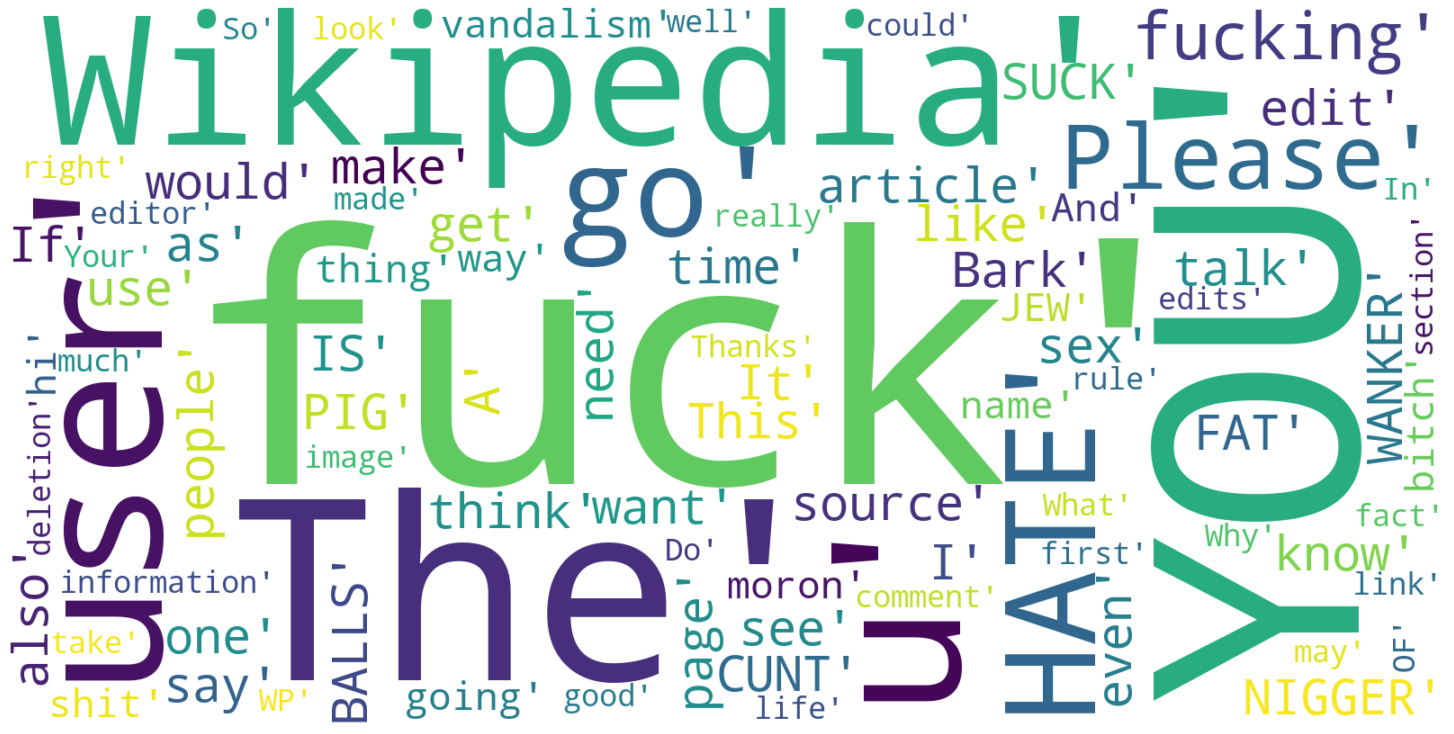

In [160]:
mostcommon_Kaggle = word_cloud(Kaggle_DATA_analyze)

In [161]:
mostcommon_Kaggle

[('I', 13927),
 ('YOU', 3308),
 ('article', 2960),
 ('page', 2670),
 ('You', 2550),
 ('like', 2217),
 ('The', 2000),
 ('Wikipedia', 1713),
 ('fuck', 1703),
 ('know', 1448),
 ('one', 1425),
 ('would', 1374),
 ('NIGGER', 1372),
 ('as', 1295),
 ('A', 1280),
 ('talk', 1270),
 ('PIG', 1252),
 ('If', 1159),
 ('It', 1143),
 ('u', 1056),
 ('people', 1049),
 ('think', 1047),
 ('get', 1013),
 ('U', 1000),
 ('Bark', 1000),
 ('time', 978),
 ('see', 950),
 ('SUCK', 918),
 ('make', 900),
 ('edit', 897),
 ('source', 887),
 ('FUCK', 884),
 ('BALLS', 837),
 ('user', 832),
 ('This', 815),
 ('CUNT', 782),
 ('sex', 766),
 ('say', 764),
 ('need', 747),
 ('want', 733),
 ('IS', 733),
 ('WANKER', 716),
 ('go', 693),
 ('use', 688),
 ('FAT', 688),
 ('User', 680),
 ('even', 666),
 ('also', 664),
 ('thing', 660),
 ('going', 654),
 ('name', 648),
 ('shit', 647),
 ('moron', 647),
 ('way', 634),
 ('HATE', 632),
 ('And', 631),
 ('THE', 631),
 ('bitch', 629),
 ('Please', 626),
 ('JEW', 617),
 ('wikipedia', 611),
 ('hi

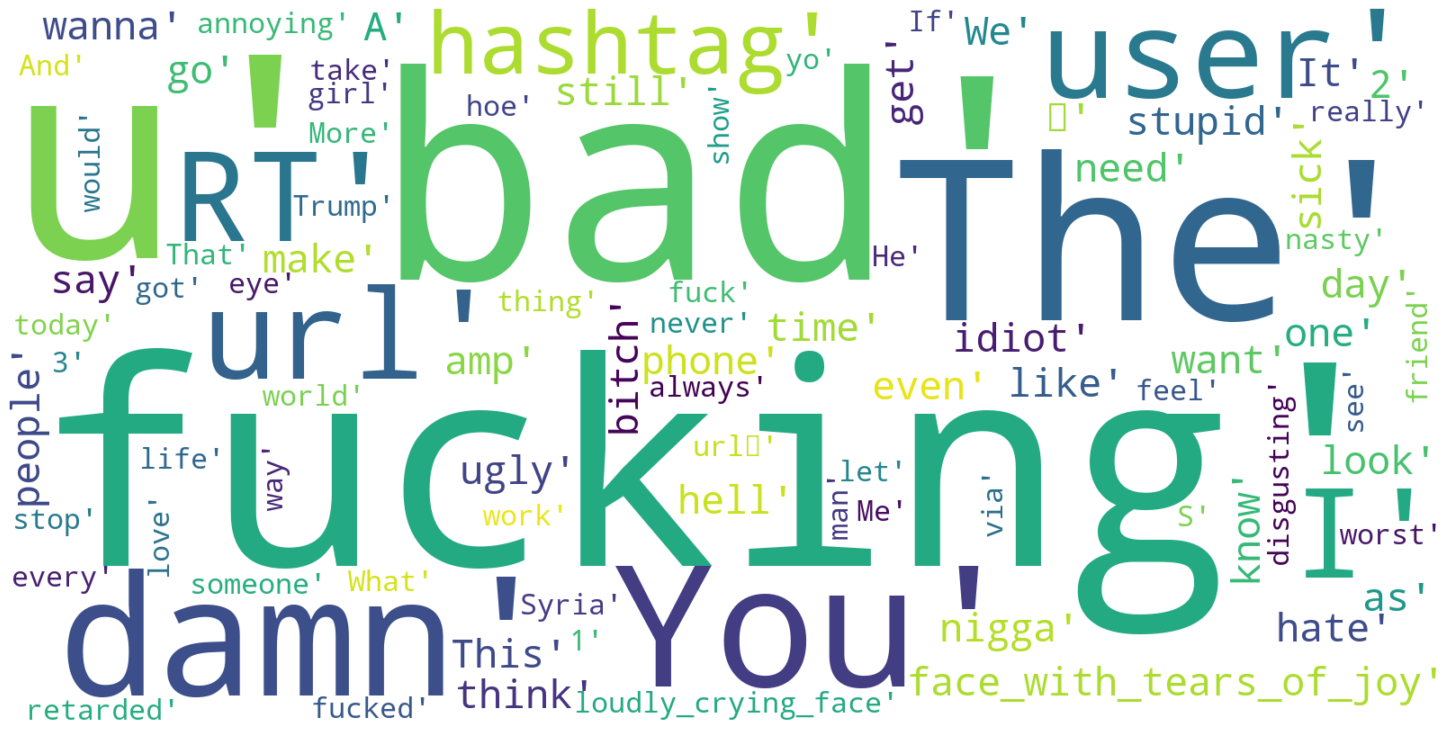

In [162]:
mostcommon_Founta = word_cloud(Founta_Dataset_analyze)

In [163]:
mostcommon_Founta

[('user', 7801),
 ('url', 5678),
 ('I', 3295),
 ('RT', 3275),
 ('hashtag', 2318),
 ('fucking', 1053),
 ('face_with_tears_of_joy', 897),
 ('idiot', 729),
 ('like', 708),
 ('as', 705),
 ('hate', 642),
 ('bitch', 608),
 ('ג', 605),
 ('bad', 585),
 ('u', 540),
 ('amp', 511),
 ('The', 449),
 ('know', 434),
 ('get', 377),
 ('people', 375),
 ('day', 368),
 ('stupid', 358),
 ('You', 339),
 ('nigga', 309),
 ('ugly', 306),
 ('one', 306),
 ('say', 301),
 ('A', 286),
 ('This', 277),
 ('It', 272),
 ('sick', 268),
 ('FUCKING', 266),
 ('damn', 257),
 ('2', 257),
 ('look', 230),
 ('make', 228),
 ('time', 227),
 ('We', 226),
 ('want', 218),
 ('hell', 215),
 ('need', 214),
 ('go', 212),
 ('wanna', 203),
 ('still', 202),
 ('phone', 199),
 ('think', 198),
 ('even', 196),
 ('loudly_crying_face', 189),
 ('THE', 189),
 ('see', 183),
 ('fucked', 183),
 ('would', 182),
 ('take', 179),
 ('got', 176),
 ('And', 173),
 ('Trump', 172),
 ('If', 170),
 ('1', 168),
 ('thing', 151),
 ('someone', 150),
 ('yo', 149),
 ('

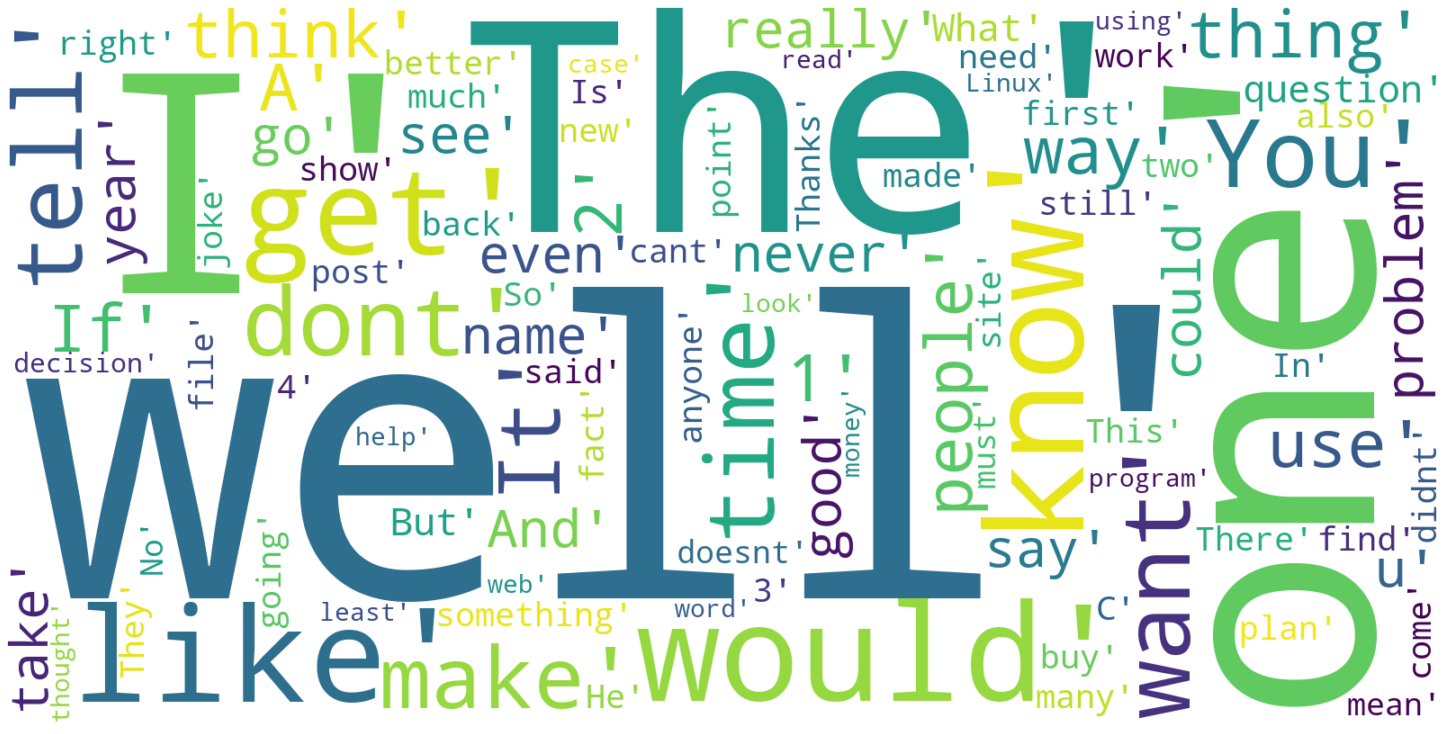

In [164]:
mostcommon_Razavi = word_cloud(Razavi_Dataset_analyze)

In [165]:
mostcommon_Razavi

[('I', 2068),
 ('The', 355),
 ('one', 333),
 ('would', 329),
 ('know', 286),
 ('like', 255),
 ('get', 240),
 ('dont', 236),
 ('time', 230),
 ('tell', 175),
 ('want', 174),
 ('You', 171),
 ('make', 170),
 ('It', 166),
 ('thing', 163),
 ('If', 163),
 ('think', 161),
 ('people', 161),
 ('way', 139),
 ('1', 136),
 ('2', 136),
 ('A', 135),
 ('use', 133),
 ('really', 130),
 ('problem', 128),
 ('year', 126),
 ('And', 124),
 ('see', 123),
 ('good', 123),
 ('u', 116),
 ('even', 116),
 ('never', 115),
 ('name', 115),
 ('could', 115),
 ('say', 114),
 ('go', 98),
 ('take', 97),
 ('question', 97),
 ('What', 97),
 ('But', 95),
 ('something', 95),
 ('much', 95),
 ('post', 94),
 ('need', 93),
 ('also', 93),
 ('cant', 92),
 ('file', 89),
 ('well', 89),
 ('In', 89),
 ('new', 88),
 ('first', 88),
 ('right', 87),
 ('This', 87),
 ('many', 87),
 ('work', 85),
 ('find', 84),
 ('come', 82),
 ('said', 80),
 ('better', 79),
 ('There', 77),
 ('C', 77),
 ('anyone', 77),
 ('3', 76),
 ('plan', 76),
 ('Is', 76),
 ('

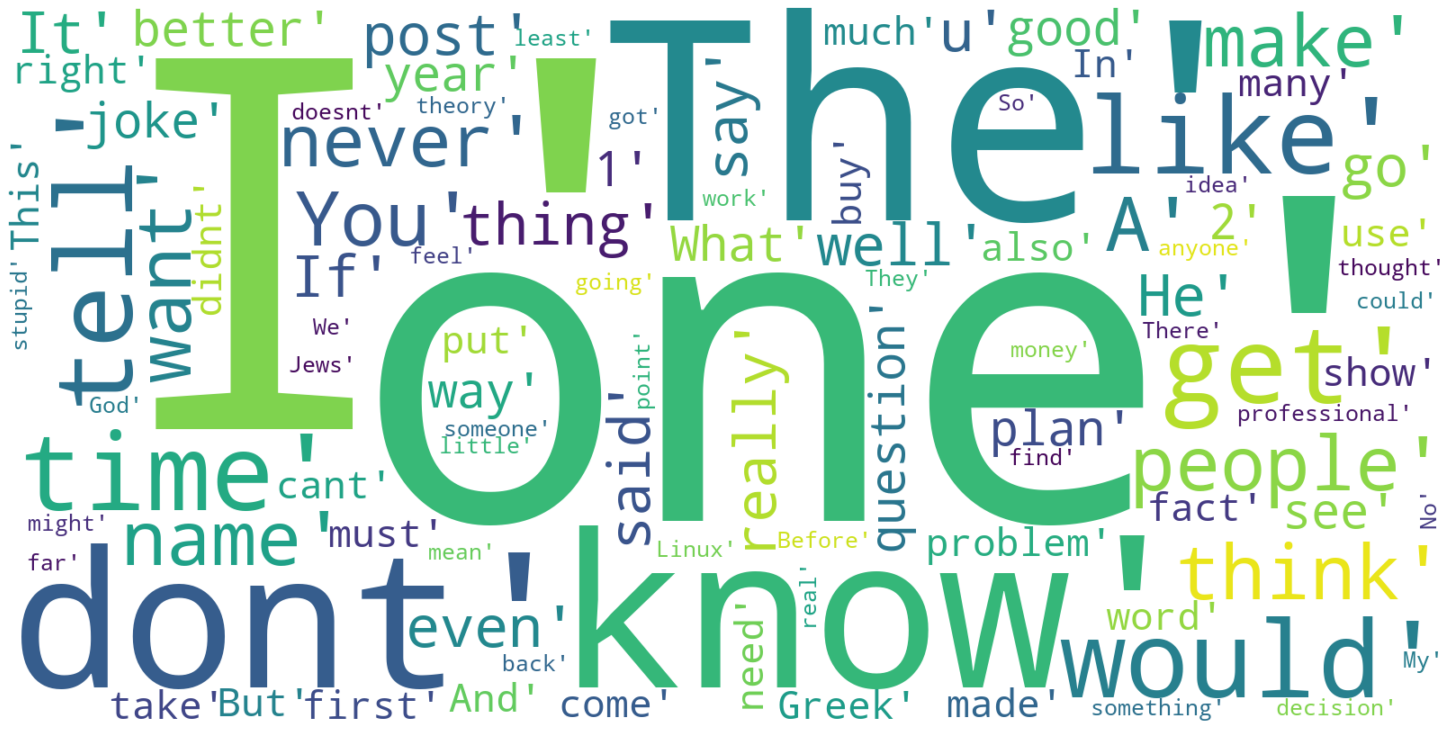

In [166]:
mostcommon_Razavi_OFF = word_cloud(Razavi_Dataset_analyze[Razavi_Dataset_analyze['Label']==1])

In [167]:
mostcommon_Razavi_OFF

[('I', 868),
 ('one', 187),
 ('The', 176),
 ('know', 136),
 ('dont', 133),
 ('would', 130),
 ('get', 124),
 ('time', 121),
 ('like', 117),
 ('tell', 110),
 ('people', 106),
 ('You', 100),
 ('think', 89),
 ('want', 85),
 ('A', 82),
 ('name', 79),
 ('never', 78),
 ('make', 78),
 ('thing', 74),
 ('really', 74),
 ('u', 72),
 ('It', 69),
 ('If', 67),
 ('say', 67),
 ('post', 66),
 ('go', 62),
 ('even', 62),
 ('well', 60),
 ('said', 58),
 ('He', 57),
 ('year', 57),
 ('question', 56),
 ('1', 55),
 ('joke', 53),
 ('way', 53),
 ('see', 52),
 ('good', 50),
 ('better', 50),
 ('2', 49),
 ('plan', 49),
 ('What', 49),
 ('problem', 49),
 ('take', 48),
 ('But', 48),
 ('And', 48),
 ('come', 47),
 ('made', 47),
 ('Greek', 45),
 ('In', 45),
 ('word', 45),
 ('right', 44),
 ('first', 43),
 ('This', 43),
 ('fact', 43),
 ('much', 42),
 ('also', 42),
 ('many', 42),
 ('cant', 40),
 ('didnt', 39),
 ('use', 39),
 ('put', 39),
 ('need', 39),
 ('buy', 38),
 ('show', 38),
 ('must', 37),
 ('something', 37),
 ('So', 3

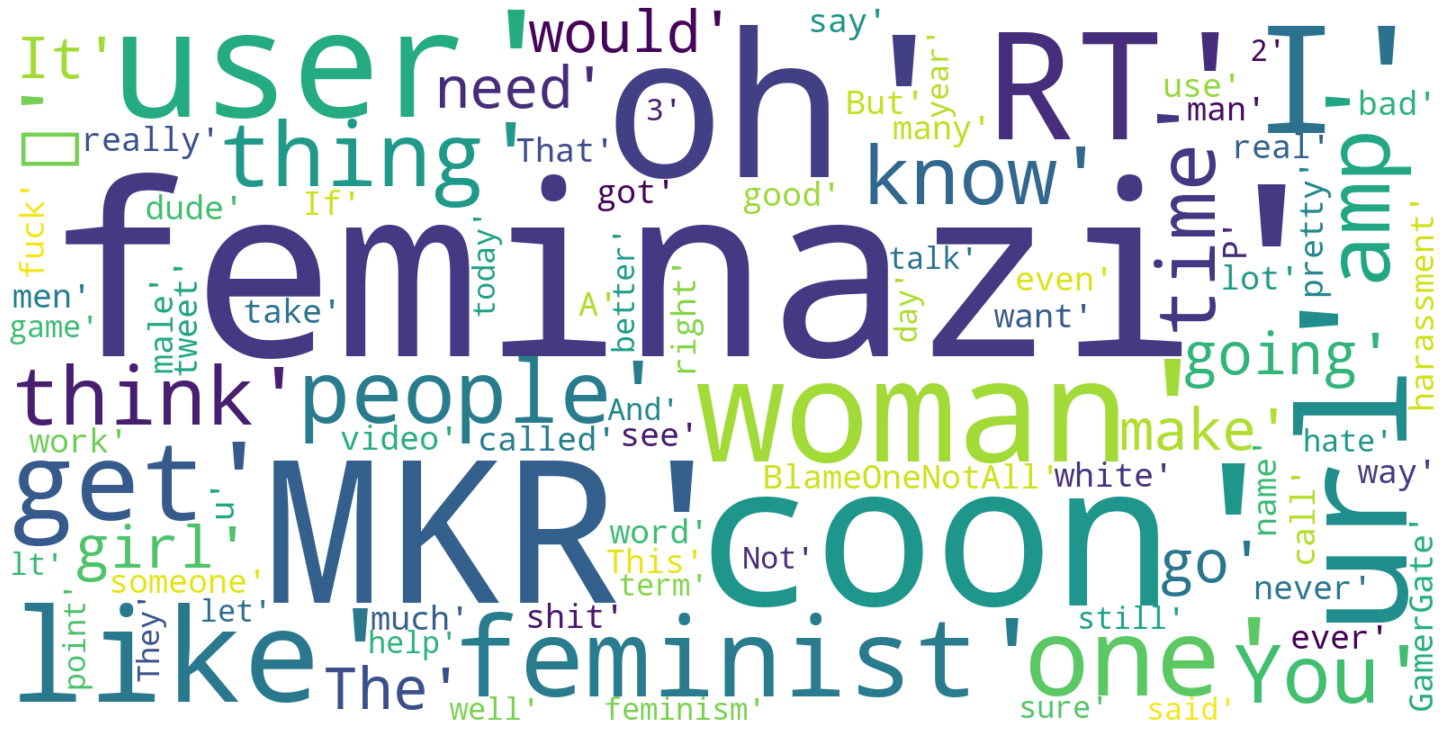

In [168]:
mostcommon_Waseem =  word_cloud(Waseem_Dataset_analyze)

In [169]:
mostcommon_Waseem

[('user', 1446),
 ('I', 516),
 ('feminazi', 294),
 ('url', 278),
 ('RT', 192),
 ('woman', 128),
 ('Feminazi', 114),
 ('MKR', 101),
 ('like', 95),
 ('get', 77),
 ('feminist', 61),
 ('one', 60),
 ('thing', 59),
 ('amp', 58),
 ('people', 57),
 ('think', 53),
 ('know', 51),
 ('You', 47),
 ('time', 46),
 ('ג', 46),
 ('going', 45),
 ('The', 45),
 ('girl', 44),
 ('go', 44),
 ('would', 43),
 ('need', 43),
 ('make', 42),
 ('It', 42),
 ('BlameOneNotAll', 42),
 ('see', 41),
 ('want', 41),
 ('mkr', 39),
 ('P', 37),
 ('men', 36),
 ('got', 35),
 ('call', 35),
 ('good', 33),
 ('But', 32),
 ('use', 32),
 ('way', 32),
 ('right', 31),
 ('say', 31),
 ('really', 30),
 ('word', 30),
 ('pretty', 29),
 ('work', 28),
 ('man', 27),
 ('If', 27),
 ('never', 27),
 ('u', 26),
 ('lot', 26),
 ('called', 25),
 ('A', 25),
 ('bad', 25),
 ('This', 24),
 ('someone', 24),
 ('dude', 24),
 ('many', 24),
 ('video', 24),
 ('shit', 24),
 ('That', 23),
 ('coon', 23),
 ('white', 23),
 ('harassment', 23),
 ('ever', 23),
 ('male',

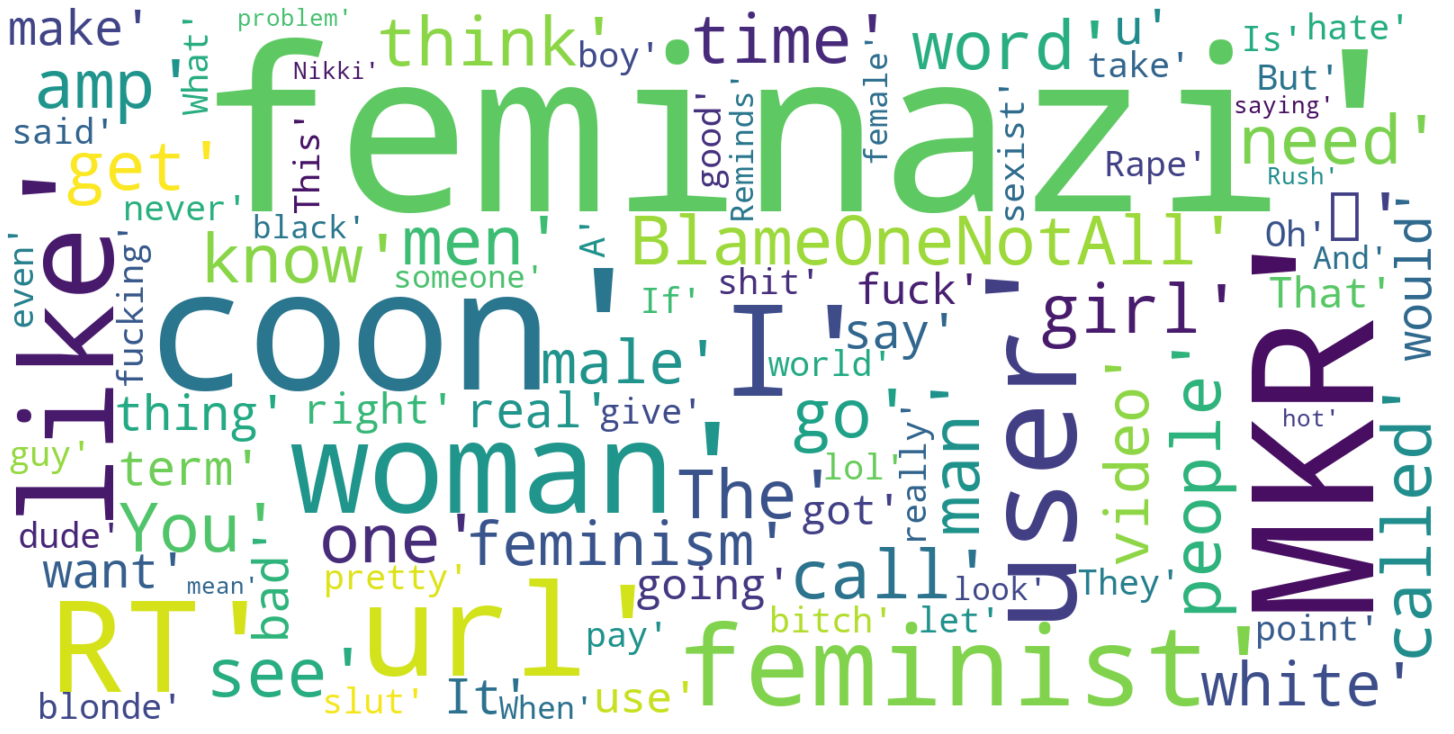

In [170]:
mostcommon_Waseem_OFF =  word_cloud(Waseem_Dataset_analyze[Waseem_Dataset_analyze['Label'] == 1])

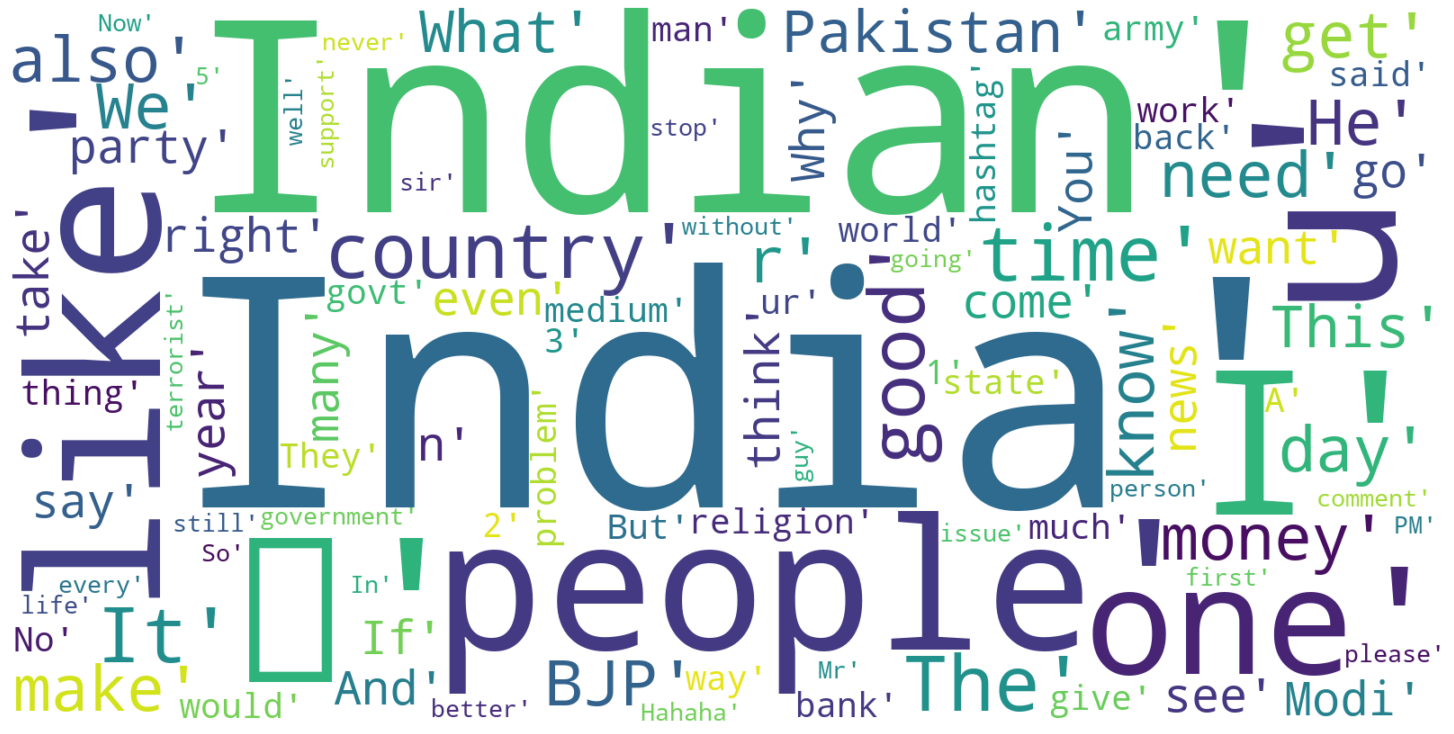

In [171]:
mostcommon_Kumar = word_cloud(Kumar_Dataset_analyze)

In [172]:
mostcommon_Kumar

[('א', 2327),
 ('I', 1454),
 ('u', 1090),
 ('India', 957),
 ('people', 953),
 ('like', 715),
 ('Indian', 600),
 ('one', 583),
 ('country', 548),
 ('The', 537),
 ('time', 536),
 ('It', 484),
 ('good', 455),
 ('money', 444),
 ('BJP', 431),
 ('know', 428),
 ('r', 410),
 ('also', 402),
 ('He', 383),
 ('day', 377),
 ('get', 373),
 ('We', 371),
 ('make', 366),
 ('need', 352),
 ('Pakistan', 351),
 ('This', 351),
 ('What', 350),
 ('party', 347),
 ('even', 340),
 ('right', 332),
 ('think', 327),
 ('many', 327),
 ('If', 324),
 ('see', 317),
 ('Modi', 313),
 ('come', 313),
 ('want', 310),
 ('n', 308),
 ('And', 308),
 ('year', 306),
 ('You', 302),
 ('go', 287),
 ('Why', 286),
 ('take', 282),
 ('say', 279),
 ('news', 278),
 ('religion', 273),
 ('2', 270),
 ('But', 268),
 ('ur', 267),
 ('would', 260),
 ('give', 258),
 ('work', 258),
 ('thing', 252),
 ('No', 250),
 ('1', 246),
 ('A', 243),
 ('india', 241),
 ('hashtag', 238),
 ('bank', 234),
 ('army', 233),
 ('way', 232),
 ('much', 228),
 ('world', 22

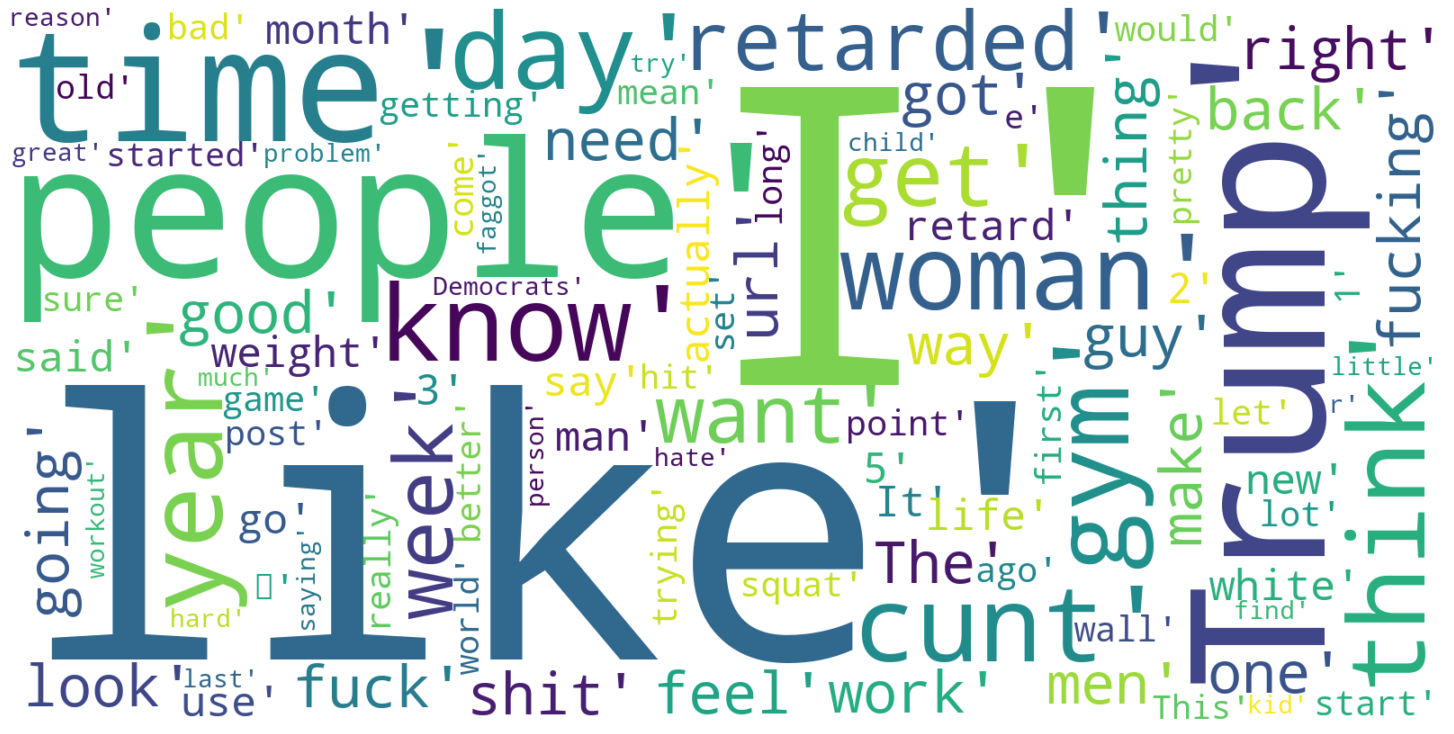

In [173]:
mostcommon_Offensive_Reddit = word_cloud(Offensive_Reddit_Dataset_analyze)

In [174]:
mostcommon_Offensive_Reddit

[('I', 3894),
 ('like', 1239),
 ('people', 939),
 ('Trump', 774),
 ('time', 663),
 ('woman', 630),
 ('cunt', 620),
 ('year', 496),
 ('day', 482),
 ('think', 479),
 ('know', 477),
 ('gym', 471),
 ('get', 419),
 ('retarded', 417),
 ('week', 415),
 ('want', 412),
 ('right', 411),
 ('fucking', 407),
 ('The', 387),
 ('thing', 385),
 ('going', 381),
 ('fuck', 372),
 ('good', 368),
 ('work', 344),
 ('shit', 339),
 ('look', 331),
 ('url', 323),
 ('way', 322),
 ('guy', 315),
 ('got', 314),
 ('men', 309),
 ('feel', 294),
 ('need', 271),
 ('back', 267),
 ('make', 264),
 ('one', 261),
 ('weight', 255),
 ('month', 255),
 ('man', 251),
 ('5', 243),
 ('3', 241),
 ('retard', 240),
 ('It', 239),
 ('actually', 239),
 ('go', 233),
 ('life', 231),
 ('2', 230),
 ('white', 228),
 ('said', 224),
 ('use', 223),
 ('new', 212),
 ('say', 210),
 ('getting', 207),
 ('ג', 200),
 ('trying', 197),
 ('game', 195),
 ('really', 194),
 ('sure', 192),
 ('1', 189),
 ('would', 187),
 ('point', 186),
 ('lot', 185),
 ('mean',